In [3481]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, multilabel_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import AdaBoostClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle
import json

In [3482]:
model_details = []
training_accuracy_list = []
testing_accuracy_list = []

# Problem Statement

# Data Gathering

In [3483]:
df= pd.read_csv("supply_chain_dataset.csv", encoding='latin-1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3484]:
df['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [3485]:
df = df.head(1000)
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,DEBIT,3,4,120.940002,251.960007,Advance shipping,0,17,Cleats,Encinitas,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,7/26/2017 2:53,Standard Class
996,DEBIT,5,4,-56.689999,251.960007,Late delivery,1,17,Cleats,Florissant,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,9/10/2015 16:38,Standard Class
997,DEBIT,6,4,4.980000,248.960007,Late delivery,1,17,Cleats,Toms River,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,9/28/2015 11:53,Standard Class
998,DEBIT,5,4,21.910000,248.960007,Late delivery,1,17,Cleats,Honolulu,...,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,8/6/2015 7:03,Standard Class


# Exploratory Data Analysis

### Dataframe Information

In [3486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           1000 non-null   object 
 1   Days for shipping (real)       1000 non-null   int64  
 2   Days for shipment (scheduled)  1000 non-null   int64  
 3   Benefit per order              1000 non-null   float64
 4   Sales per customer             1000 non-null   float64
 5   Delivery Status                1000 non-null   object 
 6   Late_delivery_risk             1000 non-null   int64  
 7   Category Id                    1000 non-null   int64  
 8   Category Name                  1000 non-null   object 
 9   Customer City                  1000 non-null   object 
 10  Customer Country               1000 non-null   object 
 11  Customer Email                 1000 non-null   object 
 12  Customer Fname                 1000 non-null   ob

### Statastical Information

In [3487]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,33.000000,1000.00000,1000.000000,0.0,1000.000000,1000.0
mean,3.894000,3.26100,26.633900,219.239321,0.50000,29.613000,8615.285000,30921.401000,4.04200,28.288636,...,2.868000,243.531514,219.239321,26.633900,65351.515152,604.22900,29.613000,NaN,131.036642,0.0
std,1.455638,1.06584,112.503674,129.534768,0.50025,21.730519,5891.213236,37324.597863,1.48743,10.050253,...,1.743449,142.716798,129.534768,112.503674,29331.232208,401.72123,21.730519,NaN,141.069424,0.0
min,0.000000,0.00000,-824.859985,23.510000,0.00000,2.000000,8.000000,612.000000,2.00000,17.982491,...,1.000000,27.990000,23.510000,-824.859985,10009.000000,24.00000,2.000000,NaN,15.990000,0.0
25%,3.000000,2.00000,11.820000,120.889999,0.00000,17.000000,3941.500000,725.000000,3.00000,18.255495,...,1.000000,129.990005,120.889999,11.820000,45231.000000,365.00000,17.000000,NaN,50.000000,0.0
50%,4.000000,4.00000,39.969999,203.970001,0.50000,18.000000,7795.000000,8839.000000,4.00000,29.001274,...,3.000000,239.960007,203.970001,39.969999,77041.000000,403.00000,18.000000,NaN,59.990002,0.0
75%,5.000000,4.00000,81.745001,287.950012,1.00000,29.000000,11632.000000,63098.500000,5.00000,38.631336,...,5.000000,327.750000,287.950012,81.745001,90049.000000,627.00000,29.000000,NaN,129.990005,0.0
max,6.000000,4.00000,595.349976,1417.500000,1.00000,76.000000,20755.000000,98031.000000,10.00000,47.393711,...,5.000000,1500.000000,1417.500000,595.349976,99301.000000,1363.00000,76.000000,NaN,1500.000000,0.0


### Missing Values Information

In [3488]:
df.isna().sum()

Type                                0
Days for shipping (real)            0
Days for shipment (scheduled)       0
Benefit per order                   0
Sales per customer                  0
Delivery Status                     0
Late_delivery_risk                  0
Category Id                         0
Category Name                       0
Customer City                       0
Customer Country                    0
Customer Email                      0
Customer Fname                      0
Customer Id                         0
Customer Lname                      0
Customer Password                   0
Customer Segment                    0
Customer State                      0
Customer Street                     0
Customer Zipcode                    0
Department Id                       0
Department Name                     0
Latitude                            0
Longitude                           0
Market                              0
Order City                          0
Order Countr

### Outliers Information

In [3489]:
# df.boxplot()

### Columns Information

In [3490]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Type

In [3491]:
df["Type"].value_counts()

DEBIT       462
TRANSFER    359
PAYMENT     164
CASH         15
Name: Type, dtype: int64

In [3492]:
df["Type"].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

### Days for shipping (real)

In [3493]:
df["Days for shipping (real)"].value_counts()

5    220
2    215
4    193
3    185
6    171
1     11
0      5
Name: Days for shipping (real), dtype: int64

In [3494]:
df["Days for shipping (real)"].unique()

array([3, 5, 4, 2, 6, 0, 1], dtype=int64)

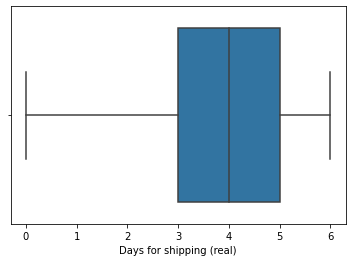

In [3495]:
sns.boxplot(df["Days for shipping (real)"])
plt.show()

### Days for shipment (scheduled)

In [3496]:
df["Days for shipment (scheduled)"].value_counts()

4    659
2    300
1     25
0     16
Name: Days for shipment (scheduled), dtype: int64

In [3497]:
df["Days for shipment (scheduled)"].unique()

array([4, 1, 2, 0], dtype=int64)

<AxesSubplot:xlabel='Days for shipment (scheduled)'>

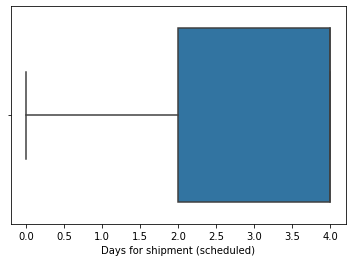

In [3498]:
sns.boxplot(df["Days for shipment (scheduled)"])

### Benefit per order

In [3499]:
df["Benefit per order"].value_counts()

 0.000000     8
 29.740000    5
 72.529999    3
 54.910000    3
 29.400000    3
             ..
 55.799999    1
 15.130000    1
 66.290001    1
-40.459999    1
 91.250000    1
Name: Benefit per order, Length: 914, dtype: int64

In [3500]:
df["Benefit per order"].unique()

array([  91.25      , -249.0899963 , -247.7799988 ,   22.86000061,
        134.2100067 ,   18.57999992,   95.18000031,   68.43000031,
        133.7200012 ,  132.1499939 ,  130.5800018 ,   45.68999863,
         21.76000023,   24.57999992,   16.38999939, -259.5799866 ,
       -246.3600006 ,   23.84000015,  102.2600021 ,   87.18000031,
        154.8600006 ,   82.30000305,   22.37000084,   17.70000076,
         90.27999878,  131.1699982 ,   90.54000092,   82.58999634,
        -17.13999939,   23.64999962,   73.41999817,  113.0699997 ,
        -97.33999634, -425.5799866 ,  152.6000061 ,  151.0299988 ,
         62.27000046,   35.        ,   57.29999924,  143.1600037 ,
        135.6900024 ,  132.6699982 ,  119.7600021 ,   31.47999954,
         86.16999817,    0.        ,  -30.75      , -122.7300034 ,
         33.59999847,   24.69000053,    9.10000038,  -21.75      ,
          6.1500001 ,   22.40999985,   25.23999977,   30.5699997 ,
         46.0699997 , -184.7799988 ,   38.75      ,   -3.65000

<AxesSubplot:xlabel='Benefit per order'>

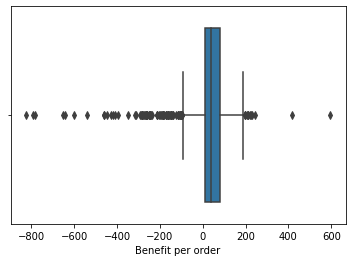

In [3501]:
sns.boxplot(df["Benefit per order"])

### Sales per customer

In [3502]:
df["Sales per customer"].value_counts()

113.089996    28
114.389999    24
118.290001    20
116.989998    17
110.489998    15
              ..
58.189999      1
324.959992     1
136.500000     1
239.949997     1
443.000000     1
Name: Sales per customer, Length: 357, dtype: int64

In [3503]:
df["Sales per customer"].unique()

array([ 314.6400146 ,  311.3599854 ,  309.7200012 ,  304.8099976 ,
        298.25      ,  294.980011  ,  288.4200134 ,  285.1400146 ,
        278.5899963 ,  275.3099976 ,  272.0299988 ,  268.7600098 ,
        262.2000122 ,  245.8099976 ,  327.75      ,  324.4700012 ,
        321.2000122 ,  317.9200134 ,  115.1800003 ,   79.18000031,
         96.        ,   75.98000336,   91.        ,   87.        ,
         82.        ,   74.68000031,   90.15000153,  117.5800018 ,
         95.98000336,  263.9700012 ,  113.9700012 ,   63.99000168,
         79.66000366,  293.9700012 ,  269.9700012 ,  224.9799957 ,
        176.3699951 ,  167.3699951 ,  163.7700043 ,  161.9700012 ,
        139.5       ,  107.9700012 ,  112.5       ,   55.40999985,
        299.9700012 ,  178.1699982 ,  170.9700012 ,  170.0700073 ,
        152.9700012 ,  150.        ,  115.1699982 ,  144.        ,
        142.5       ,  132.        ,  130.5       ,  124.5       ,
         99.58000183,  240.        ,  189.9499969 ,  188.94999

<AxesSubplot:xlabel='Sales per customer'>

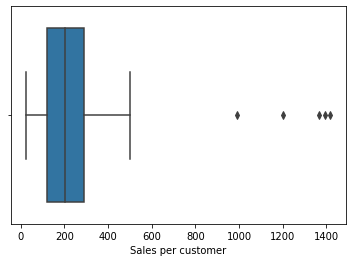

In [3504]:
sns.boxplot(df["Sales per customer"])

### Delivery Status  

In [3505]:
df["Delivery Status"].value_counts()

Late delivery        500
Advance shipping     249
Shipping on time     175
Shipping canceled     76
Name: Delivery Status, dtype: int64

In [3506]:
df["Delivery Status"].unique

<bound method Series.unique of 0      Advance shipping
1         Late delivery
2      Shipping on time
3      Advance shipping
4      Advance shipping
             ...       
995    Advance shipping
996       Late delivery
997       Late delivery
998       Late delivery
999    Advance shipping
Name: Delivery Status, Length: 1000, dtype: object>

### Late_delivery_risk 

In [3507]:
df["Late_delivery_risk"].value_counts()

1    500
0    500
Name: Late_delivery_risk, dtype: int64

In [3508]:
df["Late_delivery_risk"].unique

<bound method Series.unique of 0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    0
Name: Late_delivery_risk, Length: 1000, dtype: int64>

<AxesSubplot:xlabel='Late_delivery_risk'>

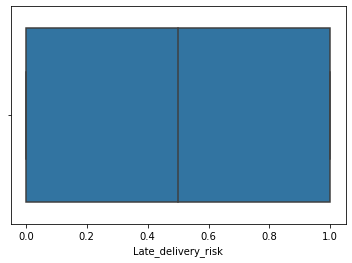

In [3509]:
sns.boxplot(df["Late_delivery_risk"])

### Category Id

In [3510]:
df["Category Id"].value_counts()

17    217
18    176
73    144
24    137
9     112
29     71
40     15
13     15
26     14
62     13
65     12
37     12
76      9
41      8
66      6
3       5
64      4
70      4
36      3
63      3
11      3
6       3
43      2
44      2
60      2
12      2
5       1
4       1
38      1
10      1
16      1
2       1
Name: Category Id, dtype: int64

In [3511]:
df["Category Id"].unique

<bound method Series.unique of 0      73
1      73
2      73
3      73
4      73
       ..
995    17
996    17
997    17
998    17
999    17
Name: Category Id, Length: 1000, dtype: int64>

<AxesSubplot:xlabel='Category Id'>

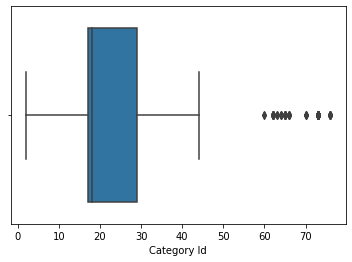

In [3512]:
sns.boxplot(df["Category Id"])

### Category Name 

In [3513]:
df["Category Name"].value_counts()

Cleats                  217
Men's Footwear          176
Sporting Goods          144
Women's Apparel         137
Cardio Equipment        112
Shop By Sport            71
Electronics              27
Accessories              15
Girls' Apparel           14
Cameras                  13
Consumer Electronics     12
Women's Clothing          9
Trade-In                  8
Crafts                    6
Baseball & Softball       5
Computers                 4
Men's Clothing            4
Golf Balls                3
Children's Clothing       3
Tennis & Racquet          3
Fitness Accessories       3
Hunting & Shooting        2
Camping & Hiking          2
Boxing & MMA              2
Baby                      2
Kids' Golf Clubs          1
Strength Training         1
Basketball                1
Soccer                    1
As Seen on  TV!           1
Lacrosse                  1
Name: Category Name, dtype: int64

In [3514]:
df["Category Name"].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby '], dtype=object)

### Customer City

In [3515]:
df["Customer City"].value_counts()

Caguas           448
Los Angeles       23
Chicago           20
Philadelphia      12
San Jose           9
                ... 
Saint Charles      1
Denver             1
Sugar Land         1
Edison             1
Palmdale           1
Name: Customer City, Length: 270, dtype: int64

### Customer Country

In [3516]:
df["Customer Country"].value_counts()

EE. UU.        536
Puerto Rico    464
Name: Customer Country, dtype: int64

In [3517]:
df["Customer Country"].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

### Customer Email

In [3518]:
df["Customer Email"].value_counts()

XXXXXXXXX    1000
Name: Customer Email, dtype: int64

### Customer Fname

In [3519]:
df["Customer Fname"].value_counts()

Mary        334
John         13
Cynthia      12
Jennifer      9
Gregory       7
           ... 
Cora          1
Winifred      1
Victoria      1
Wanda         1
Myra          1
Name: Customer Fname, Length: 322, dtype: int64

In [3520]:
df["Customer Fname"].unique()

array(['Cally', 'Irene', 'Gillian', 'Tana', 'Orli', 'Kimberly',
       'Constance', 'Erica', 'Nichole', 'Oprah', 'Germane', 'Freya',
       'Cassandra', 'Natalie', 'Kimberley', 'Sade', 'Brynne', 'Ciara',
       'Bo', 'Kim', 'Kellie', 'Alma', 'Yeo', 'Lucy', 'Simone', 'Roary',
       'Quail', 'Hannah', 'Evelyn', 'Jael', 'Teagan', 'Joan', 'Basia',
       'Dominique', 'Ainsley', 'Aurora', 'Libby', 'Amy', 'Ivory',
       'Karina', 'Deanna', 'Dacey', 'Adele', 'Sybill', 'Kay', 'Stacy',
       'Marah', 'Taylor', 'Mary', 'Elizabeth', 'Katherine', 'Dennis',
       'Frances', 'Alice', 'Kyle', 'Brenda', 'Frank', 'Johnny', 'Austin',
       'Michael', 'Vincent', 'Gregory', 'Lisa', 'Megan', 'Grace',
       'Douglas', 'Wayne', 'Ronald', 'Tammy', 'Christina', 'Alexander',
       'Sandra', 'Ruth', 'Lauren', 'Melissa', 'Maria', 'Eugene', 'James',
       'John', 'Roy', 'Janet', 'Nicole', 'Sharon', 'Matthew', 'Anthony',
       'Jerry', 'Laura', 'Jack', 'Kirestin', 'Nora', 'Jennifer',
       'Madonna', 'Noe

### Customer Id

In [3521]:
df['Customer Id'].unique()

array([20755, 19492, 19491, 19490, 19489, 19488, 19487, 19486, 19485,
       19484, 19483, 19482, 19481, 19480, 19479, 19478, 19477, 19476,
       19475, 19474, 19473, 19472, 19471, 19470, 19469, 19468, 19467,
       19466, 19465, 19464, 19463, 19462, 19461, 19460, 19459, 19458,
       19457, 19456, 19455, 19454, 19453, 19452, 19451, 19450, 19449,
       19448, 19447, 19446,  9083,  4741,   639,  9702,  9114,  1362,
        8011,  3296,  3182,  7864, 11169,  5197,  1535,  6122,  9451,
         542, 11329,  3570,   650,  9353,    54, 12151, 10018,  4936,
        8707,  1025,  8831, 10679,  5007,  9854,   376,  5417, 10759,
        8541,  3752,  4673,  5367, 10485,  9272,   647,  6398,  4209,
        8917,  7784,  1425,  2737,  6428,  6543,  3990,  8524,  9204,
       11761,  9554,  5118,  5506,  1423,   138,  6360,  2053, 10344,
        3375,  1339,  7247,  1273,  6277,  7701,  4126,  9528,  1853,
       11149,  5828,  6887,  4781, 10668,  5421, 10200, 11254, 11106,
        8456,  6149,

In [3522]:
df['Customer Id'].unique()

array([20755, 19492, 19491, 19490, 19489, 19488, 19487, 19486, 19485,
       19484, 19483, 19482, 19481, 19480, 19479, 19478, 19477, 19476,
       19475, 19474, 19473, 19472, 19471, 19470, 19469, 19468, 19467,
       19466, 19465, 19464, 19463, 19462, 19461, 19460, 19459, 19458,
       19457, 19456, 19455, 19454, 19453, 19452, 19451, 19450, 19449,
       19448, 19447, 19446,  9083,  4741,   639,  9702,  9114,  1362,
        8011,  3296,  3182,  7864, 11169,  5197,  1535,  6122,  9451,
         542, 11329,  3570,   650,  9353,    54, 12151, 10018,  4936,
        8707,  1025,  8831, 10679,  5007,  9854,   376,  5417, 10759,
        8541,  3752,  4673,  5367, 10485,  9272,   647,  6398,  4209,
        8917,  7784,  1425,  2737,  6428,  6543,  3990,  8524,  9204,
       11761,  9554,  5118,  5506,  1423,   138,  6360,  2053, 10344,
        3375,  1339,  7247,  1273,  6277,  7701,  4126,  9528,  1853,
       11149,  5828,  6887,  4781, 10668,  5421, 10200, 11254, 11106,
        8456,  6149,

In [3523]:
df['Customer Id'].value_counts()

5007     5
9726     5
7112     3
2426     3
9114     3
        ..
13461    1
1169     1
19454    1
13190    1
19431    1
Name: Customer Id, Length: 856, dtype: int64

In [3524]:
df['Customer Id'].isna().sum()

0

<AxesSubplot:>

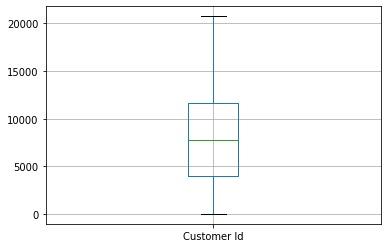

In [3525]:
df[['Customer Id']].boxplot()

### Customer Lname

In [3526]:
df['Customer Lname'].unique()

array(['Holloway', 'Luna', 'Maldonado', 'Tate', 'Hendricks', 'Flowers',
       'Terrell', 'Stevens', 'Olsen', 'Delacruz', 'Short', 'Robbins',
       'Jensen', 'Mcfadden', 'Sharpe', 'Lancaster', 'Giles', 'Bird',
       'Griffin', 'Simon', 'Farmer', 'Conley', 'Mcknight', 'Vance',
       'Wheeler', 'Ashley', 'Velez', 'Kelly', 'Mcfarland', 'Romero',
       'Wilder', 'Watts', 'Rogers', 'Mathis', 'Sharp', 'Bray', 'Lindsay',
       'Parks', 'Prince', 'Goff', 'Walters', 'Pennington', 'Spencer',
       'Sandoval', 'Mckinney', 'Lara', 'Wood', 'Frank', 'Smith',
       'Pittman', 'Tyler', 'Hill', 'Thomas', 'Jordan', 'Livingston',
       'Nelson', 'Sexton', 'Scott', 'Olson', 'Krueger', 'Rodriguez',
       'Todd', 'Sanchez', 'Meyer', 'Vega', 'Hodges', 'Mccormick',
       'Blackwell', 'Rios', 'Harvey', 'Farrell', 'Harris', 'Coleman',
       'Hayes', 'Day', 'Dawson', 'Phillips', 'Mack', 'Evans', 'Lawson',
       'Stokes', 'Flores', 'Austin', 'Oconnell', 'Carlson', 'Navarro',
       'Bush', 'Young', 'F

In [3527]:
df['Customer Lname'].value_counts()

Smith       294
Williams      9
Sanchez       8
Garcia        6
Nelson        6
           ... 
Pena          1
Webster       1
Scott         1
Krueger       1
Beck          1
Name: Customer Lname, Length: 433, dtype: int64

In [3528]:
df['Customer Lname'].isna().sum()

0

### Customer Password

In [3529]:
df['Customer Password'].unique()

array(['XXXXXXXXX'], dtype=object)

In [3530]:
df['Customer Password'].value_counts()

XXXXXXXXX    1000
Name: Customer Password, dtype: int64

In [3531]:
df['Customer Password'].isna().sum()

0

### Customer Segment

In [3532]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [3533]:
df['Customer Segment'].value_counts()

Consumer       594
Corporate      245
Home Office    161
Name: Customer Segment, dtype: int64

In [3534]:
df['Customer Segment'].isna().sum()

0

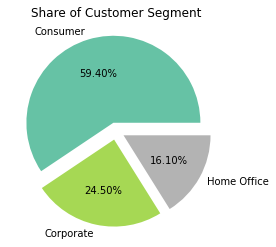

In [3535]:
plt.title('Share of Customer Segment')
df['Customer Segment'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1])
plt.ylabel('');

### Customer State

In [3536]:
df['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS'], dtype=object)

In [3537]:
df['Customer State'].value_counts()

PR    464
CA    159
NY     59
TX     36
IL     36
PA     27
FL     25
OH     20
NJ     19
MD     16
MA     14
AZ     14
MI     13
HI     11
GA     10
OR      9
VA      8
TN      8
CO      5
NC      5
WI      4
UT      4
MO      4
MN      4
WA      3
WV      2
ND      2
NV      2
RI      2
CT      2
IN      2
MT      2
ID      2
KS      1
DC      1
DE      1
NM      1
KY      1
SC      1
LA      1
Name: Customer State, dtype: int64

In [3538]:
df['Customer State'].isna().sum()

0

### Customer Street

In [3539]:
df['Customer Street'].unique()

array(['5365 Noble Nectar Island', '2679 Rustic Loop',
       '8510 Round Bear Gate', '3200 Amber Bend',
       '8671 Iron Anchor Corners', '2122 Hazy Corner',
       '1879 Green Pine Bank', '7595 Cotton Log Row', '2051 Dusty Route',
       '9139 Blue Blossom Court', '4058 Quiet Heights',
       '3243 Shady Corner', '131 Sunny Treasure Green',
       '2531 Wishing Square', '6417 Silver Towers', '257 Harvest Close',
       '7342 Hazy Beacon Park', '7787 Lazy Corners',
       '5136 Rustic Pioneer Estates', '1723 Tawny Via',
       '7111 Silent Fox Gardens', '3732 Old Mountain Bank',
       '6217 Rustic Lake Forest', '1082 Quiet Treasure Link',
       '3176 Round Gate', '1426 Fallen Line',
       '9814 Emerald Prairie Limits', '8271 Tawny Elk Abbey',
       '3931 Gentle Ramp', '9699 Honey Rise', '1564 Rocky Terrace',
       '4294 High Passage', '5918 Golden Beacon Freeway',
       '3915 Broad Lookout', '7190 Silver Horse Glade',
       '830 Broad Beacon Maze', '6127 Dewy Goose Downs', '11

In [3540]:
df['Customer Street'].value_counts()

2264 Thunder Abbey           5
4097 Middle Spring Centre    5
7595 Cotton Log Row          4
1088 Jagged Hills Nook       3
8569 Umber Fox Common        3
                            ..
5913 Easy Quail Wynd         1
3567 Rocky Grove             1
9391 Little Leaf Ramp        1
8768 Shady Arbor             1
4520 Grand Port              1
Name: Customer Street, Length: 798, dtype: int64

In [3541]:
df['Customer Street'].isna().sum()

0

### Customer Zipcode

In [3542]:
df['Customer Zipcode'].unique()

array([  725., 95125., 90027., 14150., 33162., 94583., 11520., 93905.,
        1960.,   729., 90723., 60056., 90813., 95670., 59102., 18702.,
       48066., 90706., 60187., 48238., 75220., 17013., 75228., 19702.,
       91402., 30318., 94539., 14609., 75211.,   957.,   784.,   795.,
       20744., 93304., 11368., 45238., 20874., 75006., 77093., 90023.,
       96706.,  8701., 13440., 92083., 76106., 54935., 19139., 91764.,
       32765., 14221., 96822., 92056., 14120., 93611., 11434., 62040.,
        2155., 91766., 85281., 92703., 17402., 80010., 93065., 20904.,
       55124., 78201., 19143., 19149., 10466., 27858.,  7960., 92115.,
       93030., 33147., 87111., 79109., 33549., 97701.,  8816., 29720.,
       91762., 77015., 23666., 10016., 93257., 97223., 44136., 79927.,
       78840., 84010., 98031., 60620.,  2360., 11691., 77088., 19124.,
       48227., 92840., 92105., 60609., 92870., 95148., 44060., 95051.,
        7083., 90805., 92683., 33068., 91702., 33324.,  8540.,  8861.,
      

In [3543]:
df['Customer Zipcode'].value_counts()

725.0      448
96822.0      7
90046.0      6
19143.0      5
17013.0      5
          ... 
30047.0      1
43302.0      1
11758.0      1
96817.0      1
31907.0      1
Name: Customer Zipcode, Length: 373, dtype: int64

In [3544]:
df['Customer Zipcode'].isna().sum()

0

<AxesSubplot:>

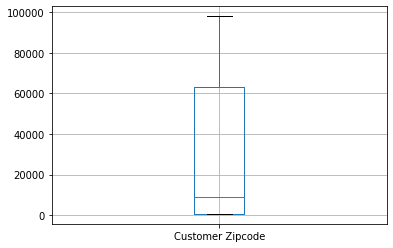

In [3545]:
df[['Customer Zipcode']].boxplot()

<AxesSubplot:xlabel='Customer Zipcode'>

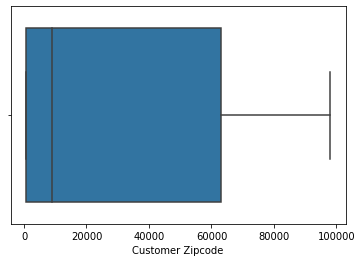

In [3546]:
sns.boxplot(x = df['Customer Zipcode'])

### Department Id

In [3547]:
df['Department Id'].unique()

array([ 2,  4,  5,  3,  6,  7, 10], dtype=int64)

In [3548]:
df['Department Id'].value_counts()

4     417
5     222
2     155
3     134
6      39
10     29
7       4
Name: Department Id, dtype: int64

In [3549]:
df['Department Id'].isna().sum()

0

<AxesSubplot:>

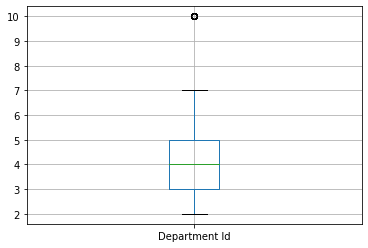

In [3550]:
df[['Department Id']].boxplot()

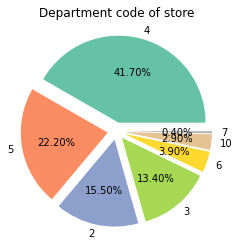

In [3551]:
plt.title('Department code of store')
df['Department Id'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1,0.1, 0.1, 0.1,0.1])
plt.ylabel('');

### Department Name

In [3552]:
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology'], dtype=object)

In [3553]:
df['Department Name'].value_counts()

Apparel       417
Golf          222
Fitness       155
Footwear      134
Outdoors       39
Technology     29
Fan Shop        4
Name: Department Name, dtype: int64

In [3554]:
df['Department Name'].isna().sum()

0

### Latitude

In [3555]:
df['Latitude'].unique()

array([18.2514534 , 18.27945137, 37.29223251, 34.12594605, 18.25376892,
       43.01396942, 18.24253845, 25.92886925, 18.23322296, 37.77399063,
       18.28284454, 40.65486527, 36.6763382 , 18.27843857, 42.52627564,
       18.28404999, 18.3957901 , 33.89869309, 18.233778  , 42.04830551,
       33.78245163, 18.28337669, 38.61177445, 18.20733643, 45.78831101,
       18.26163292, 41.23545456, 18.27022362, 41.86886215, 33.90942383,
       18.27526093, 41.86544037, 18.28713608, 42.39110184, 32.86539459,
       18.24074173, 40.03171921, 32.81010819, 18.28604889, 39.68188095,
       34.15893936, 18.28294563, 33.81632614, 18.24103928, 37.49027634,
       18.26469612, 43.18824005, 32.753685  , 18.38011932, 18.23557282,
       18.02536774, 18.27383804, 18.2848053 , 18.29496765, 18.25571251,
       18.23466301, 18.26268196, 18.28279495, 18.27466202, 18.2689991 ,
       18.2308178 , 18.26138115, 18.23650742, 18.35921478, 18.29944229,
       18.28996849, 18.2275734 , 18.2988205 , 18.02538109, 18.25

In [3556]:
df['Latitude'].value_counts()

18.227573    6
21.305620    6
34.099609    6
18.249846    5
18.241627    5
            ..
40.740322    1
40.566780    1
33.211220    1
18.239571    1
18.283758    1
Name: Latitude, Length: 791, dtype: int64

In [3557]:
df['Latitude'].isna().sum()

0

<AxesSubplot:>

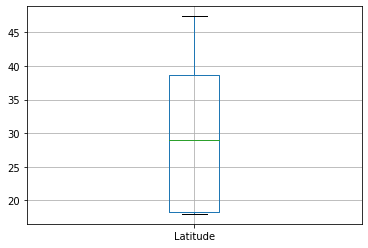

In [3558]:
df[['Latitude']].boxplot()

### Longitude

In [3559]:
df['Longitude'].unique()

array([ -66.03705597,  -66.0370636 , -121.881279  , -118.2910156 ,
        -66.03704834,  -78.87906647,  -80.16287231, -121.966629  ,
        -73.58707428, -121.656517  ,  -70.92703247,  -65.87288666,
       -118.1745605 ,  -87.96134186, -118.1922455 , -121.2828674 ,
       -108.5594101 ,  -75.86985779,  -84.57365418, -118.1253586 ,
        -88.10990143,  -83.13121796,  -96.86858368,  -76.87709808,
        -96.68649292,  -75.64421082, -118.1809387 ,  -84.44550324,
       -121.9271088 ,  -77.56706238,  -96.86553955,  -66.18312836,
        -66.3706131 ,  -66.61303711,  -66.37063599,  -66.37059021,
        -66.37050629,  -66.37059784,  -66.37049866,  -66.37055969,
        -66.37058258,  -66.37052155,  -66.37056732,  -66.37051392,
        -66.07779694,  -66.37054443,  -66.04563141,  -66.61508179,
        -66.37062836,  -66.04867554,  -66.0253067 ,  -66.37055206,
        -66.07783508,  -66.37052918,  -66.3705368 ,  -66.37057495,
        -66.1126709 ,  -66.37060547,  -66.04357147,  -66.50184

In [3560]:
df['Longitude'].value_counts()

-66.037056     52
-66.370506     29
-66.037064     28
-66.370590     26
-66.370544     26
               ..
-117.965088     1
-76.615067      1
-89.973106      1
-112.169777     1
-87.718216      1
Name: Longitude, Length: 471, dtype: int64

In [3561]:
df['Longitude'].isna().sum()

0

<AxesSubplot:>

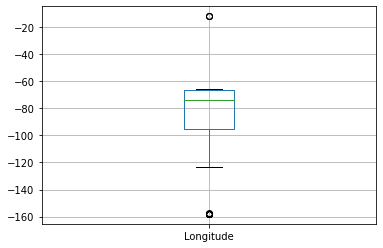

In [3562]:
df[['Longitude']].boxplot()

### Market

In [3563]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [3564]:
df['Market'].value_counts()

Europe          343
Pacific Asia    341
LATAM           179
Africa          101
USCA             36
Name: Market, dtype: int64

In [3565]:
df['Market'].isna().sum()

0

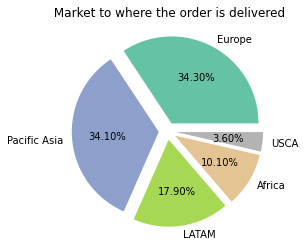

In [3566]:
plt.title(' Market to where the order is delivered')
df['Market'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', cmap = 'Set2', explode = [0.1, 0.1, 0.1,0.1, 0.1])
plt.ylabel('');

### Order City

In [3567]:
df['Order City'].unique()

array(['Bekasi', 'Bikaner', 'Townsville', 'Toowoomba', 'Guangzhou',
       'Tokio', 'Manado', 'Sangli', 'Seúl', 'Jabalpur', 'Geelong',
       'Brisbane', 'Mandurah', 'Guilin', 'Delhi', 'Suzhou', 'Singapur',
       'Hubli', 'Wollongong', 'Medan', 'Canberra', 'Bangalore', 'Yiwu',
       'Mirzapur', 'Bursa', 'Murray Bridge', 'Kartal', 'Ulan Bator',
       'Estambul', 'Raipur', 'Pasco', 'Los Angeles', 'San Francisco',
       'Overland Park', 'Ugep', 'Kinshasa', 'Dakar', 'Casablanca',
       'Dortmund', 'Drancy', 'Nantes', 'Groningen', 'Gateshead',
       'Eastbourne', 'Hayange', 'Portsmouth', 'Gelsenkirchen', 'Nice',
       'Petapa', 'Mejicanos', 'David', 'Santo Domingo', 'Cabimas',
       'Dos Quebradas', 'Ilopango', 'Tegucigalpa', 'Juazeiro',
       'Mexico City', 'Tlaquepaque', 'Puebla', 'São Paulo', 'Montevideo',
       'Buenos Aires', 'Barueri', 'Arapongas', 'Camagüey', 'Las Tunas',
       'Tepic', 'San Miguelito', 'Ixtapaluca', 'Maceió', 'Belo Horizonte',
       'Santiago de Cuba', '

In [3568]:
df['Order City'].value_counts()

London                  11
Ho Chi Minh City         9
Santo Domingo            9
Newcastle                9
Tegucigalpa              8
                        ..
Hargeysa                 1
Le Mans                  1
Waitakere                1
Hidalgo                  1
Talavera de la Reina     1
Name: Order City, Length: 556, dtype: int64

In [3569]:
df['Order City'].isna().sum()

0

### Order Country

In [3570]:
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [3571]:
df['Order Country'].value_counts()

Francia        87
Australia      74
Reino Unido    65
China          59
India          58
               ..
Jamaica         1
Guinea          1
Bulgaria        1
Mozambique      1
Níger           1
Name: Order Country, Length: 93, dtype: int64

In [3572]:
df['Order Country'].isna().sum()

0

### Order Customer Id

In [3573]:
df["Order Customer Id"].value_counts()

5007     5
9726     5
7112     3
2426     3
9114     3
        ..
13461    1
1169     1
19454    1
13190    1
19431    1
Name: Order Customer Id, Length: 856, dtype: int64

In [3574]:
df["Order Customer Id"].unique()

array([20755, 19492, 19491, 19490, 19489, 19488, 19487, 19486, 19485,
       19484, 19483, 19482, 19481, 19480, 19479, 19478, 19477, 19476,
       19475, 19474, 19473, 19472, 19471, 19470, 19469, 19468, 19467,
       19466, 19465, 19464, 19463, 19462, 19461, 19460, 19459, 19458,
       19457, 19456, 19455, 19454, 19453, 19452, 19451, 19450, 19449,
       19448, 19447, 19446,  9083,  4741,   639,  9702,  9114,  1362,
        8011,  3296,  3182,  7864, 11169,  5197,  1535,  6122,  9451,
         542, 11329,  3570,   650,  9353,    54, 12151, 10018,  4936,
        8707,  1025,  8831, 10679,  5007,  9854,   376,  5417, 10759,
        8541,  3752,  4673,  5367, 10485,  9272,   647,  6398,  4209,
        8917,  7784,  1425,  2737,  6428,  6543,  3990,  8524,  9204,
       11761,  9554,  5118,  5506,  1423,   138,  6360,  2053, 10344,
        3375,  1339,  7247,  1273,  6277,  7701,  4126,  9528,  1853,
       11149,  5828,  6887,  4781, 10668,  5421, 10200, 11254, 11106,
        8456,  6149,

In [3575]:
df["Order Customer Id"].isna().sum()

0

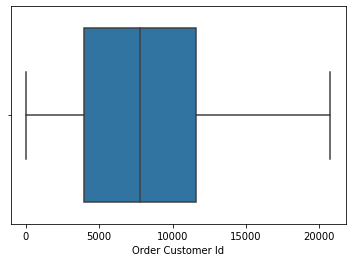

In [3576]:
sns.boxplot(df["Order Customer Id"])
plt.show()

### order date (DateOrders)

In [3577]:
df["order date (DateOrders)"].value_counts()

11/28/2016 1:18    3
8/7/2017 6:33      3
8/4/2017 2:31      3
7/22/2017 7:16     3
10/2/2017 11:01    3
                  ..
7/22/2015 23:53    1
1/12/2018 18:56    1
1/25/2017 8:34     1
4/10/2015 0:02     1
5/27/2015 1:32     1
Name: order date (DateOrders), Length: 891, dtype: int64

In [3578]:
df["order date (DateOrders)"].unique()

array(['1/31/2018 22:56', '1/13/2018 12:27', '1/13/2018 12:06',
       '1/13/2018 11:45', '1/13/2018 11:24', '1/13/2018 11:03',
       '1/13/2018 10:42', '1/13/2018 10:21', '1/13/2018 10:00',
       '1/13/2018 9:39', '1/13/2018 9:18', '1/13/2018 8:57',
       '1/13/2018 8:36', '1/13/2018 8:15', '1/13/2018 7:54',
       '1/13/2018 7:33', '1/13/2018 7:12', '1/13/2018 6:51',
       '1/13/2018 6:30', '1/13/2018 6:09', '1/13/2018 5:48',
       '1/13/2018 5:27', '1/13/2018 5:06', '1/13/2018 4:45',
       '1/13/2018 4:24', '1/13/2018 4:03', '1/13/2018 3:42',
       '1/13/2018 3:21', '1/13/2018 3:00', '1/13/2018 2:39',
       '1/13/2018 2:18', '1/13/2018 1:57', '1/13/2018 1:36',
       '1/13/2018 1:15', '1/13/2018 0:54', '1/13/2018 0:33',
       '1/13/2018 0:12', '1/12/2018 23:51', '1/12/2018 23:30',
       '1/12/2018 23:09', '1/12/2018 22:48', '1/12/2018 22:27',
       '1/12/2018 22:05', '1/12/2018 21:44', '1/12/2018 21:23',
       '1/12/2018 21:02', '1/12/2018 20:41', '1/12/2018 20:20',
    

In [3579]:
df["order date (DateOrders)"].isna().sum()

0

### Order Id

In [3580]:
df["Order Id"].value_counts()

64813    3
63936    3
10831    3
50054    3
47752    3
        ..
75859    1
46308    1
73893    1
46305    1
41893    1
Name: Order Id, Length: 891, dtype: int64

In [3581]:
df["Order Id"].unique()

array([77202, 75939, 75938, 75937, 75936, 75935, 75934, 75933, 75932,
       75931, 75930, 75929, 75928, 75927, 75926, 75925, 75924, 75923,
       75922, 75921, 75920, 75919, 75918, 75917, 75916, 75915, 75914,
       75913, 75912, 75911, 75910, 75909, 75908, 75907, 75906, 75905,
       75904, 75903, 75902, 75901, 75900, 75899, 75898, 75897, 75896,
       75895, 75894, 75893, 28744, 45461, 31115, 45766, 47752, 50054,
       20365, 36146, 41234, 32090, 34773, 44046, 46414, 46599, 48434,
       12827, 63936, 65030, 18108, 62571, 17162, 65922, 64813, 67892,
       12525,  5895, 56359, 58613,  7824,  7814, 60807, 53413,  7888,
        6783, 56973, 55155,  5991,  2263, 53403, 51298,  4919, 52640,
        6358, 57106,  6245, 52166, 56172, 55829, 52478, 57242,  3137,
       60127,  3828, 60386,   973, 57999, 54585, 57598, 54274, 60673,
       59387, 10007, 55984, 58375, 56448,  8221, 58034,  2203, 53069,
       60146, 55409,  8678,  7980, 57185,  8636, 61192, 55876, 53331,
       51725, 52562,

In [3582]:
df["Order Id"].isna().sum()

0

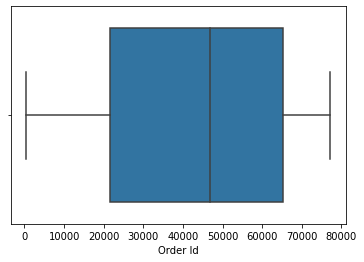

In [3583]:
sns.boxplot(df["Order Id"])
plt.show()

### Order Item Cardprod Id

In [3584]:
df["Order Item Cardprod Id"].value_counts()

365     216
403     176
1360    144
502     137
191     110
627      70
1349     13
1352     12
1363      9
282       6
1353      6
565       6
278       5
1357      4
44        4
924       4
818       4
1351      4
905       4
885       4
567       3
917       3
893       3
572       3
116       3
825       3
235       3
1350      3
1347      2
172       2
276       2
273       2
977       2
957       2
564       2
804       2
886       2
359       1
835       1
37        1
926       1
60        1
93        1
906       1
897       1
203       1
251       1
249       1
364       1
828       1
823       1
822       1
821       1
306       1
810       1
642       1
24        1
Name: Order Item Cardprod Id, dtype: int64

In [3585]:
df["Order Item Cardprod Id"].unique()

array([1360,  365,  627,  502,  278,  249,  191,  917,  828,  642,  818,
        825,  306,  977,   44,  251,  403,  957, 1352, 1349, 1351,   60,
         24,  567,  893,  924,  905,  564,  885, 1363, 1353, 1357,  906,
        886,  926,  116,  235,  273,  282,  359,  565,  572,  804,  822,
        835,  276,  823,  203,  364, 1350,  897,   37,  172,  810,  821,
         93, 1347], dtype=int64)

In [3586]:
df["Order Item Cardprod Id"].isna().sum()

0

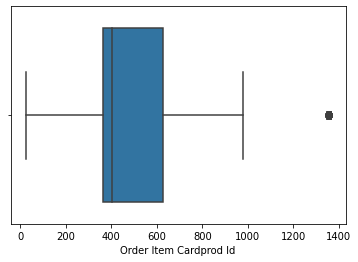

In [3587]:
sns.boxplot(df["Order Item Cardprod Id"])
plt.show()

### Order Item Discount

In [3588]:
df["Order Item Discount"].value_counts()

0.000000     45
16.900000    28
15.600000    24
13.000000    21
11.700000    20
             ..
8.400000      1
70.000000     1
11.250000     1
27.500000     1
27.190001     1
Name: Order Item Discount, Length: 223, dtype: int64

In [3589]:
df["Order Item Discount"].unique()

array([ 13.10999966,  16.38999939,  18.03000069,  22.94000053,
        29.5       ,  32.77999878,  39.33000183,  42.61000061,
        49.15999985,  52.43999863,  55.72000122,  59.        ,
        65.55000305,  81.94000244,   0.        ,   3.27999997,
         6.55999994,   9.82999992,   4.80000019,   0.80000001,
         4.        ,   9.        ,  13.        ,  18.        ,
        15.30000019,  19.79000092,   2.4000001 ,  24.        ,
        36.        ,   6.        ,   1.98000002,  16.30999947,
        30.        ,  74.98999786,   3.5999999 ,  12.60000038,
        16.20000076,  10.5       ,  12.        ,  37.5       ,
        10.56000042,   1.79999995,   9.89999962,  27.        ,
         7.5       ,  19.5       ,  25.5       ,  20.38999939,
        10.        ,  11.        ,  13.75      ,  13.5       ,
        25.        ,  25.98999977,  32.5       ,  29.98999977,
        31.98999977,  42.5       ,  50.        ,  49.99000168,
        62.5       ,   6.4000001 ,  53.99000168,  25.48

In [3590]:
df["Order Item Discount"].isna().sum()

0

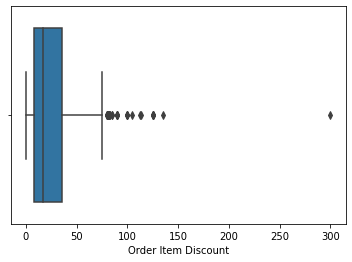

In [3591]:
sns.boxplot(df["Order Item Discount"])
plt.show()

### Order Item Discount Rate

In [3592]:
df["Order Item Discount Rate"].value_counts()

0.13    77
0.10    76
0.15    75
0.12    72
0.09    68
0.05    63
0.06    61
0.01    61
0.07    56
0.04    55
0.17    49
0.18    46
0.00    45
0.16    44
0.02    42
0.03    38
0.20    36
0.25    36
Name: Order Item Discount Rate, dtype: int64

In [3593]:
df["Order Item Discount Rate"].unique()

array([0.04      , 0.05      , 0.06      , 0.07      , 0.09      ,
       0.1       , 0.12      , 0.13      , 0.15000001, 0.16      ,
       0.17      , 0.18000001, 0.2       , 0.25      , 0.        ,
       0.01      , 0.02      , 0.03      ])

In [3594]:
df["Order Item Discount Rate"].isna().sum()

0

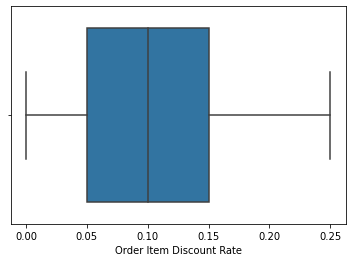

In [3595]:
sns.boxplot(df["Order Item Discount Rate"])
plt.show()

### Order Item Id

In [3596]:
df["Order Item Id"].value_counts()

34810     1
29385     1
105187    1
170721    1
164575    1
         ..
136489    1
43356     1
130341    1
38180     1
169288    1
Name: Order Item Id, Length: 1000, dtype: int64

In [3597]:
df["Order Item Id"].unique()

array([180517, 179254, 179253, 179252, 179251, 179250, 179249, 179248,
       179247, 179246, 179245, 179244, 179243, 179242, 179241, 179240,
       179239, 179238, 179237, 179236, 179235, 179234, 179233, 179232,
       179231, 179230, 179229, 179228, 179227, 179226, 179225, 179224,
       179223, 179222, 179221, 179220, 179219, 179218, 179217, 179216,
       179215, 179214, 179213, 179212, 179211, 179210, 179209, 179208,
        71956, 113598,  77757, 114401, 119405, 125135,  50842,  90273,
       102921,  80250,  86866, 110025, 116033, 116462, 121134,  32072,
       159828, 162548,  45253, 156394,  42919, 164735, 159829, 162007,
       169747,  31344,  14664, 140970, 146701,  19564,  19544,  19542,
       152161, 133456,  19707,  16956, 142502,  19563, 137932,  14921,
         5671,   5669, 133427, 128201,  12307, 131580,  15921, 142841,
        15634, 130341, 140494, 139611, 131161, 143183,   7805, 150464,
         9521, 151122,   2420, 145119, 136527, 144075, 135699, 151869,
      

In [3598]:
df["Order Item Id"].isna().sum()

0

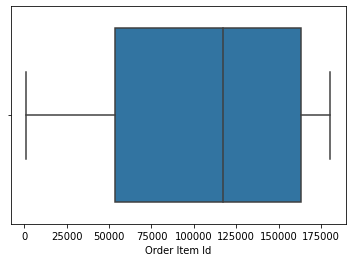

In [3599]:
sns.boxplot(df["Order Item Id"])
plt.show()

### Order Item Product Price

In [3600]:
df["Order Item Product Price"].value_counts()

59.990002      220
129.990005     176
327.750000     144
50.000000      137
99.989998      111
39.990002       73
24.990000       16
452.040008      13
31.990000       13
252.880005      12
215.820007       9
44.990002        8
461.480011       6
70.000000        6
15.990000        5
30.000000        5
47.990002        5
1500.000000      4
34.990002        4
210.850006       4
25.000000        3
21.990000        3
357.100006       3
19.990000        3
27.990000        2
29.990000        2
59.080002        2
89.989998        2
51.990002        2
299.980011       2
299.989990       1
999.989990       1
54.970001        1
399.989990       1
79.989998        1
Name: Order Item Product Price, dtype: int64

In [3601]:
df["Order Item Product Price"].unique()

array([ 327.75      ,   59.99000168,   39.99000168,   50.        ,
         44.99000168,   54.97000122,   99.98999786,   21.98999977,
         31.98999977,   30.        ,   47.99000168,   89.98999786,
         29.98999977,  129.9900055 ,  299.980011  ,  252.8800049 ,
        452.0400085 , 1500.        ,  999.9899902 ,   79.98999786,
         25.        ,   24.98999977,   15.98999977,  215.8200073 ,
        461.480011  ,  210.8500061 ,   34.99000168,   27.98999977,
         70.        ,   19.98999977,   51.99000168,  399.9899902 ,
        299.9899902 ,  357.1000061 ,   59.08000183])

In [3602]:
df["Order Item Product Price"].isna().sum()

0

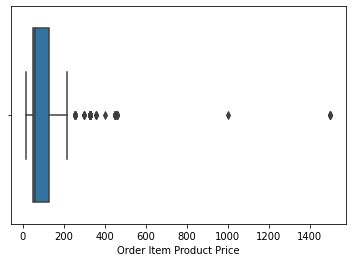

In [3603]:
sns.boxplot(df["Order Item Product Price"])
plt.show()

### Order Item Profit Ratio 

In [3604]:
df["Order Item Profit Ratio"].value_counts()

 0.48    55
 0.33    41
 0.26    39
 0.34    36
 0.35    36
         ..
-0.21     1
-0.55     1
-0.09     1
-0.07     1
-0.10     1
Name: Order Item Profit Ratio, Length: 108, dtype: int64

In [3605]:
df["Order Item Profit Ratio"].unique()

array([ 0.28999999, -0.80000001,  0.08      ,  0.44999999,  0.06      ,
        0.33000001,  0.23999999,  0.47999999,  0.17      ,  0.1       ,
        0.05      , -0.76999998,  0.28      ,  0.5       ,  0.27000001,
        0.31      ,  0.46000001,  0.30000001, -0.06      ,  0.09      ,
       -0.30000001, -1.33000004,  0.2       ,  0.11      ,  0.19      ,
        0.41999999,  0.        , -0.27000001, -1.54999995,  0.34999999,
       -0.25      ,  0.25999999, -0.69999999,  0.34      ,  0.44      ,
        0.49000001,  0.25      ,  0.15000001,  0.14      , -1.60000002,
       -0.16      ,  0.16      ,  0.13      ,  0.04      ,  0.36000001,
        0.22      , -0.1       , -0.2       , -0.04      ,  0.37999999,
       -1.64999998, -0.60000002, -0.05      ,  0.18000001,  0.47      ,
       -0.82999998, -0.55000001,  0.03      , -0.68000001, -0.14      ,
        0.12      ,  0.23      ,  0.07      , -1.70000005, -0.19      ,
       -0.01      , -0.73000002,  0.41      , -2.70000005, -0.67

In [3606]:
df["Order Item Profit Ratio"].isna().sum()

0

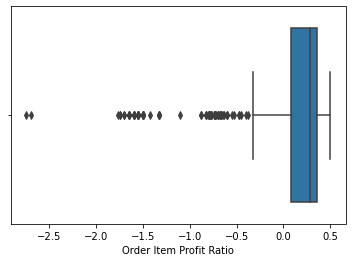

In [3607]:
sns.boxplot(df["Order Item Profit Ratio"])
plt.show()

### Order Item Quantity 

In [3608]:
df["Order Item Quantity"].value_counts()

1    415
5    293
4    167
3     70
2     55
Name: Order Item Quantity, dtype: int64

In [3609]:
df["Order Item Quantity"].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [3610]:
df["Order Item Quantity"].isna().sum()

0

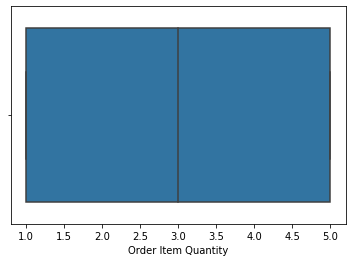

In [3611]:
sns.boxplot(df["Order Item Quantity"])
plt.show()

### Sales

In [3612]:
df["Sales"].value_counts()

129.990005    176
327.750000    144
299.950012    105
250.000000     62
239.960007     59
             ... 
79.959999       1
79.989998       1
39.980000       1
49.980000       1
399.989990      1
Name: Sales, Length: 67, dtype: int64

In [3613]:
df["Sales"].unique()

array([ 327.75      ,  119.9800034 ,   79.98000336,  100.        ,
         89.98000336,  109.9400024 ,  299.9700012 ,  119.9700012 ,
         65.97000122,   95.97000122,  179.9700012 ,  150.        ,
        250.        ,  199.9499969 ,  239.9499969 ,  159.9499969 ,
        449.9500122 ,  149.9499969 ,  299.9500122 ,  499.9500122 ,
         99.98999786,  129.9900055 ,   59.99000168,  299.980011  ,
        252.8800049 ,  452.0400085 , 1500.        ,  999.9899902 ,
         79.98999786,   44.99000168,  134.9700012 ,   75.        ,
         74.97000122,   47.97000122,  239.9600067 ,  200.        ,
        159.9600067 ,   99.95999908,  399.9599915 ,  120.        ,
        215.8200073 ,  461.480011  ,  210.8500061 ,  124.9499969 ,
         79.94999695,  224.9499969 ,  174.9499969 ,  139.9499969 ,
        140.        ,   50.        ,   63.97999954,   49.97999954,
         39.97999954,   95.98000336,  127.9599991 ,  207.9600067 ,
        350.        ,   99.94999695,  399.9899902 ,   27.98999

In [3614]:
df["Sales"].isna().sum()

0

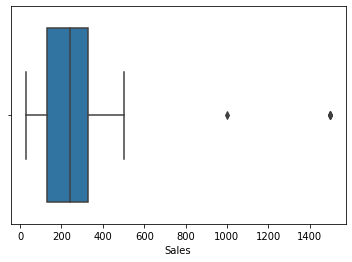

In [3615]:
sns.boxplot(df["Sales"])
plt.show()

### Order Item Total

In [3616]:
df["Order Item Total"].value_counts()

113.089996    28
114.389999    24
118.290001    20
116.989998    17
110.489998    15
              ..
58.189999      1
324.959992     1
136.500000     1
239.949997     1
443.000000     1
Name: Order Item Total, Length: 357, dtype: int64

In [3617]:
df["Order Item Total"].unique()

array([ 314.6400146 ,  311.3599854 ,  309.7200012 ,  304.8099976 ,
        298.25      ,  294.980011  ,  288.4200134 ,  285.1400146 ,
        278.5899963 ,  275.3099976 ,  272.0299988 ,  268.7600098 ,
        262.2000122 ,  245.8099976 ,  327.75      ,  324.4700012 ,
        321.2000122 ,  317.9200134 ,  115.1800003 ,   79.18000031,
         96.        ,   75.98000336,   91.        ,   87.        ,
         82.        ,   74.68000031,   90.15000153,  117.5800018 ,
         95.98000336,  263.9700012 ,  113.9700012 ,   63.99000168,
         79.66000366,  293.9700012 ,  269.9700012 ,  224.9799957 ,
        176.3699951 ,  167.3699951 ,  163.7700043 ,  161.9700012 ,
        139.5       ,  107.9700012 ,  112.5       ,   55.40999985,
        299.9700012 ,  178.1699982 ,  170.9700012 ,  170.0700073 ,
        152.9700012 ,  150.        ,  115.1699982 ,  144.        ,
        142.5       ,  132.        ,  130.5       ,  124.5       ,
         99.58000183,  240.        ,  189.9499969 ,  188.94999

In [3618]:
df["Order Item Total"].isna().sum()

0

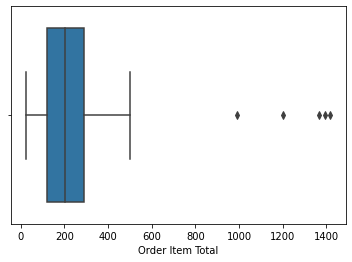

In [3619]:
sns.boxplot(df["Order Item Total"])
plt.show()

### Order Profit Per Order

In [3620]:
df["Order Profit Per Order"].value_counts()

 0.000000     8
 29.740000    5
 72.529999    3
 54.910000    3
 29.400000    3
             ..
 55.799999    1
 15.130000    1
 66.290001    1
-40.459999    1
 91.250000    1
Name: Order Profit Per Order, Length: 914, dtype: int64

In [3621]:
df["Order Profit Per Order"].unique()

array([  91.25      , -249.0899963 , -247.7799988 ,   22.86000061,
        134.2100067 ,   18.57999992,   95.18000031,   68.43000031,
        133.7200012 ,  132.1499939 ,  130.5800018 ,   45.68999863,
         21.76000023,   24.57999992,   16.38999939, -259.5799866 ,
       -246.3600006 ,   23.84000015,  102.2600021 ,   87.18000031,
        154.8600006 ,   82.30000305,   22.37000084,   17.70000076,
         90.27999878,  131.1699982 ,   90.54000092,   82.58999634,
        -17.13999939,   23.64999962,   73.41999817,  113.0699997 ,
        -97.33999634, -425.5799866 ,  152.6000061 ,  151.0299988 ,
         62.27000046,   35.        ,   57.29999924,  143.1600037 ,
        135.6900024 ,  132.6699982 ,  119.7600021 ,   31.47999954,
         86.16999817,    0.        ,  -30.75      , -122.7300034 ,
         33.59999847,   24.69000053,    9.10000038,  -21.75      ,
          6.1500001 ,   22.40999985,   25.23999977,   30.5699997 ,
         46.0699997 , -184.7799988 ,   38.75      ,   -3.65000

In [3622]:
df["Order Profit Per Order"].isna().sum()

0

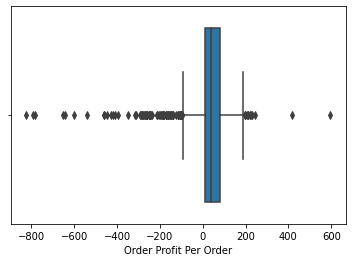

In [3623]:
sns.boxplot(df["Order Profit Per Order"])
plt.show()

### order region

In [3624]:
df['Order Region'].value_counts()

Western Europe     170
Central America     95
Oceania             82
Northern Europe     77
Eastern Asia        73
South Asia          73
Southeast Asia      68
Southern Europe     67
South America       62
West Asia           39
North Africa        38
Eastern Europe      29
West Africa         27
Caribbean           22
East Africa         17
West of USA         14
Central Africa      11
US Center            9
Southern Africa      8
Central Asia         6
East of USA          6
South of  USA        4
Canada               3
Name: Order Region, dtype: int64

In [3625]:
df['Order Region'].isna().sum()

0

### Order State

In [3626]:
df['Order State'].value_counts()

Inglaterra                     62
Isla de Francia                28
Queensland                     26
Nueva Gales del Sur            22
Renania del Norte-Westfalia    21
                               ..
Las Tunas                       1
Osaka                           1
Chauía-Uardiga                  1
Canterbury                      1
Sonora                          1
Name: Order State, Length: 331, dtype: int64

In [3627]:
df['Order State'].isna().sum()

0

### Order Status

In [3628]:
df['Order Status'].value_counts()

COMPLETE           443
PENDING_PAYMENT    156
PROCESSING         150
PENDING            133
SUSPECTED_FRAUD     44
CANCELED            32
ON_HOLD             19
CLOSED              15
PAYMENT_REVIEW       8
Name: Order Status, dtype: int64

In [3629]:
df['Order Status'].isna().sum()

0

### Order Zipcode

In [3630]:
df['Order Zipcode'].value_counts()

28110.0    3
19134.0    2
77041.0    2
94110.0    2
45231.0    2
66212.0    2
10009.0    2
77095.0    2
85234.0    2
98103.0    2
95123.0    1
90008.0    1
93727.0    1
90049.0    1
60126.0    1
47201.0    1
32216.0    1
80219.0    1
60016.0    1
85345.0    1
99301.0    1
94601.0    1
Name: Order Zipcode, dtype: int64

In [3631]:
df['Order Zipcode'].isna().sum()

967

<AxesSubplot:xlabel='Order Zipcode'>

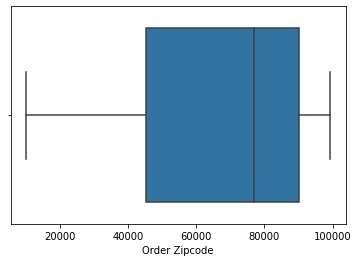

In [3632]:
sns.boxplot(df['Order Zipcode'])

### Product Card Id

In [3633]:
df['Product Card Id'].value_counts()

365     216
403     176
1360    144
502     137
191     110
627      70
1349     13
1352     12
1363      9
282       6
1353      6
565       6
278       5
1357      4
44        4
924       4
818       4
1351      4
905       4
885       4
567       3
917       3
893       3
572       3
116       3
825       3
235       3
1350      3
1347      2
172       2
276       2
273       2
977       2
957       2
564       2
804       2
886       2
359       1
835       1
37        1
926       1
60        1
93        1
906       1
897       1
203       1
251       1
249       1
364       1
828       1
823       1
822       1
821       1
306       1
810       1
642       1
24        1
Name: Product Card Id, dtype: int64

In [3634]:
df['Product Card Id'].isna().sum()

0

<AxesSubplot:xlabel='Product Card Id'>

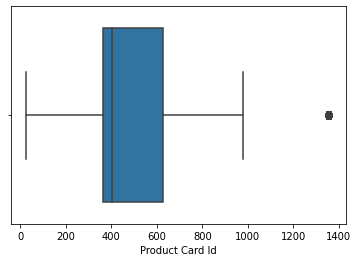

In [3635]:
sns.boxplot(df['Product Card Id'])

### Product Category Id

In [3636]:
df['Product Category Id'].value_counts()

17    217
18    176
73    144
24    137
9     112
29     71
40     15
13     15
26     14
62     13
65     12
37     12
76      9
41      8
66      6
3       5
64      4
70      4
36      3
63      3
11      3
6       3
43      2
44      2
60      2
12      2
5       1
4       1
38      1
10      1
16      1
2       1
Name: Product Category Id, dtype: int64

In [3637]:
df['Product Category Id'].isna().sum()

0

<AxesSubplot:xlabel='Product Category Id'>

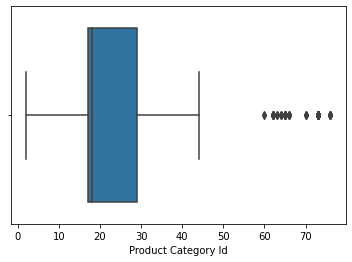

In [3638]:
sns.boxplot(df['Product Category Id'])

### Product Name

In [3639]:
df['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 216
Nike Men's CJ Elite 2 TD Football Cleat          176
Smart watch                                      144
Nike Men's Dri-FIT Victory Golf Polo             137
Nike Men's Free 5.0+ Running Shoe                110
Under Armour Girls' Toddler Spine Surge Runni     70
Web Camera                                        13
Industrial consumer electronics                   12
Summer dresses                                     9
adidas Youth Germany Black/Red Away Match Soc      6
Porcelain crafts                                   6
Under Armour Women's Ignite PIP VI Slide           6
Under Armour Men's Compression EV SL Slide         5
Glove It Urban Brick Golf Towel                    4
Titleist Pro V1x Golf Balls                        4
adidas Men's F10 Messi TRX FG Soccer Cleat         4
Team Golf St. Louis Cardinals Putter Grip          4
Dell Laptop                                        4
Team Golf Texas Longhorns Putter Grip         

In [3640]:
df['Product Name'].isna().sum()

0

### Product Price

In [3641]:
df['Product Price'].value_counts()

59.990002      220
129.990005     176
327.750000     144
50.000000      137
99.989998      111
39.990002       73
24.990000       16
452.040008      13
31.990000       13
252.880005      12
215.820007       9
44.990002        8
461.480011       6
70.000000        6
15.990000        5
30.000000        5
47.990002        5
1500.000000      4
34.990002        4
210.850006       4
25.000000        3
21.990000        3
357.100006       3
19.990000        3
27.990000        2
29.990000        2
59.080002        2
89.989998        2
51.990002        2
299.980011       2
299.989990       1
999.989990       1
54.970001        1
399.989990       1
79.989998        1
Name: Product Price, dtype: int64

In [3642]:
df['Product Price'].isna().sum()

0

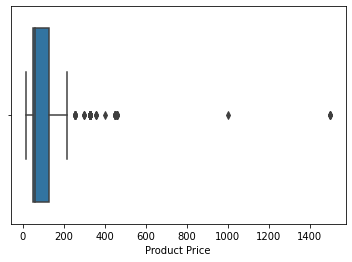

In [3643]:
sns.boxplot(df['Product Price'])
plt.show()

### Product Status

In [3644]:
df['Product Status'].value_counts()

0    1000
Name: Product Status, dtype: int64

In [3645]:
df['Product Status'].isna().sum()

0

<AxesSubplot:xlabel='Product Status'>

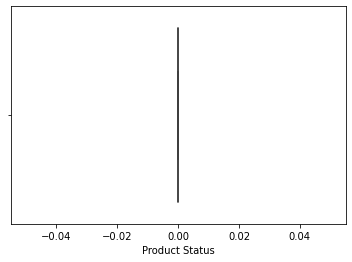

In [3646]:
sns.boxplot(df['Product Status'])

### shipping date (DateOrders)

In [3647]:
df['shipping date (DateOrders)'].value_counts()

1/29/2016 12:14     3
10/7/2017 11:01     3
2/18/2017 14:40     3
6/10/2015 2:13      3
1/5/2017 15:47      3
                   ..
1/13/2018 10:27     1
8/9/2015 8:27       1
10/3/2016 10:19     1
1/17/2018 13:41     1
11/10/2016 17:58    1
Name: shipping date (DateOrders), Length: 891, dtype: int64

In [3648]:
df['shipping date (DateOrders)'].isna().sum()

0

### Shipping Mode

In [3649]:
df['Shipping Mode'].value_counts()

Standard Class    659
Second Class      300
First Class        25
Same Day           16
Name: Shipping Mode, dtype: int64

In [3650]:
df['Shipping Mode'].isna().sum()

0

# Feature Engineering

### Dropping column

In [3651]:
df = df.drop(["Customer Email", "Order Zipcode", "Product Image", "Customer Password", "Product Description"], axis=1)

### Missing Value Imputation

In [3652]:
df["Customer Zipcode"]

0        725.0
1        725.0
2      95125.0
3      90027.0
4        725.0
        ...   
995    92024.0
996    63031.0
997     8753.0
998    96822.0
999    60622.0
Name: Customer Zipcode, Length: 1000, dtype: float64

In [3653]:
df["Customer Zipcode"].isna().sum()

0

In [3654]:
df["Customer Zipcode"].fillna(df["Customer Zipcode"].median(), inplace=True)

# Encoding 

### Type

In [3655]:
df["Type"].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [3656]:
df["Type"].replace({'DEBIT':0, 'TRANSFER':1, 'CASH':2, 'PAYMENT':3}, inplace=True)

In [3657]:
Type_value = {'DEBIT':0, 'TRANSFER':1, 'CASH':2, 'PAYMENT':3}
Type_value

{'DEBIT': 0, 'TRANSFER': 1, 'CASH': 2, 'PAYMENT': 3}

### Delivery Status

In [3658]:
df["Delivery Status"].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [3659]:
df["Delivery Status"].replace({'Advance shipping':0, 'Late delivery':1, 'Shipping on time':2,'Shipping canceled':3}, inplace=True)

In [3660]:
Delivery_Status_value = {'Advance shipping':0, 'Late delivery':1, 'Shipping on time':2,'Shipping canceled':3}
Delivery_Status_value

{'Advance shipping': 0,
 'Late delivery': 1,
 'Shipping on time': 2,
 'Shipping canceled': 3}

### Category Name

In [3661]:
df["Category Name"].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby '], dtype=object)

In [3662]:
encoder = LabelEncoder()

In [3663]:
# encoded_catagory_name = encoder.fit_transform(df['Category Name'])
# df['Category Name'] = encoded_catagory_name
# df[['Category Name']]

In [3664]:
Category_Name_list = df['Category Name'].unique()
Category_Name_list

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby '], dtype=object)

In [3665]:
Category_Name_value = {}
for i in range(len(Category_Name_list)):
    #print(i)
    Category_Name_value.update({Category_Name_list[i]:i})
    
print(Category_Name_value)    

{'Sporting Goods': 0, 'Cleats': 1, 'Shop By Sport': 2, "Women's Apparel": 3, 'Electronics': 4, 'Boxing & MMA': 5, 'Cardio Equipment': 6, 'Trade-In': 7, "Kids' Golf Clubs": 8, 'Hunting & Shooting': 9, 'Baseball & Softball': 10, "Men's Footwear": 11, 'Camping & Hiking': 12, 'Consumer Electronics': 13, 'Cameras ': 14, 'Computers': 15, 'Basketball': 16, 'Soccer': 17, "Girls' Apparel": 18, 'Accessories': 19, "Women's Clothing": 20, 'Crafts': 21, "Men's Clothing": 22, 'Tennis & Racquet': 23, 'Fitness Accessories': 24, 'As Seen on  TV!': 25, 'Golf Balls': 26, 'Strength Training': 27, "Children's Clothing": 28, 'Lacrosse': 29, 'Baby ': 30}


In [3666]:
df['Category Name'].replace({'Sporting Goods': 0, 'Cleats': 1, 'Shop By Sport': 2, 
                             "Women's Apparel": 3, 'Electronics': 4, 'Boxing & MMA': 5, 
                             'Cardio Equipment': 6, 'Trade-In': 7, "Kids' Golf Clubs": 8, 
                    'Hunting & Shooting': 9, 'Baseball & Softball': 10, "Men's Footwear": 11,
                             'Camping & Hiking': 12, 'Consumer Electronics': 13, 'Cameras ': 14,
                             'Computers': 15, 'Basketball': 16, 'Soccer': 17, "Girls' Apparel": 18,
                'Accessories': 19, "Women's Clothing": 20, 'Crafts': 21, "Men's Clothing": 22, 
                             'Tennis & Racquet': 23, 'Fitness Accessories': 24, 
                             'As Seen on  TV!': 25, 'Golf Balls': 26, 'Strength Training': 27, 
                             "Children's Clothing": 28, 'Lacrosse': 29, 'Baby ': 30},inplace = True)
df['Category Name']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Category Name, Length: 1000, dtype: int64

### Customer City

In [3667]:
df["Customer City"].unique()

array(['Caguas', 'San Jose', 'Los Angeles', 'Tonawanda', 'Miami',
       'San Ramon', 'Freeport', 'Salinas', 'Peabody', 'Canovanas',
       'Paramount', 'Mount Prospect', 'Long Beach', 'Rancho Cordova',
       'Billings', 'Wilkes Barre', 'Roseville', 'Bellflower', 'Wheaton',
       'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Panorama City',
       'Atlanta', 'Fremont', 'Rochester', 'Bayamon', 'Guayama',
       'Juana Diaz', 'Fort Washington', 'Bakersfield', 'Corona',
       'Cincinnati', 'Germantown', 'Carrollton', 'Houston', 'Ewa Beach',
       'Lakewood', 'Rome', 'Vista', 'Fort Worth', 'Fond Du Lac',
       'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Honolulu',
       'Oceanside', 'North Tonawanda', 'Clovis', 'Jamaica',
       'Granite City', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York',
       'Aurora', 'Simi Valley', 'Silver Spring', 'Saint Paul',
       'San Antonio', 'Bronx', 'Greenville', 'Morristown', 'San Diego',
       'Oxnard', 'Albuquerque', 'Amarillo', 'Lutz', 'B

In [3668]:
# encoded_customer_city = encoder.fit_transform(df['Customer City'])
# df['Customer City'] = encoded_customer_city
# df[['Customer City']]

In [3669]:
Customer_City_list = df['Customer City'].unique()
Customer_City_list

array(['Caguas', 'San Jose', 'Los Angeles', 'Tonawanda', 'Miami',
       'San Ramon', 'Freeport', 'Salinas', 'Peabody', 'Canovanas',
       'Paramount', 'Mount Prospect', 'Long Beach', 'Rancho Cordova',
       'Billings', 'Wilkes Barre', 'Roseville', 'Bellflower', 'Wheaton',
       'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Panorama City',
       'Atlanta', 'Fremont', 'Rochester', 'Bayamon', 'Guayama',
       'Juana Diaz', 'Fort Washington', 'Bakersfield', 'Corona',
       'Cincinnati', 'Germantown', 'Carrollton', 'Houston', 'Ewa Beach',
       'Lakewood', 'Rome', 'Vista', 'Fort Worth', 'Fond Du Lac',
       'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Honolulu',
       'Oceanside', 'North Tonawanda', 'Clovis', 'Jamaica',
       'Granite City', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York',
       'Aurora', 'Simi Valley', 'Silver Spring', 'Saint Paul',
       'San Antonio', 'Bronx', 'Greenville', 'Morristown', 'San Diego',
       'Oxnard', 'Albuquerque', 'Amarillo', 'Lutz', 'B

In [3670]:
Customer_City_value = {}
for i in range(len(Customer_City_list)):
    #print(i)
    Customer_City_value.update({Customer_City_list[i]:i})
    
print(Customer_City_value)    

{'Caguas': 0, 'San Jose': 1, 'Los Angeles': 2, 'Tonawanda': 3, 'Miami': 4, 'San Ramon': 5, 'Freeport': 6, 'Salinas': 7, 'Peabody': 8, 'Canovanas': 9, 'Paramount': 10, 'Mount Prospect': 11, 'Long Beach': 12, 'Rancho Cordova': 13, 'Billings': 14, 'Wilkes Barre': 15, 'Roseville': 16, 'Bellflower': 17, 'Wheaton': 18, 'Detroit': 19, 'Dallas': 20, 'Carlisle': 21, 'Newark': 22, 'Panorama City': 23, 'Atlanta': 24, 'Fremont': 25, 'Rochester': 26, 'Bayamon': 27, 'Guayama': 28, 'Juana Diaz': 29, 'Fort Washington': 30, 'Bakersfield': 31, 'Corona': 32, 'Cincinnati': 33, 'Germantown': 34, 'Carrollton': 35, 'Houston': 36, 'Ewa Beach': 37, 'Lakewood': 38, 'Rome': 39, 'Vista': 40, 'Fort Worth': 41, 'Fond Du Lac': 42, 'Philadelphia': 43, 'Ontario': 44, 'Oviedo': 45, 'Buffalo': 46, 'Honolulu': 47, 'Oceanside': 48, 'North Tonawanda': 49, 'Clovis': 50, 'Jamaica': 51, 'Granite City': 52, 'Medford': 53, 'Pomona': 54, 'Tempe': 55, 'Santa Ana': 56, 'York': 57, 'Aurora': 58, 'Simi Valley': 59, 'Silver Spring': 

In [3671]:
df["Customer City"].replace({'Caguas': 0, 'San Jose': 1, 'Los Angeles': 2, 'Tonawanda': 3, 
        'Miami': 4, 'San Ramon': 5, 'Freeport': 6, 'Salinas': 7, 'Peabody': 8, 'Canovanas': 9, 
                             'Paramount': 10, 'Mount Prospect': 11, 'Long Beach': 12, 
                             'Rancho Cordova': 13, 'Billings': 14, 'Wilkes Barre': 15, 
                             'Roseville': 16, 'Bellflower': 17, 'Wheaton': 18, 'Detroit': 19, 
                             'Dallas': 20, 'Carlisle': 21, 'Newark': 22, 'Panorama City': 23, 
                             'Atlanta': 24, 'Fremont': 25, 'Rochester': 26, 'Bayamon': 27, 
                             'Guayama': 28, 'Juana Diaz': 29, 'Fort Washington': 30, 
                             'Bakersfield': 31, 'Corona': 32, 'Cincinnati': 33, 'Germantown': 34, 
                             'Carrollton': 35, 'Houston': 36, 'Ewa Beach': 37, 'Lakewood': 38, 
                             'Rome': 39, 'Vista': 40, 'Fort Worth': 41, 'Fond Du Lac': 42,
                             'Philadelphia': 43, 'Ontario': 44, 'Oviedo': 45, 'Buffalo': 46,
                             'Honolulu': 47, 'Oceanside': 48, 'North Tonawanda': 49, 'Clovis': 50,
                             'Jamaica': 51, 'Granite City': 52, 'Medford': 53, 'Pomona': 54, 
                             'Tempe': 55, 'Santa Ana': 56, 'York': 57, 'Aurora': 58, 
                             'Simi Valley': 59, 'Silver Spring': 60, 'Saint Paul': 61,
                             'San Antonio': 62, 'Bronx': 63, 'Greenville': 64, 'Morristown': 65,
                             'San Diego': 66, 'Oxnard': 67, 'Albuquerque': 68, 'Amarillo': 69,
                             'Lutz': 70, 'Bend': 71, 'East Brunswick': 72, 'Lancaster': 73, 
                             'Hampton': 74, 'New York': 75, 'Porterville': 76, 'Portland': 77, 
                             'Strongsville': 78, 'El Paso': 79, 'Del Rio': 80, 'Bountiful': 81,
                             'Kent': 82, 'Chicago': 83, 'Plymouth': 84, 'Far Rockaway': 85, 
                             'Garden Grove': 86, 'Placentia': 87, 'Mentor': 88, 'Santa Clara': 89,
                             'Union': 90, 'Westminster': 91, 'Pompano Beach': 92, 'Azusa': 93, 
                             'Fort Lauderdale': 94, 'Princeton': 95, 'Perth Amboy': 96,
                             'Loveland': 97, 'Virginia Beach': 98, 'Louisville': 99, 
                             'Lockport': 100, 'Staten Island': 101, 'Tucson': 102, 
                             'Cleveland': 103, 'Webster': 104, 'Stockton': 105, 'Martinsburg': 106,
                             'Cumberland': 107, 'Pekin': 108, 'Tallahassee': 109, 
                             'Jacksonville': 110, 'Woonsocket': 111, 'Lithonia': 112, 
                             'Oak Lawn': 113, 'Alhambra': 114, 'New Haven': 115, 'Phoenix': 116, 
                             'Kenner': 117, 'Washington': 118, 'Holland': 119, 'Morrisville': 120,
                             'Memphis': 121, 'Federal Way': 122, 'West Covina': 123, 
                             'Ventura': 124, 'Valrico': 125, 'Kaneohe': 126, 'Brooklyn': 127, 
                             'Lodi': 128, 'Murfreesboro': 129, 'Carlsbad': 130, 'Hamilton': 131,
                             'Hayward': 132, 'Bridgeton': 133, 'Bay Shore': 134, 'Palatine': 135, 
                             'Smyrna': 136, 'Van Nuys': 137, 'Opa Locka': 138, 'Edison': 139, 
                             'Baytown': 140, 'Sylmar': 141, 'Burnsville': 142, 
                             'Huntington Station': 143, 'Sunnyvale': 144, 'Sugar Land': 145, 
                             'Brighton': 146, 'Bismarck': 147, 'Gaithersburg': 148, 'Lilburn': 149,
                             'Provo': 150, 'Columbia': 151, 'Marietta': 152, 'Rio Grande': 153,
                             'Denver': 154, 'Taylor': 155, 'Saint Charles': 156, 'Cupertino': 157,
                             'Springfield': 158, 'Mission Viejo': 159, 'Roswell': 160, 
                             'Ypsilanti': 161, 'Peoria': 162, 'Clementon': 163, 'Antioch': 164,
                             'Salt Lake City': 165, 'Granada Hills': 166, 'Hempstead': 167, 
                             'Astoria': 168, 'Gilroy': 169, 'Lenoir': 170, 'Columbus': 171, 
                             'Albany': 172, 'Humacao': 173, 'Lindenhurst': 174, 'Elyria': 175,
                             'Riverside': 176, 'Carson': 177, 'Mesa': 178, 'San Juan': 179, 'Vega Baja': 180, 'Mayaguez': 181, 'Arecibo': 182, 'San Sebastian': 183, 'Eugene': 184, 'Algonquin': 185, 'Indianapolis': 186, 'Buena Park': 187, 'Catonsville': 188, 'Jersey City': 189, 'Lombard': 190, 'New Bedford': 191, 'Newburgh': 192, 'Lansdale': 193, 'Baltimore': 194, 'Fullerton': 195, 'Sacramento': 196, 'Greensboro': 197, 'Roseburg': 198, 'Modesto': 199, 'Encinitas': 200, 'Watsonville': 201, 'Meridian': 202, 'Endicott': 203, 'Katy': 204, 'Visalia': 205, 'Lompoc': 206, 'Ogden': 207, 'Raleigh': 208, 'Hacienda Heights': 209, 'Union City': 210, 'Hollywood': 211, 'Bolingbrook': 212, 'West Lafayette': 213, 'Woodbridge': 214, 'Weslaco': 215, 'Bell Gardens': 216, 'La Mirada': 217, 'North Bergen': 218, 'Madison': 219, 'South San Francisco': 220, 'North Las Vegas': 221, 'Methuen': 222, 'Costa Mesa': 223, 'Glen Burnie': 224, 'Fairfield': 225, 'Winnetka': 226, 'Mcallen': 227, 'Joliet': 228, 'Brownsville': 229, 'Pawtucket': 230, 'Colorado Springs': 231, 'Quincy': 232, 'Pittsfield': 233, 'Chino': 234, 'Marion': 235, 'North Hills': 236, 'Salina': 237, 'Hyattsville': 238, 'North Richland Hills': 239, 'Spring Valley': 240, 'Lawrence': 241, 'Milpitas': 242, 'Rowland Heights': 243, 'Gardena': 244, 'Cicero': 245, 'Asheboro': 246, 'La Crosse': 247, 'Florissant': 248, 'Canyon Country': 249, 'Ithaca': 250, 'Allentown': 251, 'Escondido': 252, 'Martinez': 253, 'Troy': 254, 'Arlington': 255, 'Davis': 256, 'Chandler': 257, 'Elgin': 258, 'Palmdale': 259, 'Massapequa': 260, 'Pittsburg': 261, 'West New York': 262, 'Orlando': 263, 'Hanover': 264, 'Glendale': 265, 'Enfield': 266, 'Baldwin Park': 267, 'Chino Hills': 268, 'Toms River': 269},inplace = True)
df['Customer City']

0        0
1        0
2        1
3        2
4        0
      ... 
995    200
996    248
997    269
998     47
999     83
Name: Customer City, Length: 1000, dtype: int64

### Customer Country

In [3672]:
df["Customer Country"].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [3673]:
df["Customer Country"].replace({'Puerto Rico':0, 'EE. UU.':1}, inplace=True)

In [3674]:
Customer_Country_value = {'Puerto Rico':0, 'EE. UU.':1}
Customer_Country_value

{'Puerto Rico': 0, 'EE. UU.': 1}

### Customer Fname

In [3675]:
df["Customer Fname"].unique()

array(['Cally', 'Irene', 'Gillian', 'Tana', 'Orli', 'Kimberly',
       'Constance', 'Erica', 'Nichole', 'Oprah', 'Germane', 'Freya',
       'Cassandra', 'Natalie', 'Kimberley', 'Sade', 'Brynne', 'Ciara',
       'Bo', 'Kim', 'Kellie', 'Alma', 'Yeo', 'Lucy', 'Simone', 'Roary',
       'Quail', 'Hannah', 'Evelyn', 'Jael', 'Teagan', 'Joan', 'Basia',
       'Dominique', 'Ainsley', 'Aurora', 'Libby', 'Amy', 'Ivory',
       'Karina', 'Deanna', 'Dacey', 'Adele', 'Sybill', 'Kay', 'Stacy',
       'Marah', 'Taylor', 'Mary', 'Elizabeth', 'Katherine', 'Dennis',
       'Frances', 'Alice', 'Kyle', 'Brenda', 'Frank', 'Johnny', 'Austin',
       'Michael', 'Vincent', 'Gregory', 'Lisa', 'Megan', 'Grace',
       'Douglas', 'Wayne', 'Ronald', 'Tammy', 'Christina', 'Alexander',
       'Sandra', 'Ruth', 'Lauren', 'Melissa', 'Maria', 'Eugene', 'James',
       'John', 'Roy', 'Janet', 'Nicole', 'Sharon', 'Matthew', 'Anthony',
       'Jerry', 'Laura', 'Jack', 'Kirestin', 'Nora', 'Jennifer',
       'Madonna', 'Noe

In [3676]:
# encoded_customer_fname = encoder.fit_transform(df['Customer Fname'])
# df['Customer Fname'] = encoded_customer_fname
# df[['Customer Fname']]

In [3677]:
Customer_Fname_list = df['Customer Fname'].unique()
Customer_Fname_list

array(['Cally', 'Irene', 'Gillian', 'Tana', 'Orli', 'Kimberly',
       'Constance', 'Erica', 'Nichole', 'Oprah', 'Germane', 'Freya',
       'Cassandra', 'Natalie', 'Kimberley', 'Sade', 'Brynne', 'Ciara',
       'Bo', 'Kim', 'Kellie', 'Alma', 'Yeo', 'Lucy', 'Simone', 'Roary',
       'Quail', 'Hannah', 'Evelyn', 'Jael', 'Teagan', 'Joan', 'Basia',
       'Dominique', 'Ainsley', 'Aurora', 'Libby', 'Amy', 'Ivory',
       'Karina', 'Deanna', 'Dacey', 'Adele', 'Sybill', 'Kay', 'Stacy',
       'Marah', 'Taylor', 'Mary', 'Elizabeth', 'Katherine', 'Dennis',
       'Frances', 'Alice', 'Kyle', 'Brenda', 'Frank', 'Johnny', 'Austin',
       'Michael', 'Vincent', 'Gregory', 'Lisa', 'Megan', 'Grace',
       'Douglas', 'Wayne', 'Ronald', 'Tammy', 'Christina', 'Alexander',
       'Sandra', 'Ruth', 'Lauren', 'Melissa', 'Maria', 'Eugene', 'James',
       'John', 'Roy', 'Janet', 'Nicole', 'Sharon', 'Matthew', 'Anthony',
       'Jerry', 'Laura', 'Jack', 'Kirestin', 'Nora', 'Jennifer',
       'Madonna', 'Noe

In [3678]:
Customer_Fname_value = {}
for i in range(len(Customer_Fname_list)):
    #print(i)
    Customer_Fname_value.update({Customer_Fname_list[i]:i})
    
print(Customer_Fname_value)    

{'Cally': 0, 'Irene': 1, 'Gillian': 2, 'Tana': 3, 'Orli': 4, 'Kimberly': 5, 'Constance': 6, 'Erica': 7, 'Nichole': 8, 'Oprah': 9, 'Germane': 10, 'Freya': 11, 'Cassandra': 12, 'Natalie': 13, 'Kimberley': 14, 'Sade': 15, 'Brynne': 16, 'Ciara': 17, 'Bo': 18, 'Kim': 19, 'Kellie': 20, 'Alma': 21, 'Yeo': 22, 'Lucy': 23, 'Simone': 24, 'Roary': 25, 'Quail': 26, 'Hannah': 27, 'Evelyn': 28, 'Jael': 29, 'Teagan': 30, 'Joan': 31, 'Basia': 32, 'Dominique': 33, 'Ainsley': 34, 'Aurora': 35, 'Libby': 36, 'Amy': 37, 'Ivory': 38, 'Karina': 39, 'Deanna': 40, 'Dacey': 41, 'Adele': 42, 'Sybill': 43, 'Kay': 44, 'Stacy': 45, 'Marah': 46, 'Taylor': 47, 'Mary': 48, 'Elizabeth': 49, 'Katherine': 50, 'Dennis': 51, 'Frances': 52, 'Alice': 53, 'Kyle': 54, 'Brenda': 55, 'Frank': 56, 'Johnny': 57, 'Austin': 58, 'Michael': 59, 'Vincent': 60, 'Gregory': 61, 'Lisa': 62, 'Megan': 63, 'Grace': 64, 'Douglas': 65, 'Wayne': 66, 'Ronald': 67, 'Tammy': 68, 'Christina': 69, 'Alexander': 70, 'Sandra': 71, 'Ruth': 72, 'Lauren': 

In [3679]:
df['Customer Fname'].replace({'Cally': 0, 'Irene': 1, 'Gillian': 2, 'Tana': 3, 'Orli': 4, 'Kimberly': 5, 'Constance': 6, 'Erica': 7, 'Nichole': 8, 'Oprah': 9, 'Germane': 10, 'Freya': 11, 'Cassandra': 12, 'Natalie': 13, 'Kimberley': 14, 'Sade': 15, 'Brynne': 16, 'Ciara': 17, 'Bo': 18, 'Kim': 19, 'Kellie': 20, 'Alma': 21, 'Yeo': 22, 'Lucy': 23, 'Simone': 24, 'Roary': 25, 'Quail': 26, 'Hannah': 27, 'Evelyn': 28, 'Jael': 29, 'Teagan': 30, 'Joan': 31, 'Basia': 32, 'Dominique': 33, 'Ainsley': 34, 'Aurora': 35, 'Libby': 36, 'Amy': 37, 'Ivory': 38, 'Karina': 39, 'Deanna': 40, 'Dacey': 41, 'Adele': 42, 'Sybill': 43, 'Kay': 44, 'Stacy': 45, 'Marah': 46, 'Taylor': 47, 'Mary': 48, 'Elizabeth': 49, 'Katherine': 50, 'Dennis': 51, 'Frances': 52, 'Alice': 53, 'Kyle': 54, 'Brenda': 55, 'Frank': 56, 'Johnny': 57, 'Austin': 58, 'Michael': 59, 'Vincent': 60, 'Gregory': 61, 'Lisa': 62, 'Megan': 63, 'Grace': 64, 'Douglas': 65, 'Wayne': 66, 'Ronald': 67, 'Tammy': 68, 'Christina': 69, 'Alexander': 70, 'Sandra': 71, 'Ruth': 72, 'Lauren': 73, 'Melissa': 74, 'Maria': 75, 'Eugene': 76, 'James': 77, 'John': 78, 'Roy': 79, 'Janet': 80, 'Nicole': 81, 'Sharon': 82, 'Matthew': 83, 'Anthony': 84, 'Jerry': 85, 'Laura': 86, 'Jack': 87, 'Kirestin': 88, 'Nora': 89, 'Jennifer': 90, 'Madonna': 91, 'Noelani': 92, 'Sydnee': 93, 'Willa': 94, 'Ila': 95, 'Belle': 96, 'Alyssa': 97, 'Lani': 98, 'Demetria': 99, 'Gay': 100, 'Audrey': 101, 'Riley': 102, 'Imani': 103, 'Mechelle': 104, 'Whitney': 105, 'Roanna': 106, 'Vivian': 107, 'Xantha': 108, 'Zia': 109, 'Mara': 110, 'Sloane': 111, 'Winifred': 112, 'Giselle': 113, 'Nancy': 114, 'David': 115, 'Patricia': 116, 'Julie': 117, 'Tyler': 118, 'Karen': 119, 'Shawn': 120, 'Willie': 121, 'Bruce': 122, 'Mark': 123, 'Paul': 124, 'Walter': 125, 'Joyce': 126, 'Daniel': 127, 'Pamela': 128, 'Betty': 129, 'Christian': 130, 'Tiffany': 131, 'Stephen': 132, 'George': 133, 'Samuel': 134, 'Larry': 135, 'Peter': 136, 'Diana': 137, 'Theresa': 138, 'Cynthia': 139, 'Sean': 140, 'Jonathan': 141, 'Christopher': 142, 'Donald': 143, 'Rana': 144, 'William': 145, 'Rachel': 146, 'Dorothy': 147, 'Robert': 148, 'Andrea': 149, 'Martha': 150, 'Carolyn': 151, 'Lynn': 152, 'Julia': 153, 'Patience': 154, 'Cheryl': 155, 'Timothy': 156, 'Aimee': 157, 'Virginia': 158, 'Jessica': 159, 'Margaret': 160, 'Richard': 161, 'Deborah': 162, 'Emma': 163, 'Adam': 164, 'Sarah': 165, 'Edward': 166, 'Harry': 167, 'Charles': 168, 'Debra': 169, 'Doris': 170, 'Benjamin': 171, 'Stephanie': 172, 'Nicholas': 173, 'Joseph': 174, 'Diane': 175, 'Andrew': 176, 'Roger': 177, 'Danielle': 178, 'Patrick': 179, 'Brandon': 180, 'Jacqueline': 181, 'Kathy': 182, 'Rebecca': 183, 'Jeremy': 184, 'Amanda': 185, 'Felicia': 186, 'Wanda': 187, 'Hayfa': 188, 'Lavinia': 189, 'Yetta': 190, 'Cleo': 191, 'Wynter': 192, 'Hyacinth': 193, 'Xerxes': 194, 'Noel': 195, 'Maryam': 196, 'Naida': 197, 'Lana': 198, 'Rylee': 199, 'Dakota': 200, 'Fallon': 201, 'Kylynn': 202, 'Inez': 203, 'Miriam': 204, 'Chloe': 205, 'Beverly': 206, 'Madeline': 207, 'Yoshi': 208, 'Hadley': 209, 'Renee': 210, 'Iola': 211, 'Tamekah': 212, 'Cherokee': 213, 'Odessa': 214, 'Rose': 215, 'Linda': 216, 'May': 217, 'Lilah': 218, 'Emi': 219, 'Myra': 220, 'Medge': 221, 'Beatrice': 222, 'Ria': 223, 'Charity': 224, 'Nell': 225, 'Tamara': 226, 'Phyllis': 227, 'Nelle': 228, 'Blossom': 229, 'Breanna': 230, 'Katelyn': 231, 'Karly': 232, 'Olga': 233, 'Brenna': 234, 'Tatyana': 235, 'Ifeoma': 236, 'Kitra': 237, 'Summer': 238, 'Sopoline': 239, 'Eliana': 240, 'Denise': 241, 'Hermione': 242, 'Lara': 243, 'Hedy': 244, 'Violet': 245, 'Clare': 246, 'Rhonda': 247, 'Morgan': 248, 'Illiana': 249, 'Amity': 250, 'Jayme': 251, 'Geraldine': 252, 'Anika': 253, 'Dana': 254, 'Sybil': 255, 'Genevieve': 256, 'Tara': 257, 'Ella': 258, 'Heather': 259, 'Brittany': 260, 'Lori': 261, 'Billy': 262, 'Terry': 263, 'Lawrence': 264, 'Aaron': 265, 'Madison': 266, 'Jane': 267, 'Jordan': 268, 'Kevin': 269, 'Octavia': 270, 'Emily': 271, 'Kelsie': 272, 'Marie': 273, 'Judy': 274, 'Kenneth': 275, 'Jaime': 276, 'Justin': 277, 'Harold': 278, 'Ryan': 279, 'Kelly': 280, 'Carl': 281, 'Teresa': 282, 'Nathan': 283, 'Jason': 284, 'Steven': 285, 'Judith': 286, 'Sara': 287, 'Marilyn': 288, 'Kathryn': 289, 'Ralph': 290, 'Amber': 291, 'Donna': 292, 'Scott': 293, 'Thomas': 294, 'Catherine': 295, 'Barbara': 296, 'Joshua': 297, 'Susan': 298, 'Zachary': 299, 'Janice': 300, 'Crystal': 301, 'Michelle': 302, 'Henry': 303, 'Anna': 304, 'Ann': 305, 'Jesse': 306, 'Raymond': 307, 'Audra': 308, 'Cora': 309, 'Hillary': 310, 'Bryan': 311, 'Gloria': 312, 'Louis': 313, 'Shirley': 314, 'Martina': 315, 'Delilah': 316, 'Jacob': 317, 'Brian': 318, 'Victoria': 319, 'Jeffrey': 320, 'Helen': 321},inplace = True)

df['Customer Fname']

0        0
1        1
2        2
3        3
4        4
      ... 
995    279
996     48
997     48
998    185
999     37
Name: Customer Fname, Length: 1000, dtype: int64

### 14 Customer Id

In [3680]:
q1 = df['Customer Id'].quantile(0.25)
q2 = df['Customer Id'].quantile(0.50)
q3 = df['Customer Id'].quantile(0.75)

iqr =  q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)

print("upper_tail ---->",upper_tail)
print("lower_tail ----->",lower_tail)
print("Median --->",df['Customer Id'].median())
print("Mean --->",df['Customer Id'].mean())

Q1 : 3941.5
Q2 : 7795.0
Q3 : 11632.0
upper_tail ----> 23167.75
lower_tail -----> -7594.25
Median ---> 7795.0
Mean ---> 8615.285


In [3681]:
df['Customer Id'].loc[df['Customer Id'] > upper_tail]

Series([], Name: Customer Id, dtype: int64)

In [3682]:
df['Customer Id'].loc[df['Customer Id'] > upper_tail] = upper_tail

In [3683]:
df['Customer Id'].loc[df['Customer Id'] > upper_tail]

Series([], Name: Customer Id, dtype: float64)

<AxesSubplot:>

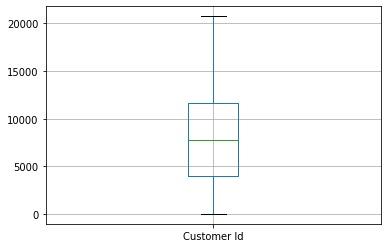

In [3684]:
df[['Customer Id']].boxplot()

### 15 Customer Lname

In [3685]:
df['Customer Lname'].isna().sum()

0

In [3686]:
df['Customer Lname'].mode()[0]

'Smith'

In [3687]:
df['Customer Lname'].fillna(df['Customer Lname'].mode()[0],inplace = True)

In [3688]:
df['Customer Lname'].isna().sum()

0

In [3689]:
# encoded_customer_lname = encoder.fit_transform(df['Customer Lname'])
# df['Customer Lname'] = encoded_customer_lname
# df[['Customer Lname']]

In [3690]:
Customer_Lname_list = df['Customer Lname'].unique()
Customer_Lname_list

array(['Holloway', 'Luna', 'Maldonado', 'Tate', 'Hendricks', 'Flowers',
       'Terrell', 'Stevens', 'Olsen', 'Delacruz', 'Short', 'Robbins',
       'Jensen', 'Mcfadden', 'Sharpe', 'Lancaster', 'Giles', 'Bird',
       'Griffin', 'Simon', 'Farmer', 'Conley', 'Mcknight', 'Vance',
       'Wheeler', 'Ashley', 'Velez', 'Kelly', 'Mcfarland', 'Romero',
       'Wilder', 'Watts', 'Rogers', 'Mathis', 'Sharp', 'Bray', 'Lindsay',
       'Parks', 'Prince', 'Goff', 'Walters', 'Pennington', 'Spencer',
       'Sandoval', 'Mckinney', 'Lara', 'Wood', 'Frank', 'Smith',
       'Pittman', 'Tyler', 'Hill', 'Thomas', 'Jordan', 'Livingston',
       'Nelson', 'Sexton', 'Scott', 'Olson', 'Krueger', 'Rodriguez',
       'Todd', 'Sanchez', 'Meyer', 'Vega', 'Hodges', 'Mccormick',
       'Blackwell', 'Rios', 'Harvey', 'Farrell', 'Harris', 'Coleman',
       'Hayes', 'Day', 'Dawson', 'Phillips', 'Mack', 'Evans', 'Lawson',
       'Stokes', 'Flores', 'Austin', 'Oconnell', 'Carlson', 'Navarro',
       'Bush', 'Young', 'F

In [3691]:
Customer_Lname_value = {}
for i in range(len(Customer_Lname_list)):
    #print(i)
    Customer_Lname_value.update({Customer_Lname_list[i]:i})
    
print(Customer_Lname_value)    

{'Holloway': 0, 'Luna': 1, 'Maldonado': 2, 'Tate': 3, 'Hendricks': 4, 'Flowers': 5, 'Terrell': 6, 'Stevens': 7, 'Olsen': 8, 'Delacruz': 9, 'Short': 10, 'Robbins': 11, 'Jensen': 12, 'Mcfadden': 13, 'Sharpe': 14, 'Lancaster': 15, 'Giles': 16, 'Bird': 17, 'Griffin': 18, 'Simon': 19, 'Farmer': 20, 'Conley': 21, 'Mcknight': 22, 'Vance': 23, 'Wheeler': 24, 'Ashley': 25, 'Velez': 26, 'Kelly': 27, 'Mcfarland': 28, 'Romero': 29, 'Wilder': 30, 'Watts': 31, 'Rogers': 32, 'Mathis': 33, 'Sharp': 34, 'Bray': 35, 'Lindsay': 36, 'Parks': 37, 'Prince': 38, 'Goff': 39, 'Walters': 40, 'Pennington': 41, 'Spencer': 42, 'Sandoval': 43, 'Mckinney': 44, 'Lara': 45, 'Wood': 46, 'Frank': 47, 'Smith': 48, 'Pittman': 49, 'Tyler': 50, 'Hill': 51, 'Thomas': 52, 'Jordan': 53, 'Livingston': 54, 'Nelson': 55, 'Sexton': 56, 'Scott': 57, 'Olson': 58, 'Krueger': 59, 'Rodriguez': 60, 'Todd': 61, 'Sanchez': 62, 'Meyer': 63, 'Vega': 64, 'Hodges': 65, 'Mccormick': 66, 'Blackwell': 67, 'Rios': 68, 'Harvey': 69, 'Farrell': 70,

In [3692]:
df['Customer Lname'].replace({'Holloway': 0, 'Luna': 1, 'Maldonado': 2, 'Tate': 3, 'Hendricks': 4, 'Flowers': 5, 'Terrell': 6, 'Stevens': 7, 'Olsen': 8, 'Delacruz': 9, 'Short': 10, 'Robbins': 11, 'Jensen': 12, 'Mcfadden': 13, 'Sharpe': 14, 'Lancaster': 15, 'Giles': 16, 'Bird': 17, 'Griffin': 18, 'Simon': 19, 'Farmer': 20, 'Conley': 21, 'Mcknight': 22, 'Vance': 23, 'Wheeler': 24, 'Ashley': 25, 'Velez': 26, 'Kelly': 27, 'Mcfarland': 28, 'Romero': 29, 'Wilder': 30, 'Watts': 31, 'Rogers': 32, 'Mathis': 33, 'Sharp': 34, 'Bray': 35, 'Lindsay': 36, 'Parks': 37, 'Prince': 38, 'Goff': 39, 'Walters': 40, 'Pennington': 41, 'Spencer': 42, 'Sandoval': 43, 'Mckinney': 44, 'Lara': 45, 'Wood': 46, 'Frank': 47, 'Smith': 48, 'Pittman': 49, 'Tyler': 50, 'Hill': 51, 'Thomas': 52, 'Jordan': 53, 'Livingston': 54, 'Nelson': 55, 'Sexton': 56, 'Scott': 57, 'Olson': 58, 'Krueger': 59, 'Rodriguez': 60, 'Todd': 61, 'Sanchez': 62, 'Meyer': 63, 'Vega': 64, 'Hodges': 65, 'Mccormick': 66, 'Blackwell': 67, 'Rios': 68, 'Harvey': 69, 'Farrell': 70, 'Harris': 71, 'Coleman': 72, 'Hayes': 73, 'Day': 74, 'Dawson': 75, 'Phillips': 76, 'Mack': 77, 'Evans': 78, 'Lawson': 79, 'Stokes': 80, 'Flores': 81, 'Austin': 82, 'Oconnell': 83, 'Carlson': 84, 'Navarro': 85, 'Bush': 86, 'Young': 87, 'Freeman': 88, 'Bennett': 89, 'Sanders': 90, 'Black': 91, 'Hatfield': 92, 'Barr': 93, 'Downs': 94, 'Ingram': 95, 'Hyde': 96, 'Nolan': 97, 'Potter': 98, 'Delgado': 99, 'Knight': 100, 'Booker': 101, 'Contreras': 102, 'Nash': 103, 'Jarvis': 104, 'Nixon': 105, 'Harper': 106, 'Acosta': 107, 'Jones': 108, 'Parker': 109, 'Castaneda': 110, 'Henderson': 111, 'Martin': 112, 'Hays': 113, 'Brock': 114, 'Davis': 115, 'Duffy': 116, 'Long': 117, 'Alexander': 118, 'Buckley': 119, 'Curry': 120, 'Crawford': 121, 'Guerra': 122, 'Padilla': 123, 'Petersen': 124, 'Silva': 125, 'Chan': 126, 'Brooks': 127, 'Williams': 128, 'Ramirez': 129, 'Patton': 130, 'Chavez': 131, 'Lynn': 132, 'Michael': 133, 'Ortega': 134, 'Grimes': 135, 'Summers': 136, 'Caldwell': 137, 'Garcia': 138, 'Lee': 139, 'Middleton': 140, 'King': 141, 'Richards': 142, 'Castillo': 143, 'Camacho': 144, 'Leach': 145, 'Pearson': 146, 'Chung': 147, 'Richmond': 148, 'Price': 149, 'Moreno': 150, 'Cochran': 151, 'Frye': 152, 'Gilmore': 153, 'Webster': 154, 'Johnson': 155, 'Pierce': 156, 'Riddle': 157, 'Golden': 158, 'Lawrence': 159, 'Shea': 160, 'Gilbert': 161, 'Sweeney': 162, 'Robinson': 163, 'Ward': 164, 'Koch': 165, 'Collins': 166, 'Curtis': 167, 'Moses': 168, 'Ramos': 169, 'Yoder': 170, 'Chapman': 171, 'Rose': 172, 'Lang': 173, 'Anthony': 174, 'Russell': 175, 'Carey': 176, 'Reynolds': 177, 'Decker': 178, 'Butler': 179, 'Case': 180, 'Murray': 181, 'Matthews': 182, 'Roach': 183, 'Whitehead': 184, 'Burns': 185, 'Palmer': 186, 'Mullins': 187, 'Browning': 188, 'Kim': 189, 'Rivera': 190, 'Pope': 191, 'Wilson': 192, 'Walker': 193, 'Stout': 194, 'Morrow': 195, 'Carter': 196, 'Rodgers': 197, 'Murphy': 198, 'Brown': 199, 'James': 200, 'Wu': 201, 'Weaver': 202, 'Hunter': 203, 'Foster': 204, 'Huffman': 205, 'Reid': 206, 'Holmes': 207, 'Marquez': 208, 'Dorsey': 209, 'Mann': 210, 'Erickson': 211, 'Williamson': 212, 'Gallegos': 213, 'Clark': 214, 'Sanford': 215, 'Boyle': 216, 'Houston': 217, 'Mcneil': 218, 'Woodward': 219, 'Dunn': 220, 'Gay': 221, 'Mayo': 222, 'Grant': 223, 'Small': 224, 'Green': 225, 'Garrett': 226, 'Donovan': 227, 'Zimmerman': 228, 'Fleming': 229, 'Davenport': 230, 'Rush': 231, 'Pickett': 232, 'Fisher': 233, 'Wooten': 234, 'Shelton': 235, 'Morales': 236, 'Blair': 237, 'Cherry': 238, 'Haley': 239, 'Kennedy': 240, 'Franklin': 241, 'Mitchell': 242, 'Albert': 243, 'Manning': 244, 'Nichols': 245, 'Holt': 246, 'Garrison': 247, 'Larson': 248, 'Higgins': 249, 'Shaffer': 250, 'Daugherty': 251, 'Morrison': 252, 'Key': 253, 'Porter': 254, 'Stein': 255, 'Wyatt': 256, 'Tyson': 257, 'Howard': 258, 'Hester': 259, 'Hood': 260, 'Suarez': 261, 'Santos': 262, 'Melton': 263, 'Aguilar': 264, 'Jenkins': 265, 'Marsh': 266, 'Bruce': 267, 'Jimenez': 268, 'Mcpherson': 269, 'Hickman': 270, 'Weber': 271, 'Hoffman': 272, 'Noel': 273, 'Joyce': 274, 'Gordon': 275, 'Armstrong': 276, 'Barlow': 277, 'Huff': 278, 'Mcmahon': 279, 'Glass': 280, 'Fowler': 281, 'Rocha': 282, 'Gardner': 283, 'Perez': 284, 'West': 285, 'Macdonald': 286, 'Saunders': 287, 'Fuller': 288, 'Anderson': 289, 'Trujillo': 290, 'Mclaughlin': 291, 'Blackburn': 292, 'Bowman': 293, 'Garza': 294, 'Cruz': 295, 'Montoya': 296, 'Simmons': 297, 'Morgan': 298, 'Hughes': 299, 'Carroll': 300, 'Deleon': 301, 'Bryan': 302, 'Tanner': 303, 'Medina': 304, 'Myers': 305, 'French': 306, 'Frazier': 307, 'Jacobs': 308, 'Webb': 309, 'Martinez': 310, 'Pena': 311, 'Horton': 312, 'Coffey': 313, 'Stone': 314, 'Calderon': 315, 'Levy': 316, 'Clay': 317, 'Warren': 318, 'Chang': 319, 'Hammond': 320, 'Mahoney': 321, 'Maddox': 322, 'Haas': 323, 'Johnston': 324, 'Miller': 325, 'Osborne': 326, 'Mejia': 327, 'Soto': 328, 'Singh': 329, 'Peters': 330, 'Nielsen': 331, 'Sims': 332, 'Colon': 333, 'Bates': 334, 'Mccoy': 335, 'Lopez': 336, 'Pham': 337, 'Mcgrath': 338, 'Mcdonald': 339, 'Juarez': 340, 'Copeland': 341, 'Berg': 342, 'Wolf': 343, 'Riley': 344, 'Benjamin': 345, 'Vincent': 346, 'Beard': 347, 'Warner': 348, 'Brady': 349, 'Moore': 350, 'Jennings': 351, 'Campos': 352, 'Pugh': 353, 'Taylor': 354, 'Villa': 355, 'Gallagher': 356, 'Goodwin': 357, 'Douglas': 358, 'Blake': 359, 'Roy': 360, 'Hurst': 361, 'Townsend': 362, 'Shah': 363, 'Strong': 364, 'Wallace': 365, 'Adams': 366, 'Atkinson': 367, 'Meadows': 368, 'Sampson': 369, 'Fuentes': 370, 'Franco': 371, 'Bailey': 372, 'Arnold': 373, 'Whitney': 374, 'Rangel': 375, 'Shepherd': 376, 'Diaz': 377, 'Barnett': 378, 'Beck': 379, 'Dalton': 380, 'Buchanan': 381, 'Henry': 382, 'Wilkins': 383, 'Alvarado': 384, 'Bolton': 385, 'Cotton': 386, 'Atkins': 387, 'Mcdaniel': 388, 'Roman': 389, 'Stevenson': 390, 'Schroeder': 391, 'Callahan': 392, 'Justice': 393, 'Cunningham': 394, 'Dyer': 395, 'Hernandez': 396, 'Poole': 397, 'Bauer': 398, 'Bridges': 399, 'Church': 400, 'Schmidt': 401, 'Valenzuela': 402, 'Salas': 403, 'Vasquez': 404, 'Combs': 405, 'Figueroa': 406, 'Mercer': 407, 'Pitts': 408, 'Kramer': 409, 'Garner': 410, 'Guerrero': 411, 'Roberts': 412, 'Cole': 413, 'Friedman': 414, 'Hancock': 415, 'Ryan': 416, 'Shannon': 417, 'Powell': 418, 'Andrews': 419, 'Roth': 420, 'Fischer': 421, 'Ortiz': 422, 'Kent': 423, 'Moody': 424, 'Rivas': 425, 'Patterson': 426, 'Kidd': 427, 'Rhodes': 428, 'Harrison': 429, 'Ellis': 430, 'Cooper': 431, 'Estes': 432},inplace = True)

df['Customer Lname']

0        0
1        1
2        2
3        3
4        4
      ... 
995     48
996     23
997    431
998    432
999    155
Name: Customer Lname, Length: 1000, dtype: int64

### 16 Customer Segment

In [3693]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [3694]:
df['Customer Segment'].replace({'Consumer':0, 'Home Office':1, 'Corporate':2},inplace = True)

In [3695]:
df['Customer Segment'].unique()

array([0, 1, 2], dtype=int64)

In [3696]:
Customer_Segment_values = {'Consumer':0, 'Home Office':1, 'Corporate':2}
Customer_Segment_values

{'Consumer': 0, 'Home Office': 1, 'Corporate': 2}

### 17 Customer State

In [3697]:
df['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS'], dtype=object)

In [3698]:
df['Customer State'].replace({'PR':0, 'CA':1, 'NY':2, 'FL':3, 'MA':4, 'IL':5, 'MT':6, 'PA':7,
                'MI':8, 'TX':9, 'DE':10, 'GA':11, 'MD':12, 'OH':13, 'HI':14, 'NJ':15,
                'WI':16, 'AZ':17, 'CO':18, 'MN':19, 'NC':20, 'NM':21,'OR':22, 'SC':23, 'VA':24, 
                'UT':25, 'WA':26, 'KY':27, 'WV':28, 'RI':29, 'CT':30, 'LA':31,'TN':32,'DC':33, 
                'ND':34, 'MO':35, 'IN':36, 'ID':37, 'NV':38, 'KS':39, 'AR':40, 'OK':41, 'AL':42,
                              'IA':43,'95758':44, '91732':45},inplace = True)

In [3699]:
Customer_State_values = {'PR':0, 'CA':1, 'NY':2, 'FL':3, 'MA':4, 'IL':5, 'MT':6, 'PA':7,
                'MI':8, 'TX':9, 'DE':10, 'GA':11, 'MD':12, 'OH':13, 'HI':14, 'NJ':15,
                'WI':16, 'AZ':17, 'CO':18, 'MN':19, 'NC':20, 'NM':21,'OR':22, 'SC':23, 'VA':24, 
                'UT':25, 'WA':26, 'KY':27, 'WV':28, 'RI':29, 'CT':30, 'LA':31,'TN':32,'DC':33, 
                'ND':34, 'MO':35, 'IN':36, 'ID':37, 'NV':38, 'KS':39, 'AR':40, 'OK':41, 'AL':42,
                              'IA':43,'95758':44, '91732':45}

Customer_State_values

{'PR': 0,
 'CA': 1,
 'NY': 2,
 'FL': 3,
 'MA': 4,
 'IL': 5,
 'MT': 6,
 'PA': 7,
 'MI': 8,
 'TX': 9,
 'DE': 10,
 'GA': 11,
 'MD': 12,
 'OH': 13,
 'HI': 14,
 'NJ': 15,
 'WI': 16,
 'AZ': 17,
 'CO': 18,
 'MN': 19,
 'NC': 20,
 'NM': 21,
 'OR': 22,
 'SC': 23,
 'VA': 24,
 'UT': 25,
 'WA': 26,
 'KY': 27,
 'WV': 28,
 'RI': 29,
 'CT': 30,
 'LA': 31,
 'TN': 32,
 'DC': 33,
 'ND': 34,
 'MO': 35,
 'IN': 36,
 'ID': 37,
 'NV': 38,
 'KS': 39,
 'AR': 40,
 'OK': 41,
 'AL': 42,
 'IA': 43,
 '95758': 44,
 '91732': 45}

### Customer Street

In [3700]:
df['Customer Street']

0      5365 Noble Nectar Island
1              2679 Rustic Loop
2          8510 Round Bear Gate
3               3200 Amber Bend
4      8671 Iron Anchor Corners
                 ...           
995             5042 Cozy Acres
996           4466 Little Grove
997      112 Green Fawn Estates
998         9254 Thunder Meadow
999     2058 Quaking Oak Common
Name: Customer Street, Length: 1000, dtype: object

In [3701]:
# encoded_customer_street = encoder.fit_transform(df['Customer Street'])
# df['Customer Street'] = encoded_customer_street
# df[['Customer Street']]

In [3702]:
Customer_Street_list = df['Customer Street'].unique()
Customer_Street_list

array(['5365 Noble Nectar Island', '2679 Rustic Loop',
       '8510 Round Bear Gate', '3200 Amber Bend',
       '8671 Iron Anchor Corners', '2122 Hazy Corner',
       '1879 Green Pine Bank', '7595 Cotton Log Row', '2051 Dusty Route',
       '9139 Blue Blossom Court', '4058 Quiet Heights',
       '3243 Shady Corner', '131 Sunny Treasure Green',
       '2531 Wishing Square', '6417 Silver Towers', '257 Harvest Close',
       '7342 Hazy Beacon Park', '7787 Lazy Corners',
       '5136 Rustic Pioneer Estates', '1723 Tawny Via',
       '7111 Silent Fox Gardens', '3732 Old Mountain Bank',
       '6217 Rustic Lake Forest', '1082 Quiet Treasure Link',
       '3176 Round Gate', '1426 Fallen Line',
       '9814 Emerald Prairie Limits', '8271 Tawny Elk Abbey',
       '3931 Gentle Ramp', '9699 Honey Rise', '1564 Rocky Terrace',
       '4294 High Passage', '5918 Golden Beacon Freeway',
       '3915 Broad Lookout', '7190 Silver Horse Glade',
       '830 Broad Beacon Maze', '6127 Dewy Goose Downs', '11

In [3703]:
Customer_Street_value = {}
for i in range(len(Customer_Street_list)):
    #print(i)
    Customer_Street_value.update({Customer_Street_list[i]:i})
    
print(Customer_Street_value)    

{'5365 Noble Nectar Island': 0, '2679 Rustic Loop': 1, '8510 Round Bear Gate': 2, '3200 Amber Bend': 3, '8671 Iron Anchor Corners': 4, '2122 Hazy Corner': 5, '1879 Green Pine Bank': 6, '7595 Cotton Log Row': 7, '2051 Dusty Route': 8, '9139 Blue Blossom Court': 9, '4058 Quiet Heights': 10, '3243 Shady Corner': 11, '131 Sunny Treasure Green': 12, '2531 Wishing Square': 13, '6417 Silver Towers': 14, '257 Harvest Close': 15, '7342 Hazy Beacon Park': 16, '7787 Lazy Corners': 17, '5136 Rustic Pioneer Estates': 18, '1723 Tawny Via': 19, '7111 Silent Fox Gardens': 20, '3732 Old Mountain Bank': 21, '6217 Rustic Lake Forest': 22, '1082 Quiet Treasure Link': 23, '3176 Round Gate': 24, '1426 Fallen Line': 25, '9814 Emerald Prairie Limits': 26, '8271 Tawny Elk Abbey': 27, '3931 Gentle Ramp': 28, '9699 Honey Rise': 29, '1564 Rocky Terrace': 30, '4294 High Passage': 31, '5918 Golden Beacon Freeway': 32, '3915 Broad Lookout': 33, '7190 Silver Horse Glade': 34, '830 Broad Beacon Maze': 35, '6127 Dewy G

In [3704]:
df['Customer Street'].replace({'5365 Noble Nectar Island': 0, '2679 Rustic Loop': 1, '8510 Round Bear Gate': 2, '3200 Amber Bend': 3, '8671 Iron Anchor Corners': 4, '2122 Hazy Corner': 5, '1879 Green Pine Bank': 6, '7595 Cotton Log Row': 7, '2051 Dusty Route': 8, '9139 Blue Blossom Court': 9, '4058 Quiet Heights': 10, '3243 Shady Corner': 11, '131 Sunny Treasure Green': 12, '2531 Wishing Square': 13, '6417 Silver Towers': 14, '257 Harvest Close': 15, '7342 Hazy Beacon Park': 16, '7787 Lazy Corners': 17, '5136 Rustic Pioneer Estates': 18, '1723 Tawny Via': 19, '7111 Silent Fox Gardens': 20, '3732 Old Mountain Bank': 21, '6217 Rustic Lake Forest': 22, '1082 Quiet Treasure Link': 23, '3176 Round Gate': 24, '1426 Fallen Line': 25, '9814 Emerald Prairie Limits': 26, '8271 Tawny Elk Abbey': 27, '3931 Gentle Ramp': 28, '9699 Honey Rise': 29, '1564 Rocky Terrace': 30, '4294 High Passage': 31, '5918 Golden Beacon Freeway': 32, '3915 Broad Lookout': 33, '7190 Silver Horse Glade': 34, '830 Broad Beacon Maze': 35, '6127 Dewy Goose Downs': 36, '1188 Old Abbey': 37, '7004 Hazy Lake Townline': 38, '2556 Umber Autoroute': 39, '3722 Thunder Cape': 40, '2676 Velvet Common': 41, '833 Amber Anchor Glen': 42, '830 Quaking Bear Grounds': 43, '1509 Middle Oak Isle': 44, '9712 Fallen Robin Diversion': 45, '8665 Sunny Deer Woods': 46, '9879 Harvest Deer Farms': 47, '75 Sunny Grounds': 48, '9731 Honey Fox Towers': 49, '7573 Golden Treasure Centre': 50, '8369 Sunny Crossing': 51, '1425 Fallen Fox Arbor': 52, '2290 Crystal Pathway': 53, '6179 Noble Panda Moor': 54, '8205 Silver Grove Row': 55, '7786 Middle Private': 56, '5274 Easy Beach': 57, '4692 Jagged Thicket': 58, '5161 Crystal Quail Jetty': 59, '1465 Round Fawn Passage': 60, '5723 Cinder Loop': 61, '2991 Silent Deer Landing': 62, '5086 Emerald Fox Farms': 63, '3909 Hidden Treasure Beach': 64, '4691 Cinder Crest': 65, '5703 Tawny Creek Townline': 66, '7333 Cinder Way': 67, '9404 Heather Bluff Dale': 68, '1632 Green Fawn Corners': 69, '8344 Noble Mountain Gate': 70, '7208 Bright Landing': 71, '1393 Umber Sky Estates': 72, '8165 Red Lane': 73, '331 Grand Orchard': 74, '2264 Thunder Abbey': 75, '9082 Merry Lookout': 76, '6468 Fallen Close': 77, '7342 Hidden Walk': 78, '577 Rustic Nectar Row': 79, '5700 Little Circle': 80, '7840 Umber Sky Villas': 81, '7509 Iron Concession': 82, '2199 Silver Autumn Key': 83, '9470 Shady View Bend': 84, '9366 Silent Nectar Highway': 85, '4167 Stony Extension': 86, '7370 Sleepy Way': 87, '1613 Broad Beach': 88, '4992 Jagged Forest Subdivision': 89, '3216 Red Glade': 90, '3481 Crystal Campus': 91, '5424 Rustic Anchor Boulevard': 92, '3567 Heather Knoll': 93, '7958 Thunder Apple Street': 94, '6496 Harvest Highlands': 95, '1453 Lazy Cider Hill': 96, '8713 Quaking Abbey': 97, '1285 Noble Pointe': 98, '6314 Honey Canyon': 99, '1388 Blue Turnabout': 100, '1122 Old Fox Lookout': 101, '257 Iron Elk Maze': 102, '9544 Noble Spring Route': 103, '7094 Misty Wynd': 104, '1025 Colonial Plaza': 105, '2839 Grand Timber Canyon': 106, '6174 Wishing Front': 107, '9447 Dusty Gate Centre': 108, '6401 Shady Embers Farms': 109, '595 Indian Path': 110, '1820 Noble Elk Harbour': 111, '1577 Green Vista': 112, '9920 Little Lane': 113, '3089 Gentle Horse Chase': 114, '4090 Colonial End': 115, '4601 Amber Grove Hollow': 116, '2127 Middle Goose Mews': 117, '8840 Harvest Towers': 118, '8617 Cinder Mountain Forest': 119, '5087 Crystal Hills Manor': 120, '1548 Lazy Place': 121, '9009 Merry Nectar Heights': 122, '4316 Misty Way': 123, '6324 Lazy Lane': 124, '9198 Rocky Run': 125, '5736 Heather Byway': 126, '7334 Umber Expressway': 127, '427 Grand Branch Hill': 128, '2035 Lazy Diversion': 129, '4520 Grand Port': 130, '7489 Green End': 131, '620 Thunder Creek Towers': 132, '555 Lazy Robin Freeway': 133, '4722 Round Embers Falls': 134, '1836 Cozy View Orchard': 135, '5257 Umber Field': 136, '9079 Dewy Deer Harbour': 137, '1284 High Apple Highlands': 138, '9816 Grand Hills Knoll': 139, '5301 Blue Street': 140, '7274 Middle Wynd': 141, '2668 Velvet Row ': 142, '567 Fallen Pines ': 143, '9870 Little Hickory Loop': 144, '5763 Green Crossing ': 145, '4854 Tawny Cove': 146, '8297 Golden Green ': 147, '7293 Lazy Hill': 148, '8967 Sleepy Lane': 149, '6370 Emerald Row ': 150, '3065 Foggy Horse Port': 151, '5493 Burning Horse Heath': 152, '529 Blue Grove Rise': 153, '4462 Little Lagoon Route': 154, '9854 Jagged Impasse': 155, '5336 Sleepy Sky Common': 156, '3836 Blue Brook Stead': 157, '4896 Honey Wood ': 158, '4592 Grand Timber Ramp': 159, '146 Middle Terrace': 160, '3710 Little Nook ': 161, '9598 Cinder Close': 162, '6998 Old Treasure Crossing': 163, '100 Jagged Cloud Pathway': 164, '8110 Old Place': 165, '9221 Cotton Butterfly Terrace': 166, '4110 Quaking Abbey': 167, '6574 Shady Horse Wood': 168, '4555 Amber Apple Cape': 169, '3675 Emerald Goose Bank': 170, '9375 Harvest Circuit': 171, '3993 Thunder Hills Port': 172, '9414 Thunder Island Court': 173, '7573 Cozy Goose Road': 174, '5985 Silent Leaf Vale': 175, '1230 Crystal Lookout': 176, '6350 Lost Hollow': 177, '4898 Red Butterfly Autoroute': 178, '7312 Crystal Willow Villas': 179, '9595 Blue Promenade': 180, '1790 Noble Brook Run': 181, '2459 Round Spring Towers': 182, '690 Colonial Pine Passage': 183, '739 Jagged Goose Street': 184, '29 Gentle Spring Mews': 185, '5532 Tawny Pines': 186, '4502 Hazy Run': 187, '6026 Stony Elk Hill': 188, '4903 Lazy Parkway': 189, '3902 Foggy Swale': 190, '990 Dewy Crest': 191, '9899 Hazy Falls': 192, '7449 Merry Chase': 193, '7694 Velvet Turnabout': 194, '1585 Stony Rabbit Hollow': 195, '2289 Cozy Promenade': 196, '830 Clear Sky Vale': 197, '2833 Clear Valley': 198, '4682 Cozy Freeway': 199, '4196 Noble Beacon Mews': 200, '231 Bright Alley': 201, '3926 Stony Gardens': 202, '3632 Fallen Pioneer Isle': 203, '1070 Dusty Beacon Maze': 204, '469 Crystal Anchor Mountain': 205, '3601 Cozy Creek Trail': 206, '7007 Quiet Via': 207, '2515 Burning Boulevard': 208, '2127 Cozy Deer Bank': 209, '3593 Easy Embers Field': 210, '9900 Hidden Rise Downs': 211, '1055 Crystal Woods': 212, '5365 Tawny Apple Limits': 213, '4845 Thunder Embers Hollow': 214, '5154 Honey Bend': 215, '6715 Gentle Horse Row': 216, '6412 Crystal View Townline': 217, '263 Harvest Wood': 218, '7111 Cotton Blossom Estates': 219, '3005 Bright Maze': 220, '5657 Lost Expressway': 221, '183 Velvet Grove Towers': 222, '2275 Rustic Impasse': 223, '8279 Bright Fox Highway': 224, '2792 Middle Mount': 225, '6414 Jagged Sky Gardens': 226, '4849 Clear Blossom Turnabout': 227, '8248 Clear Glade': 228, '4606 Umber Range': 229, '2058 Quaking Oak Common': 230, '5131 Gentle Limits': 231, '9595 Iron Orchard': 232, '6797 Quiet Mountain Rise': 233, '340 Velvet Barn Gate': 234, '569 Hazy Wynd': 235, '5768 Jagged Zephyr Port': 236, '1021 Silver Log Cape': 237, '2002 Noble Crescent': 238, '7262 Emerald Boulevard': 239, '9176 Shady Barn Jetty': 240, '3670 Broad Mountain Link': 241, '7126 Hazy Berry Mount': 242, '1134 Misty River Woods': 243, '5808 Silver Rise Circuit': 244, '3180 Golden Cider Circle': 245, '5593 Indian Trail': 246, '1987 Grand Alley': 247, '4463 Cotton Quail Forest': 248, '5875 Grand Campus': 249, '1010 Rustic Fox View': 250, '1430 Easy Spring Key': 251, '3050 Crystal Fawn Green': 252, '3139 Golden Autumn Byway': 253, '3356 Crystal Farm': 254, '8473 Crystal Hickory Path': 255, '874 Thunder Front': 256, '9627 Little Terrace': 257, '9295 Emerald Downs': 258, '8400 Clear Wagon  Row': 259, '5420 Crystal Hill': 260, '4047 Grand Port': 261, '6575 Quiet Loop': 262, '4317 Emerald Bay': 263, '5325 Amber Blossom Way': 264, '3867 Middle Leaf By-pass': 265, '6332 Round Range': 266, '6826 Quiet Lane': 267, '3882 Golden Maze': 268, '1102 Misty Rabbit Alley': 269, '8581 Blue Crescent': 270, '2749 Emerald Glen': 271, '7320 Wishing Rise Mall ': 272, '3087 Hazy Glen': 273, '125 Easy Lake Close': 274, '4263 Cozy Embers Ledge': 275, '9725 Cotton Forest': 276, '1915 Thunder Hickory Freeway': 277, '1098 Fallen By-pass': 278, '8271 Foggy Horse Inlet': 279, '3046 Broad Sky Dale': 280, '1200 Silent Bend': 281, '8768 Shady Arbor': 282, '3361 Little Ledge': 283, '2088 Emerald Downs': 284, '5263 Middle Road': 285, '9419 Cinder Hickory Towers': 286, '4212 Cozy Corners': 287, '3614 Misty Mall ': 288, '8706 Harvest Green': 289, '3193 Gentle Circuit': 290, '7358 Rocky Villas': 291, '112 Green Fawn Estates': 292, '7094 Round Carrefour': 293, '3367 Easy Pines': 294, '4776 Crystal River Stead': 295, '7312 Umber Prairie Wynd': 296, '1221 Cinder Pines': 297, '8824 Noble View Valley': 298, '2720 Stony Field': 299, '698 Colonial Way': 300, '7409 Cotton Manor': 301, '5731 Cinder Horse Court': 302, '72 Noble Path': 303, '923 Amber Grounds': 304, '3901 Iron Parade': 305, '4915 Lazy Pine Bay': 306, '654 Gentle Acres': 307, '7581 Cinder Link': 308, '6001 Iron Diversion': 309, '9198 Blue Swale': 310, '3358 Middle Ridge': 311, '9785 Silver Hickory Walk': 312, '9391 Little Leaf Ramp': 313, '3810 Honey Swale': 314, '5166 Middle Circuit': 315, '2269 High Limits': 316, '6901 Lazy Plaza': 317, '67 Cotton Mountain Terrace': 318, '4291 Sunny Fox Mews': 319, '7790 Green Berry Gate': 320, '9922 Misty Oak Inlet': 321, '9128 Little Cloud Bay': 322, '1819 Noble Ramp': 323, '9539 Velvet Trace': 324, '125 Colonial Butterfly Stead': 325, '9084 Middle Embers Passage': 326, '1994 Lost Berry Promenade': 327, '7676 Colonial Towers': 328, '2422 High River Corners': 329, '398 Pleasant Mountain': 330, '2070 Indian Leaf Edge': 331, '9135 Green Island Moor': 332, '1800 Quiet Creek Stead': 333, '1165 Quiet Inlet': 334, '432 Rocky Link': 335, '2607 Clear Branch Cape': 336, '9780 Misty Pike': 337, '4135 Golden Shadow Front': 338, '8307 Merry Pointe': 339, '9299 Grand Branch Route': 340, '2210 Merry Leaf Row': 341, '3309 Harvest Thicket': 342, '5953 Lost Plaza': 343, '7094 Sleepy End': 344, '9393 Golden View Pike': 345, '7735 Gentle Terrace': 346, '45 Merry Bear View': 347, '3741 Bright Extension': 348, '3408 Tawny Spring Glen': 349, '4105 Fallen Goose Port': 350, '7121 Foggy Woods': 351, '482 High Quay': 352, '7177 Old Nectar Ridge': 353, '6750 Stony Fawn Wood': 354, '2636 Indian Expressway': 355, '9891 Foggy Hills Acres': 356, '7500 Wishing Brook Grove': 357, '1497 Sleepy Thicket': 358, '5012 Honey Wagon Stead': 359, '8832 Old Quay': 360, '8707 Foggy View': 361, '4148 Indian Landing': 362, '4690 Quiet Hickory Campus': 363, '8659 Foggy Deer Port': 364, '8284 Colonial Gate Path': 365, '7701 Rustic Carrefour': 366, '406 Shady Cider Corner': 367, '4542 Sunny Parade': 368, '2070 Rocky Apple Front': 369, '3761 Foggy Hickory Extension': 370, '9767 Amber Valley': 371, '3538 Rustic Dale Run': 372, '1946 Jagged Trail': 373, '5434 Middle Range': 374, '7108 Cinder Road': 375, '1557 High Spring Cove': 376, '183 Crystal Lake Drive': 377, '1870 Crystal Blossom Towers': 378, '8932 High Row': 379, '6449 Merry Lagoon Drive': 380, '3505 High Mall': 381, '7320 Lazy Forest Falls': 382, '851 Green Prairie Park': 383, '5674 Merry Nectar Pines': 384, '8651 Heather Drive': 385, '3068 Indian Quail Cove': 386, '427 Clear Leaf Loop': 387, '5136 Red Prairie Park': 388, '5722 Easy Heath': 389, '8895 Shady Cider Moor': 390, '4776 Pleasant Pioneer Cape': 391, '1853 Umber Field': 392, '1142 Round Via': 393, '2027 Thunder Creek Thicket': 394, '2059 Cozy Field': 395, '4436 Tawny Private': 396, '3914 Silver Horse Cape': 397, '5002 High Bank': 398, '1982 Burning Forest': 399, '8776 Green Ridge': 400, '2568 Rustic Valley': 401, '3071 Tawny Canyon': 402, '9666 Colonial Hickory Thicket': 403, '9739 Round Spring Expressway': 404, '3847 Blue Place': 405, '3567 Rocky Grove': 406, '8324 Little Common': 407, '7802 Gentle Creek Square': 408, '7176 Bright Timber Passage': 409, '6888 Wishing Mountain Run': 410, '4791 Harvest Quail Limits': 411, '4482 Velvet Farm': 412, '425 Noble Lane': 413, '9666 Gentle Shadow Thicket': 414, '7550 Sleepy View Court': 415, '777 Sleepy Quail Key': 416, '6718 High Panda Dell': 417, '9871 Cotton Lagoon End': 418, '1066 Hidden Green': 419, '7192 Green Arbor': 420, '4232 Wishing Creek Campus': 421, '1112 Cinder Woods': 422, '4694 Burning Front': 423, '482 Easy Avenue': 424, '3709 Green Cider Court': 425, '19 Clear Autumn Estates': 426, '9138 Indian Nook': 427, '7971 Foggy Highway': 428, '357 Noble Lane': 429, '9234 Green Farm': 430, '1088 Jagged Hills Nook': 431, '7046 Sleepy Berry Estates': 432, '6982 Cinder Fawn Cape': 433, '5763 Green Crossing': 434, '5913 Easy Quail Wynd': 435, '7910 Cotton Branch Highway': 436, '7291 Shady Nectar Cape': 437, '9825 Colonial Freeway': 438, '2534 Easy Carrefour': 439, '1914 Iron Berry Edge': 440, '3200 Amber Pine Vale': 441, '4210 Dewy Round': 442, '8570 Hazy Forest End': 443, '9885 Hazy Forest Path': 444, '3332 Heather Road': 445, '4114 Lost Blossom Farms': 446, '403 Tawny Hills By-pass': 447, '5346 Clear Hills Way': 448, '4551 Jagged Bay': 449, '3169 Little Subdivision': 450, '3282 Silent Autoroute': 451, '9505 Broad Timber Highlands': 452, '8736 Merry Extension': 453, '1358 Quiet Gate Moor': 454, '3108 Middle Wharf': 455, '6481 Wishing Anchor Centre': 456, '8013 Harvest Close': 457, '9005 Old Robin Plaza': 458, '7962 Thunder Zephyr Bend': 459, '5958 Emerald Nook': 460, '907 Merry Forest Way': 461, '5105 Tawny Park': 462, '7173 Fallen Vista': 463, '2915 Quaking Pathway': 464, '772 Rustic Lagoon Crossing': 465, '285 Crystal Circuit': 466, '8172 Gentle Elk Beach': 467, '5959 Harvest Forest Boulevard': 468, '5274 Hidden Mall ': 469, '9494 Bright Stead': 470, '5943 Dewy Autoroute': 471, '4103 Rocky View Harbour': 472, '6036 Noble Blossom Wynd': 473, '2519 Cinder Orchard': 474, '164 Stony Field': 475, '9126 Wishing Expressway': 476, '190 Heather View': 477, '3980 High Line': 478, '5953 Broad Close': 479, '8370 Golden Goose Place': 480, '4369 Bright Log Estates': 481, '1794 High Diversion': 482, '2861 Velvet Pointe': 483, '9026 Little Avenue': 484, '6183 Little Passage': 485, '6232 Red Rise Rise': 486, '1395 Cozy River Carrefour': 487, '1655 Sleepy Pine Common': 488, '7869 Round Cider Square': 489, '911 Rustic Round': 490, '4780 Cinder Treasure Highway': 491, '4393 Pleasant Pioneer Avenue': 492, '5131 Hazy Dale Parade': 493, '1116 Silent Crest': 494, '4485 Noble Fawn Highway': 495, '9022 Foggy Dell': 496, '3796 Rustic Autoroute': 497, '8497 Emerald Grove Pines': 498, '6567 High Lagoon Heath': 499, '7885 Misty Knoll': 500, '1612 Golden Willow Crest': 501, '9460 Hidden Landing': 502, '9297 Burning Extension': 503, '1591 Foggy Meadow': 504, '555 Colonial Butterfly Highway': 505, '139 Little Bear Chase': 506, '1132 Harvest Front': 507, '7774 Dewy Line': 508, '3684 Old River Crossing': 509, '2762 Umber Cloud Glen': 510, '7258 Burning Dale Mountain': 511, '3593 Blue Brook Acres': 512, '1475 Red Creek Stead': 513, '7761 Silent Hickory Drive': 514, '4703 Old Route': 515, '9420 Velvet Lagoon Trail': 516, '2337 Indian Inlet': 517, '3760 Stony Promenade': 518, '5434 Grand Common': 519, '4097 Middle Spring Centre': 520, '8924 Easy Treasure Nook': 521, '3506 Heather Berry Round': 522, '7800 Hazy Lake Acres': 523, '4520 Quiet Grounds': 524, '1155 Cotton Inlet': 525, '896 Thunder Knoll': 526, '472 Cinder Sky Farm': 527, '6080 Old Bay': 528, '4251 Sleepy View Alley': 529, '432 Dusty Glen': 530, '6774 Noble Branch Knoll': 531, '1812 Sunny River Wharf': 532, '6639 Clear Fawn Grounds': 533, '3440 Clear Moor': 534, '8569 Umber Fox Common': 535, '3412 Golden Orchard': 536, '3413 Silver Lake Carrefour': 537, '2681 Cinder By-pass': 538, '3289 Thunder Prairie Inlet': 539, '8094 Broad Dale': 540, '6292 Velvet Wagon  Plaza': 541, '8828 Red Farms': 542, '6336 Thunder Dale': 543, '1974 Fallen Place': 544, '2553 Golden Dale': 545, '2568 Bright Lookout': 546, '382 Rocky Pond By-pass': 547, '4692 Gentle Turnabout': 548, '5138 Green Boulevard': 549, '4689 Lost Spring Key': 550, '1018 Colonial Nectar Subdivision': 551, '8696 Bright Dale Pointe': 552, '914 Round Pony Canyon': 553, '135 Burning Ridge': 554, '1905 Broad Apple Highway': 555, '2291 Velvet Berry Freeway': 556, '8718 High Front': 557, '1809 Lost Pine Ledge': 558, '1235 Honey Mews': 559, '4746 Quaking Bear Valley': 560, '5735 Round Beacon Terrace': 561, '2387 Silver Freeway': 562, '6567 Red Sky Gate': 563, '7969 Umber Forest': 564, '1538 Sunny Lagoon Mews': 565, '3450 Round Gate Close': 566, '9709 Dewy Pointe': 567, '4429 Lost Elk Front': 568, '2721 Dewy Panda Manor': 569, '4545 Quaking Hickory Ledge': 570, '6289 Rocky Way': 571, '2585 Silent Autumn Landing': 572, '1411 Little Log Boulevard': 573, '1768 Sleepy Zephyr Place': 574, '1811 Hazy Oak Subdivision': 575, '2972 Pleasant Branch Road': 576, '6502 Heather Nook': 577, '3050 Shady Mews': 578, '8263 Indian Crossing': 579, '3562 Round Edge': 580, '8663 Crystal Bluff Walk': 581, '5687 Clear Maze': 582, '4293 Rustic Island': 583, '4958 Heather Panda Bank': 584, '1019 Grand Shadow Wynd': 585, '7969 Thunder Butterfly Mall ': 586, '3662 Middle Willow Promenade': 587, '5407 Sunny Wagon  Valley': 588, '6534 Cinder Campus': 589, '2383 Crystal Panda Mount': 590, '4606 Tawny Autoroute': 591, '1948 Round Nectar Via': 592, '3385 Cotton Wharf': 593, '1063 Fallen Subdivision': 594, '2220 Quaking Lookout': 595, '6449 Lazy Robin Drive': 596, '6229 Clear Oak Lookout': 597, '870 Amber Quail Circuit': 598, '1726 Velvet Thicket': 599, '6163 Lazy Pointe': 600, '5530 Emerald Elk Mews': 601, '3740 Velvet Rise': 602, '3204 Cinder Line': 603, '2476 Grand Leaf Townline': 604, '1111 Cotton Vista': 605, '6764 Tawny Link': 606, '858 Emerald Key': 607, '6292 Wishing Branch Via': 608, '7697 Easy Butterfly Centre': 609, '4352 Heather Timber Quay': 610, '1490 Amber Forest Forest': 611, '9044 Round Private': 612, '2557 Gentle Hills Wynd': 613, '9831 Sunny Cloud Valley': 614, '6269 Harvest Shadow Meadow': 615, '6412 Quiet Swale': 616, '2459 Velvet Brook Woods': 617, '5078 Foggy Panda Highlands': 618, '5571 Rocky Knoll': 619, '8773 Colonial Shadow Maze': 620, '1606 Rocky Shadow Ledge': 621, '5803 Umber Meadow': 622, '1221 High Crest': 623, '5098 Lazy Pathway': 624, '3957 Emerald Spring Nook': 625, '3977 Colonial Towers': 626, '5835 Harvest Vista': 627, '1449 Red Cove': 628, '2056 Misty Grove Rise': 629, '5430 Burning Rise Route': 630, '6324 Golden Line': 631, '5659 Shady Cloud Port': 632, '1214 Dusty Crescent': 633, '1795 Fallen Corners': 634, '9761 Quaking Acres': 635, '6115 Clear River Key': 636, '1985 Sunny Manor': 637, '4834 Easy Terrace': 638, '6058 Fallen Walk': 639, '1773 Amber Walk': 640, '8775 Wishing Pony Byway': 641, '906 Green Treasure Limits': 642, '7191 Jagged Avenue': 643, '2395 Misty Carrefour': 644, '516 Dewy Bluff Swale': 645, '2225 Crystal Beach': 646, '18 Golden Point': 647, '9540 Little Vista': 648, '7814 Colonial Autumn Line': 649, '2538 Quaking Hills Ramp': 650, '6174 Bright Vista': 651, '141 Dewy Plaza': 652, '3922 Grand Crescent': 653, '8093 Old Autumn Green': 654, '7658 Hazy Mountain Plaza': 655, '8153 Golden Timber Parkway': 656, '1040 Quaking Mountain Heath': 657, '4770 Hidden Heath': 658, '4110 Hidden Private': 659, '8212 Broad Circle': 660, '9188 Red Highway': 661, '4599 Grand Route': 662, '9699 Cotton Autoroute': 663, '672 Umber Vista': 664, '6502 Hazy Promenade': 665, '5588 Merry Panda Park': 666, '5707 Indian Barn Road': 667, '2205 Red Arbor': 668, '3294 Hazy Creek Farm': 669, '6867 Honey Heights': 670, '1303 Dewy Square': 671, '3233 Silent Dale Manor': 672, '3796 Lost Hollow': 673, '7262 Cotton Arbor': 674, '8344 Colonial Maze': 675, '6651 Quaking Highlands': 676, '6580 Iron Wagon  Inlet': 677, '4675 Sleepy Rise': 678, '3815 Tawny Swale': 679, '1982 Rocky Parkway': 680, '5406 Round Bear Parkway': 681, '3841 Dewy Subdivision': 682, '5234 Clear Horse Townline': 683, '9234 Lost Bay': 684, '9761 Broad Crossing': 685, '5292 Misty Goose Street': 686, '3719 Silver Key': 687, '5372 Heather Anchor Canyon': 688, '1202 Quaking Embers Link': 689, '3586 Clear Key': 690, '7975 Honey Valley': 691, '252 Honey Embers Canyon': 692, '6682 Hidden Estates': 693, '4788 Gentle Wynd': 694, '1792 Thunder Pines': 695, '3557 Grand Expressway': 696, '4135 Broad Blossom Crossing': 697, '5553 Gentle Link': 698, '3339 Noble Dale': 699, '7596 Quaking Quay': 700, '3944 Hidden Round': 701, '8426 Umber Gardens': 702, '7864 Lazy Deer Jetty': 703, '5463 Heather Abbey': 704, '3510 Dusty Zephyr Range': 705, '4543 Cinder Link': 706, '5652 Merry Gate Pathway': 707, '8610 Sunny Rise Wynd': 708, '1832 Indian Branch Beach': 709, '1108 Lost Campus': 710, '872 Bright Leaf Vista': 711, '3238 Pleasant Leaf Thicket': 712, '214 Lost Apple Close': 713, '7829 Easy Estates': 714, '3047 Foggy Forest Plaza': 715, '7383 Broad Parkway': 716, '4571 Rustic Highlands': 717, '8399 Cotton Crossing': 718, '4609 High Townline': 719, '4720 Colonial Blossom Run': 720, '5931 Foggy Shadow Beach': 721, '8503 Shady Autumn Drive': 722, '4791 Heather Cider Orchard': 723, '9882 Cotton Abbey': 724, '9439 Pleasant Rise Falls': 725, '3202 Dewy Route': 726, '1991 Indian Horse Range': 727, '7980 Little Rise Village': 728, '8297 Easy Thicket': 729, '8550 Emerald Apple Alley': 730, '3909 Clear Mount': 731, '2893 Shady Drive': 732, '1548 Lazy Circuit': 733, '7430 Clear Beacon Vista': 734, '7231 Silent Square': 735, '4466 Little Grove': 736, '5393 Shady Passage': 737, '5714 Fallen Prairie Woods': 738, '4101 Crystal Range': 739, '2329 Sunny View Corner': 740, '8988 Thunder Circle': 741, '6779 Iron Woods': 742, '1761 Sleepy River Canyon': 743, '3309 Grand Circuit': 744, '5763 Grand Maze': 745, '4293 Misty Route': 746, '5926 Emerald Elk Diversion': 747, '1831 Honey Hickory Mount': 748, '681 Tawny Range': 749, '8237 Silent Pioneer Heights': 750, '4968 Honey Pine Island': 751, '3938 Old Field': 752, '4927 Dewy Farms': 753, '1465 Quaking Ledge': 754, '3216 Rocky Centre': 755, '2541 Merry Fawn Via': 756, '1112 Sunny Pond Wood': 757, '8927 Broad Embers Corners': 758, '1632 Honey Abbey': 759, '8584 Golden By-pass': 760, '8824 Jagged Cape': 761, '5407 Rustic Forest Pines': 762, '3601 Foggy Timber Gate': 763, '8249 Cotton Wood': 764, '3470 Clear Estates': 765, '454 Old Glade': 766, '4839 Lazy View': 767, '9553 Jagged Limits': 768, '6081 Burning Grounds': 769, '325 Misty Forest': 770, '7302 Cinder Autoroute': 771, '3570 Stony View': 772, '4863 Indian Lane': 773, '9761 Grand Shadow Extension': 774, '5406 Misty Timber End': 775, '2269 Rocky Swale': 776, '8598 Harvest Beacon Plaza': 777, '4485 Hidden Timber Alley': 778, '3422 Jagged Willow Way': 779, '3482 Indian Pony Towers': 780, '2704 Silent Pine Corner': 781, '245 Green Range': 782, '8688 Amber Creek Round': 783, '2186 Easy Creek Key': 784, '2525 Thunder Loop': 785, '9706 Honey Alley': 786, '7368 Blue Road': 787, '7628 Rustic Anchor Point': 788, '1674 Lost Diversion': 789, '4423 Little Mews': 790, '1120 Clear Crossing': 791, '1756 Quiet Estates': 792, '7312 Wishing Forest Highway': 793, '1247 Tawny Berry Court': 794, '7957 Merry Common': 795, '5042 Cozy Acres': 796, '9254 Thunder Meadow': 797},inplace = True)

df['Customer Street']

0        0
1        1
2        2
3        3
4        4
      ... 
995    796
996    736
997    292
998    797
999    230
Name: Customer Street, Length: 1000, dtype: int64

### Department Name

In [3705]:
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology'], dtype=object)

In [3706]:
df['Department Name'].replace({'Fitness':0, 'Apparel':1, 'Golf':2, 'Footwear':3, 'Outdoors':4,
                               'Fan Shop':5,'Technology':6, 'Book Shop':7, 'Discs Shop':8, 
                               'Pet Shop':9,'Health and Beauty ':10},inplace = True)

In [3707]:
Department_Name_values = {'Fitness':0, 'Apparel':1, 'Golf':2, 'Footwear':3, 'Outdoors':4,
                               'Fan Shop':5,'Technology':6, 'Book Shop':7, 'Discs Shop':8, 
                               'Pet Shop':9,'Health and Beauty ':10}
Department_Name_values

{'Fitness': 0,
 'Apparel': 1,
 'Golf': 2,
 'Footwear': 3,
 'Outdoors': 4,
 'Fan Shop': 5,
 'Technology': 6,
 'Book Shop': 7,
 'Discs Shop': 8,
 'Pet Shop': 9,
 'Health and Beauty ': 10}

In [3708]:
df['Department Name'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### Market

In [3709]:
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [3710]:
df['Market'].replace({'Pacific Asia':0, 'USCA':1, 'Africa':2, 'Europe':3, 'LATAM':4},inplace = True)

In [3711]:
Market_values = {'Pacific Asia':0, 'USCA':1, 'Africa':2, 'Europe':3, 'LATAM':4}
Market_values

{'Pacific Asia': 0, 'USCA': 1, 'Africa': 2, 'Europe': 3, 'LATAM': 4}

In [3712]:
df['Market']

0      0
1      0
2      0
3      0
4      0
      ..
995    3
996    3
997    3
998    3
999    3
Name: Market, Length: 1000, dtype: int64

### Order City

In [3713]:
df["Order City"].value_counts()

London                  11
Ho Chi Minh City         9
Santo Domingo            9
Newcastle                9
Tegucigalpa              8
                        ..
Hargeysa                 1
Le Mans                  1
Waitakere                1
Hidalgo                  1
Talavera de la Reina     1
Name: Order City, Length: 556, dtype: int64

In [3714]:
# encoded_order_city = encoder.fit_transform(df['Order City'])
# df['Order City'] = encoded_order_city
# df[['Order City']]

In [3715]:
Order_City_list = df['Order City'].unique()
Order_City_list

array(['Bekasi', 'Bikaner', 'Townsville', 'Toowoomba', 'Guangzhou',
       'Tokio', 'Manado', 'Sangli', 'Seúl', 'Jabalpur', 'Geelong',
       'Brisbane', 'Mandurah', 'Guilin', 'Delhi', 'Suzhou', 'Singapur',
       'Hubli', 'Wollongong', 'Medan', 'Canberra', 'Bangalore', 'Yiwu',
       'Mirzapur', 'Bursa', 'Murray Bridge', 'Kartal', 'Ulan Bator',
       'Estambul', 'Raipur', 'Pasco', 'Los Angeles', 'San Francisco',
       'Overland Park', 'Ugep', 'Kinshasa', 'Dakar', 'Casablanca',
       'Dortmund', 'Drancy', 'Nantes', 'Groningen', 'Gateshead',
       'Eastbourne', 'Hayange', 'Portsmouth', 'Gelsenkirchen', 'Nice',
       'Petapa', 'Mejicanos', 'David', 'Santo Domingo', 'Cabimas',
       'Dos Quebradas', 'Ilopango', 'Tegucigalpa', 'Juazeiro',
       'Mexico City', 'Tlaquepaque', 'Puebla', 'São Paulo', 'Montevideo',
       'Buenos Aires', 'Barueri', 'Arapongas', 'Camagüey', 'Las Tunas',
       'Tepic', 'San Miguelito', 'Ixtapaluca', 'Maceió', 'Belo Horizonte',
       'Santiago de Cuba', '

In [3716]:
Order_City_value = {}
for i in range(len(Order_City_list)):
    #print(i)
    Order_City_value.update({Order_City_list[i]:i})
    
print(Order_City_value)    

{'Bekasi': 0, 'Bikaner': 1, 'Townsville': 2, 'Toowoomba': 3, 'Guangzhou': 4, 'Tokio': 5, 'Manado': 6, 'Sangli': 7, 'Seúl': 8, 'Jabalpur': 9, 'Geelong': 10, 'Brisbane': 11, 'Mandurah': 12, 'Guilin': 13, 'Delhi': 14, 'Suzhou': 15, 'Singapur': 16, 'Hubli': 17, 'Wollongong': 18, 'Medan': 19, 'Canberra': 20, 'Bangalore': 21, 'Yiwu': 22, 'Mirzapur': 23, 'Bursa': 24, 'Murray Bridge': 25, 'Kartal': 26, 'Ulan Bator': 27, 'Estambul': 28, 'Raipur': 29, 'Pasco': 30, 'Los Angeles': 31, 'San Francisco': 32, 'Overland Park': 33, 'Ugep': 34, 'Kinshasa': 35, 'Dakar': 36, 'Casablanca': 37, 'Dortmund': 38, 'Drancy': 39, 'Nantes': 40, 'Groningen': 41, 'Gateshead': 42, 'Eastbourne': 43, 'Hayange': 44, 'Portsmouth': 45, 'Gelsenkirchen': 46, 'Nice': 47, 'Petapa': 48, 'Mejicanos': 49, 'David': 50, 'Santo Domingo': 51, 'Cabimas': 52, 'Dos Quebradas': 53, 'Ilopango': 54, 'Tegucigalpa': 55, 'Juazeiro': 56, 'Mexico City': 57, 'Tlaquepaque': 58, 'Puebla': 59, 'São Paulo': 60, 'Montevideo': 61, 'Buenos Aires': 62, 

In [3717]:
df['Order City'].replace({'Bekasi': 0, 'Bikaner': 1, 'Townsville': 2, 'Toowoomba': 3, 'Guangzhou': 4, 'Tokio': 5, 'Manado': 6, 'Sangli': 7, 'Seúl': 8, 'Jabalpur': 9, 'Geelong': 10, 'Brisbane': 11, 'Mandurah': 12, 'Guilin': 13, 'Delhi': 14, 'Suzhou': 15, 'Singapur': 16, 'Hubli': 17, 'Wollongong': 18, 'Medan': 19, 'Canberra': 20, 'Bangalore': 21, 'Yiwu': 22, 'Mirzapur': 23, 'Bursa': 24, 'Murray Bridge': 25, 'Kartal': 26, 'Ulan Bator': 27, 'Estambul': 28, 'Raipur': 29, 'Pasco': 30, 'Los Angeles': 31, 'San Francisco': 32, 'Overland Park': 33, 'Ugep': 34, 'Kinshasa': 35, 'Dakar': 36, 'Casablanca': 37, 'Dortmund': 38, 'Drancy': 39, 'Nantes': 40, 'Groningen': 41, 'Gateshead': 42, 'Eastbourne': 43, 'Hayange': 44, 'Portsmouth': 45, 'Gelsenkirchen': 46, 'Nice': 47, 'Petapa': 48, 'Mejicanos': 49, 'David': 50, 'Santo Domingo': 51, 'Cabimas': 52, 'Dos Quebradas': 53, 'Ilopango': 54, 'Tegucigalpa': 55, 'Juazeiro': 56, 'Mexico City': 57, 'Tlaquepaque': 58, 'Puebla': 59, 'São Paulo': 60, 'Montevideo': 61, 'Buenos Aires': 62, 'Barueri': 63, 'Arapongas': 64, 'Camagüey': 65, 'Las Tunas': 66, 'Tepic': 67, 'San Miguelito': 68, 'Ixtapaluca': 69, 'Maceió': 70, 'Belo Horizonte': 71, 'Santiago de Cuba': 72, 'San Pedro Sula': 73, 'Lima': 74, 'Holguín': 75, 'Orizaba': 76, 'Managua': 77, 'Villahermosa': 78, 'Quixadá': 79, 'Mixco': 80, 'Nueva Gerona': 81, 'Chimaltenango': 82, 'Villa Nueva': 83, 'Quito': 84, 'Valle de La Pascua': 85, 'Cotia': 86, 'Itapecuru Mirim': 87, 'León': 88, 'Tlalpan': 89, 'Apopa': 90, 'Cipolletti': 91, 'La Ceiba': 92, 'Córdoba': 93, 'Kuito': 94, 'Jartum': 95, 'Hargeysa': 96, 'Kenitra': 97, 'Abidjan': 98, 'Abu Kabir': 99, 'Perugia': 100, 'Nuremberg': 101, 'Reims': 102, 'Halle': 103, 'Bremerhaven': 104, 'Portici': 105, 'Bielefeld': 106, 'London': 107, 'Duisburg': 108, 'Bradford': 109, 'Agrigento': 110, 'Oldham': 111, 'Palermo': 112, 'Madrid': 113, 'Nancy': 114, 'Girona': 115, 'Laon': 116, 'Hartlepool': 117, 'Pontault-Combault': 118, 'La Rochelle': 119, 'Edinburgh': 120, 'Acerra': 121, 'Hanover': 122, 'Manchester': 123, 'Messina': 124, 'Wilhelmshaven': 125, 'Letchworth': 126, 'Kilwinning': 127, 'Villeneuve-le-Roi': 128, 'Barakaldo': 129, 'Estocolmo': 130, 'Aylesbury': 131, 'Langenhagen': 132, 'Birmingham': 133, 'Amsterdam': 134, 'Viena': 135, 'Houston': 136, 'Gilbert': 137, 'San Jose': 138, 'Fresno': 139, 'Peoria': 140, 'Cincinnati': 141, 'Columbus': 142, 'Ottawa': 143, 'Kitchener': 144, 'Philadelphia': 145, 'Des Plaines': 146, 'Elmhurst': 147, 'Antananarivo': 148, 'Algiers': 149, 'Monrovia': 150, 'Gagnoa': 151, 'Livingstone': 152, 'Fes': 153, 'Cairo': 154, 'Hurghada': 155, 'Niamey': 156, 'Sale': 157, 'Pretoria': 158, 'Marrakech': 159, 'Bur Sudan': 160, 'Lagos': 161, 'Quelimane': 162, 'Port Elizabeth': 163, 'Shinyanga': 164, 'Kismaayo': 165, 'Butare': 166, 'Newcastle': 167, 'Jerusalén': 168, 'Gold Coast': 169, 'Porirua': 170, 'Mildura': 171, 'Daca': 172, 'Kanpur': 173, 'Bangkok': 174, 'Bagdad': 175, 'Adana': 176, 'Riyadh': 177, 'Shenzhen': 178, 'Tianjin': 179, 'Perth': 180, 'Dunedin': 181, 'Melbourne': 182, 'Ulhasnagar': 183, 'Manila': 184, 'Mersin': 185, 'Temirtau': 186, 'Tengzhou': 187, 'Nantong': 188, 'Dalian': 189, 'Lianyuan': 190, 'Caloundra': 191, 'Bendigo': 192, 'Adelaide': 193, 'Ajmer': 194, 'Kerman': 195, 'Vadodara': 196, 'Semarang': 197, 'Cirebon': 198, 'Rangún': 199, 'Kütahya': 200, 'Namangán': 201, 'Xinzhou': 202, 'Mudanjiang': 203, 'Lokossa': 204, 'Ikot Ekpene': 205, 'Warri': 206, 'Bandundu': 207, 'Foumban': 208, 'Luanda': 209, 'Maiduguri': 210, 'Nairobi': 211, 'Kitwe': 212, 'Nkongsamba': 213, 'Mbuji-mayi': 214, 'Lome': 215, 'Mahajanga': 216, 'Kano': 217, 'Annaba': 218, 'Cotonou': 219, 'Dar es Salaam': 220, 'Cape Town': 221, 'Montpellier': 222, 'Khmelnytskyi': 223, 'Vannes': 224, 'Fuenlabrada': 225, 'Villemomble': 226, 'Gien': 227, 'Neuilly-sur-Seine': 228, 'Viersen': 229, 'Verona': 230, 'Fano': 231, 'Gdynia': 232, 'Talavera de la Reina': 233, 'Montreuil': 234, 'Marseille': 235, 'Lisbon': 236, 'Wolverhampton': 237, 'Satu Mare': 238, 'Guadalajara': 239, 'Cúcuta': 240, 'Zacatecas': 241, 'Chihuahua': 242, 'Brasília': 243, 'Santarém': 244, 'Joinville': 245, 'Monterrey': 246, 'Pitalito': 247, 'Querétaro': 248, 'Chaguanas': 249, 'Hermosillo': 250, 'Coacalco': 251, 'Balneário Camboriú': 252, 'Maturín': 253, 'Parintins': 254, 'Huehuetenango': 255, 'Chinautla': 256, 'Sorocaba': 257, 'San Justo': 258, 'Colombo': 259, 'Itu': 260, 'Cuernavaca': 261, 'Águas Lindas de Goiás': 262, 'Vespasiano': 263, 'Bogotá': 264, 'Bhilai': 265, 'Qingdao': 266, 'Herat': 267, 'Sydney': 268, 'Bandung': 269, 'Tongchuan': 270, 'Ujjain': 271, 'Balikpapan': 272, 'Pune': 273, 'Weifang': 274, 'Yogyakarta': 275, 'Rockhampton': 276, 'Siping': 277, 'Shanghái': 278, 'Depok': 279, 'Kawasaki': 280, 'Lahore': 281, 'Malang': 282, 'Ho Chi Minh City': 283, 'Shenyang': 284, 'Daegu': 285, 'Rajkot': 286, 'Gorakhpur': 287, 'Surabaya': 288, 'Nagpur': 289, 'Nakhon Ratchasima': 290, 'Kota Kinabalu': 291, 'Jiutai': 292, 'Shantou': 293, 'Cairns': 294, 'Jaipur': 295, 'Loudi': 296, 'Tipitapa': 297, 'Tabuk': 298, 'Manukau City': 299, 'Yakarta': 300, 'Tangerang': 301, 'Aurangabad': 302, 'Seattle': 303, 'Oakland': 304, 'New York City': 305, 'Monroe': 306, 'Potchefstroom': 307, 'Wiesbaden': 308, 'Munich': 309, 'Bobigny': 310, 'Lille': 311, 'Giurgiu': 312, 'Tamworth': 313, 'Lviv': 314, 'Hidalgo': 315, 'Irapuato': 316, 'Zapopan': 317, 'Mauá': 318, 'Qom': 319, 'Denver': 320, 'Jacksonville': 321, 'Brindisi': 322, 'Hamburgo': 323, 'The Hague': 324, 'Halifax': 325, 'Ratingen': 326, 'Galati': 327, 'Lázaro Cárdenas': 328, 'Arnhem': 329, 'Parma': 330, 'Vantaa': 331, 'Rome': 332, 'Vicenza': 333, 'Wattrelos': 334, 'Yaroslavl': 335, 'Hastings': 336, 'Sheffield': 337, 'Lowestoft': 338, 'Turku': 339, 'San Sebastian': 340, 'Remscheid': 341, 'Sterlitamak': 342, 'Exeter': 343, 'Pamiers': 344, 'Dordrecht': 345, 'Strasbourg': 346, 'Alphen aan den Rijn': 347, 'Lublin': 348, 'Dublín': 349, 'Six-Fours-les-Plages': 350, 'Rennes': 351, 'Capannori': 352, 'Reutlingen': 353, 'Palaiseau': 354, 'Redditch': 355, 'Leeds': 356, 'Plymouth': 357, 'Barcelona': 358, 'Castelldefels': 359, 'Oslo': 360, 'Hautmont': 361, 'Banska Bystrica': 362, 'Nacka': 363, 'West Bromwich': 364, 'Milan': 365, 'Basingstoke': 366, 'Littlehampton': 367, 'Seville': 368, 'Moncalieri': 369, 'Seraing': 370, "Kramators'k": 371, 'Kiel': 372, 'Sunderland': 373, 'Augsburg': 374, 'Cognac': 375, 'Castrop-Rauxel': 376, 'Bytom': 377, 'Durango': 378, 'Serra': 379, 'Santiago de los Caballeros': 380, 'San Salvador': 381, 'Pinar del Río': 382, 'Araranguá': 383, 'Juárez': 384, 'Puno': 385, 'Navegantes': 386, 'Tampico': 387, 'La Paz': 388, 'Matagalpa': 389, 'Cuscatancingo': 390, 'Americana': 391, 'Indaial': 392, 'Tijuana': 393, 'Ciudad del Carmen': 394, 'Santana de Parnaíba': 395, 'Limeira': 396, 'Valencia': 397, 'Santiago de Chile': 398, 'Macapá': 399, 'Portmore': 400, 'Saltillo': 401, 'Guantánamo': 402, 'Cartago': 403, 'Arequipa': 404, 'Atlixco': 405, 'Rio Branco': 406, 'Ayacucho': 407, 'Vassouras': 408, 'Hyderabad': 409, 'Jiangyan': 410, 'Christchurch': 411, 'Masterton': 412, 'Daqing': 413, 'Albury': 414, 'Valenzuela': 415, 'Antipolo': 416, 'Borujerd': 417, 'Izmir': 418, 'Shulan': 419, 'Antalya': 420, 'Taizz': 421, 'Yangzhou': 422, 'Asahikawa': 423, 'Khouribga': 424, 'Accra': 425, 'Boghni': 426, 'Meknes': 427, 'Thika': 428, 'Ad Diwem': 429, 'Alexandria': 430, 'Kalemie': 431, 'Wad Madani': 432, 'Mogadishu': 433, 'Kindia': 434, 'Taza': 435, 'Dire Dawa': 436, 'Turin': 437, 'Cologne': 438, 'Uvarovo': 439, 'Southend-on-Sea': 440, 'Widnes': 441, 'Carpentras': 442, 'Utrecht': 443, 'Genk': 444, 'Gloucester': 445, 'Helsinki': 446, 'Miramas': 447, 'Sofia': 448, 'Granada': 449, 'Mont-Saint-Aignan': 450, 'Berlín': 451, 'Cagliari': 452, 'Erftstadt': 453, 'Harrow': 454, 'Pescara': 455, 'Tourcoing': 456, 'Afragola': 457, 'Lugansk': 458, 'Doncaster': 459, 'Bry-sur-Marne': 460, 'Charleroi': 461, 'Niort': 462, 'Venice': 463, 'Ulm': 464, 'Cambridge': 465, 'Siegen': 466, 'Las Rozas de Madrid': 467, 'Luton': 468, 'Verdun': 469, 'Conflans-Sainte-Honorine': 470, 'Sesto San Giovanni': 471, 'Bondy': 472, 'Noisy-le-Grand': 473, 'Elx': 474, 'Gronau': 475, 'Frankfurt': 476, 'Rotherham': 477, 'Savigny-le-Temple': 478, 'La Seyne-sur-Mer': 479, 'Fuji': 480, 'Changwon': 481, 'Baoding': 482, 'Port Macquarie': 483, 'Vijayawada': 484, 'Termez': 485, 'Bishkek': 486, 'Pekín': 487, 'Thane': 488, 'Mumbai': 489, 'Durgapur': 490, 'Samarinda': 491, 'Bacolod City': 492, 'Lismore': 493, 'Bhavnagar': 494, 'Angeles City': 495, 'Corlu': 496, 'Jeddah': 497, "K'ut'aisi": 498, 'Hirakata': 499, 'Neijiang': 500, 'Shanwei': 501, 'Waitakere': 502, 'Mangalore': 503, 'Kathmandu': 504, 'Kendari': 505, 'Probolinggo': 506, 'Jixi': 507, 'Darwin': 508, 'Rasht': 509, 'Ahvaz': 510, 'Arnsberg': 511, 'Genoa': 512, 'Toulouse': 513, 'Waterlooville': 514, 'Leipzig': 515, 'Vanves': 516, 'Meyzieu': 517, 'Mulhouse': 518, 'Leicester': 519, 'Chelles': 520, 'Marbella': 521, 'Florence': 522, 'Kashira': 523, 'Cholet': 524, 'Bochum': 525, 'Annecy': 526, 'Magdeburg': 527, 'Amberes': 528, 'Makhachkala': 529, 'Cheliábinsk': 530, 'Brandenburgo': 531, 'Wetzlar': 532, 'Pertuis': 533, 'Torrevieja': 534, 'Cagnes-sur-Mer': 535, 'Nanterre': 536, 'Vichy': 537, 'Lohne': 538, 'Le Mans': 539, 'Bordeaux': 540, 'Astracán': 541, 'Rouen': 542, 'Stuttgart': 543, 'Peterborough': 544, 'Montecatini Terme': 545, 'Warsaw': 546, 'Huelva': 547, "Reggio nell'Emilia": 548, 'Le Bouscat': 549, 'Derbent': 550, 'Crewe': 551, 'Paris': 552, 'Bognor Regis': 553, 'Biarritz': 554, 'Aix-en-Provence': 555},inplace = True)

df['Order City']

0        0
1        1
2        1
3        2
4        2
      ... 
995    553
996    514
997    397
998    554
999    555
Name: Order City, Length: 1000, dtype: int64

### Order Country

In [3718]:
# encoded_order_country = encoder.fit_transform(df['Order Country'])
# df['Order Country'] = encoded_order_country
# df[['Order Country']]

In [3719]:
Order_Country_list = df['Order Country'].unique()
Order_Country_list

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [3720]:
Order_Country_value = {}
for i in range(len(Order_Country_list)):
    #print(i)
    Order_Country_value.update({Order_Country_list[i]:i})
    
print(Order_Country_value)    

{'Indonesia': 0, 'India': 1, 'Australia': 2, 'China': 3, 'Japón': 4, 'Corea del Sur': 5, 'Singapur': 6, 'Turquía': 7, 'Mongolia': 8, 'Estados Unidos': 9, 'Nigeria': 10, 'República Democrática del Congo': 11, 'Senegal': 12, 'Marruecos': 13, 'Alemania': 14, 'Francia': 15, 'Países Bajos': 16, 'Reino Unido': 17, 'Guatemala': 18, 'El Salvador': 19, 'Panamá': 20, 'República Dominicana': 21, 'Venezuela': 22, 'Colombia': 23, 'Honduras': 24, 'Brasil': 25, 'México': 26, 'Uruguay': 27, 'Argentina': 28, 'Cuba': 29, 'Perú': 30, 'Nicaragua': 31, 'Ecuador': 32, 'Angola': 33, 'Sudán': 34, 'Somalia': 35, 'Costa de Marfil': 36, 'Egipto': 37, 'Italia': 38, 'España': 39, 'Suecia': 40, 'Austria': 41, 'Canada': 42, 'Madagascar': 43, 'Argelia': 44, 'Liberia': 45, 'Zambia': 46, 'Níger': 47, 'SudAfrica': 48, 'Mozambique': 49, 'Tanzania': 50, 'Ruanda': 51, 'Israel': 52, 'Nueva Zelanda': 53, 'Bangladés': 54, 'Tailandia': 55, 'Irak': 56, 'Arabia Saudí': 57, 'Filipinas': 58, 'Kazajistán': 59, 'Irán': 60, 'Myanmar 

In [3721]:
df['Order Country'].replace({'Indonesia': 0, 'India': 1, 'Australia': 2, 'China': 3, 'Japón': 4, 'Corea del Sur': 5, 'Singapur': 6, 'Turquía': 7, 'Mongolia': 8, 'Estados Unidos': 9, 'Nigeria': 10, 'República Democrática del Congo': 11, 'Senegal': 12, 'Marruecos': 13, 'Alemania': 14, 'Francia': 15, 'Países Bajos': 16, 'Reino Unido': 17, 'Guatemala': 18, 'El Salvador': 19, 'Panamá': 20, 'República Dominicana': 21, 'Venezuela': 22, 'Colombia': 23, 'Honduras': 24, 'Brasil': 25, 'México': 26, 'Uruguay': 27, 'Argentina': 28, 'Cuba': 29, 'Perú': 30, 'Nicaragua': 31, 'Ecuador': 32, 'Angola': 33, 'Sudán': 34, 'Somalia': 35, 'Costa de Marfil': 36, 'Egipto': 37, 'Italia': 38, 'España': 39, 'Suecia': 40, 'Austria': 41, 'Canada': 42, 'Madagascar': 43, 'Argelia': 44, 'Liberia': 45, 'Zambia': 46, 'Níger': 47, 'SudAfrica': 48, 'Mozambique': 49, 'Tanzania': 50, 'Ruanda': 51, 'Israel': 52, 'Nueva Zelanda': 53, 'Bangladés': 54, 'Tailandia': 55, 'Irak': 56, 'Arabia Saudí': 57, 'Filipinas': 58, 'Kazajistán': 59, 'Irán': 60, 'Myanmar (Birmania)': 61, 'Uzbekistán': 62, 'Benín': 63, 'Camerún': 64, 'Kenia': 65, 'Togo': 66, 'Ucrania': 67, 'Polonia': 68, 'Portugal': 69, 'Rumania': 70, 'Trinidad y Tobago': 71, 'Afganistán': 72, 'Pakistán': 73, 'Vietnam': 74, 'Malasia': 75, 'Finlandia': 76, 'Rusia': 77, 'Irlanda': 78, 'Noruega': 79, 'Eslovaquia': 80, 'Bélgica': 81, 'Bolivia': 82, 'Chile': 83, 'Jamaica': 84, 'Yemen': 85, 'Ghana': 86, 'Guinea': 87, 'Etiopía': 88, 'Bulgaria': 89, 'Kirguistán': 90, 'Georgia': 91, 'Nepal': 92},inplace = True)

df['Order Country']

0       0
1       1
2       1
3       2
4       2
       ..
995    17
996    17
997    39
998    15
999    15
Name: Order Country, Length: 1000, dtype: int64

### order region

this is our target column

### Order State

In [3722]:
df['Order State'].value_counts().to_dict()

{'Inglaterra': 62,
 'Isla de Francia': 28,
 'Queensland': 26,
 'Nueva Gales del Sur': 22,
 'Renania del Norte-Westfalia': 21,
 'Maharashtra': 16,
 'Guatemala': 14,
 'Guangdong': 14,
 'São Paulo': 13,
 'Provenza-Alpes-Costa Azul': 12,
 'San Salvador': 11,
 'Karnataka': 11,
 'Australia Occidental': 11,
 'Norte-Paso de Calais-Picardía': 10,
 'Estambul': 9,
 'Santo Domingo': 9,
 'Ciudad Ho Chi Minh': 9,
 'Alsacia-Champaña-Ardenas-Lorena': 8,
 'Bagdad': 8,
 'Victoria': 8,
 'Francisco Morazán': 8,
 'Bavaria': 7,
 'Languedoc-Rosellón-Mediodía-Pirineos': 7,
 'Java Occidental': 7,
 'Capital Nacional': 7,
 'California': 7,
 'Madhya Pradesh': 7,
 'Rajastán': 7,
 'Aquitania-Lemosín-Poitou-Charentes': 7,
 'Madrid': 7,
 'Viena': 7,
 'Guyarat': 6,
 'Hamburgo': 6,
 'El Cairo': 6,
 'Países del Loira': 6,
 'Puebla': 6,
 'Distrito Federal': 6,
 'Santa Catarina': 6,
 'Kalimantan Oriental': 5,
 'Valenciana': 5,
 'Shandong': 5,
 'Lombardía': 5,
 'Piamonte': 5,
 'Bangkok': 5,
 'Sicilia': 5,
 'Andalucía': 5,


In [3723]:
# encoded_order_state = encoder.fit_transform(df['Order State'])
# df['Order State'] = encoded_order_state
# df[['Order State']]

In [3724]:
Order_State_list = df['Order State'].unique()
Order_State_list

array(['Java Occidental', 'Rajastán', 'Queensland', 'Guangdong', 'Tokio',
       'Célebes Septentrional', 'Maharashtra', 'Seúl', 'Madhya Pradesh',
       'Victoria', 'Australia Occidental', 'Guangxi', 'Delhi', 'Gansu',
       'Singapur', 'Karnataka', 'Nueva Gales del Sur',
       'Sumatra Septentrional', 'Territorio de la Capital Australiana',
       'Zhejiang', 'Uttar Pradesh', 'Bursa', 'Australia del Sur',
       'Estambul', 'Ulán Bator', 'Washington', 'California', 'Kansas',
       'Cross River', 'Kinshasa', 'Dakar', 'Gran Casablanca',
       'Renania del Norte-Westfalia', 'Isla de Francia',
       'Países del Loira', 'Groningen', 'Inglaterra',
       'Alsacia-Champaña-Ardenas-Lorena', 'Provenza-Alpes-Costa Azul',
       'Guatemala', 'San Salvador', 'Chiriquí', 'Santo Domingo', 'Zulia',
       'Risaralda', 'Francisco Morazán', 'Bahía', 'Distrito Federal',
       'Jalisco', 'Puebla', 'São Paulo', 'Montevideo', 'Buenos Aires',
       'Paraná', 'Camagüey', 'Las Tunas', 'Nayarit', 'Pana

In [3725]:
Order_State_value = {}
for i in range(len(Order_State_list)):
    #print(i)
    Order_State_value.update({Order_State_list[i]:i})
    
print(Order_State_value)    

{'Java Occidental': 0, 'Rajastán': 1, 'Queensland': 2, 'Guangdong': 3, 'Tokio': 4, 'Célebes Septentrional': 5, 'Maharashtra': 6, 'Seúl': 7, 'Madhya Pradesh': 8, 'Victoria': 9, 'Australia Occidental': 10, 'Guangxi': 11, 'Delhi': 12, 'Gansu': 13, 'Singapur': 14, 'Karnataka': 15, 'Nueva Gales del Sur': 16, 'Sumatra Septentrional': 17, 'Territorio de la Capital Australiana': 18, 'Zhejiang': 19, 'Uttar Pradesh': 20, 'Bursa': 21, 'Australia del Sur': 22, 'Estambul': 23, 'Ulán Bator': 24, 'Washington': 25, 'California': 26, 'Kansas': 27, 'Cross River': 28, 'Kinshasa': 29, 'Dakar': 30, 'Gran Casablanca': 31, 'Renania del Norte-Westfalia': 32, 'Isla de Francia': 33, 'Países del Loira': 34, 'Groningen': 35, 'Inglaterra': 36, 'Alsacia-Champaña-Ardenas-Lorena': 37, 'Provenza-Alpes-Costa Azul': 38, 'Guatemala': 39, 'San Salvador': 40, 'Chiriquí': 41, 'Santo Domingo': 42, 'Zulia': 43, 'Risaralda': 44, 'Francisco Morazán': 45, 'Bahía': 46, 'Distrito Federal': 47, 'Jalisco': 48, 'Puebla': 49, 'São Pau

In [3726]:
df['Order State'].replace({'Java Occidental': 0, 'Rajastán': 1, 'Queensland': 2, 'Guangdong': 3, 'Tokio': 4, 'Célebes Septentrional': 5, 'Maharashtra': 6, 'Seúl': 7, 'Madhya Pradesh': 8, 'Victoria': 9, 'Australia Occidental': 10, 'Guangxi': 11, 'Delhi': 12, 'Gansu': 13, 'Singapur': 14, 'Karnataka': 15, 'Nueva Gales del Sur': 16, 'Sumatra Septentrional': 17, 'Territorio de la Capital Australiana': 18, 'Zhejiang': 19, 'Uttar Pradesh': 20, 'Bursa': 21, 'Australia del Sur': 22, 'Estambul': 23, 'Ulán Bator': 24, 'Washington': 25, 'California': 26, 'Kansas': 27, 'Cross River': 28, 'Kinshasa': 29, 'Dakar': 30, 'Gran Casablanca': 31, 'Renania del Norte-Westfalia': 32, 'Isla de Francia': 33, 'Países del Loira': 34, 'Groningen': 35, 'Inglaterra': 36, 'Alsacia-Champaña-Ardenas-Lorena': 37, 'Provenza-Alpes-Costa Azul': 38, 'Guatemala': 39, 'San Salvador': 40, 'Chiriquí': 41, 'Santo Domingo': 42, 'Zulia': 43, 'Risaralda': 44, 'Francisco Morazán': 45, 'Bahía': 46, 'Distrito Federal': 47, 'Jalisco': 48, 'Puebla': 49, 'São Paulo': 50, 'Montevideo': 51, 'Buenos Aires': 52, 'Paraná': 53, 'Camagüey': 54, 'Las Tunas': 55, 'Nayarit': 56, 'Panamá': 57, 'México': 58, 'Alagoas': 59, 'Minas Gerais': 60, 'Santiago de Cuba': 61, 'Cortés': 62, 'Lima (ciudad)': 63, 'Holguín': 64, 'Veracruz': 65, 'Managua': 66, 'Tabasco': 67, 'Ceará': 68, 'Isla de la Juventud': 69, 'Chimaltenango': 70, 'Pichincha': 71, 'Guárico': 72, 'Marañón': 73, 'León': 74, 'Río Negro': 75, 'Atlántida': 76, 'Bié': 77, 'Jartum': 78, 'Gobolka Woqooyi Galbeed': 79, 'Garb-Chrarda-Beni Hsen': 80, 'Lagunes': 81, 'Ash Sharqiyah': 82, 'Umbría': 83, 'Bavaria': 84, 'Sajonia-Anhalt': 85, 'Bremen': 86, 'Campania': 87, 'Sicilia': 88, 'Madrid': 89, 'Cataluña': 90, 'Norte-Paso de Calais-Picardía': 91, 'Aquitania-Lemosín-Poitou-Charentes': 92, 'Escocia': 93, 'Baja Sajonia': 94, 'País Vasco': 95, 'Estocolmo': 96, 'Holanda Septentrional': 97, 'Viena': 98, 'Texas': 99, 'Arizona': 100, 'Ohio': 101, 'Indiana': 102, 'Ontario': 103, 'Pensilvania': 104, 'Illinois': 105, 'Analamanga': 106, 'Alger': 107, 'Montserrado': 108, 'Fromager': 109, 'Meridional': 110, 'Fez-Bulmán': 111, 'El Cairo': 112, 'Al Bahr al Ahmar': 113, 'Niamey': 114, 'Rabat-Salé-Zemur-Zaer': 115, 'Gauteng': 116, 'Marrakech-Tensift-Al Hauz': 117, 'Mar Rojo': 118, 'Lagos': 119, 'Zambezia': 120, 'Cabo Oriental': 121, 'Shinyanga': 122, 'Jubbada Hoose': 123, 'KwaZulu-Natal': 124, 'Jerusalén': 125, 'Wellington': 126, 'Daca': 127, 'Bangkok': 128, 'Bagdad': 129, 'Adana': 130, 'Riad': 131, 'Tianjin': 132, 'Otago': 133, 'Capital Nacional': 134, 'Mersin': 135, 'Karagandá': 136, 'Shandong': 137, 'Jiangsu': 138, 'Liaoning': 139, 'Hunan': 140, 'Kerman': 141, 'Guyarat': 142, 'Java Central': 143, 'Rangún': 144, 'Kütahya': 145, 'Namangán': 146, 'Hubei': 147, 'Heilongjiang': 148, 'Mono': 149, 'Akwa Ibom': 150, 'Delta': 151, 'Bandundu': 152, 'Ouest': 153, 'Luanda': 154, 'Borno': 155, 'Nairobi': 156, 'Copperbelt': 157, 'Littoral': 158, 'Kasai Oriental': 159, 'Marítima': 160, 'Boeny': 161, 'Kano': 162, 'Annaba': 163, 'Dar es Salaam': 164, 'Cabo Occidental': 165, 'Languedoc-Rosellón-Mediodía-Pirineos': 166, 'Khmelnytskyi': 167, 'Bretaña': 168, 'Centro-Valle de Loira': 169, 'Véneto': 170, 'Marche': 171, 'Pomerania': 172, 'Castilla-La Mancha': 173, 'Lisboa': 174, 'Satu Mare': 175, 'Norte de Santander': 176, 'Zacatecas': 177, 'Chihuahua': 178, 'Pará': 179, 'Santa Catarina': 180, 'Nuevo León': 181, 'Huila': 182, 'Querétaro': 183, 'Chaguanas': 184, 'Sonora': 185, 'Monagas': 186, 'Amazonas': 187, 'Huehuetenango': 188, 'Santa Fe': 189, 'Morelos': 190, 'Goiás': 191, 'Bogotá': 192, 'Chhattisgarh': 193, 'Herat': 194, 'Shaanxi': 195, 'Kalimantan Oriental': 196, 'Yogyakarta': 197, 'Jilin': 198, 'Shanghái': 199, 'Kanagawa': 200, 'Punyab': 201, 'Java Oriental': 202, 'Ciudad Ho Chi Minh': 203, 'Daegu': 204, 'Haryana': 205, 'Nakhon Ratchasima': 206, 'Sabah': 207, 'Tabuk': 208, 'Auckland': 209, 'Yakarta': 210, 'Bihar': 211, 'Nueva York': 212, 'Carolina del Norte': 213, 'Noroeste': 214, 'Hesse': 215, 'Giurgiu': 216, 'Lviv': 217, 'Michoacán': 218, 'Guanajuato': 219, 'Qom': 220, 'Colorado': 221, 'Florida': 222, 'Apulia': 223, 'Hamburgo': 224, 'Holanda Meridional': 225, 'Galati': 226, 'Güeldres': 227, 'Emilia-Romaña': 228, 'Uusimaa': 229, 'Lacio': 230, 'Yaroslavl': 231, 'Finlandia del Sudoeste': 232, 'Bashkortostán': 233, 'Lublin': 234, 'Dublín': 235, 'Toscana': 236, 'Baden-Wurtemberg': 237, 'Oslo': 238, 'Banská Bystrica': 239, 'Lombardía': 240, 'Andalucía': 241, 'Piamonte': 242, 'Lieja': 243, 'Donetsk': 244, 'Schleswig-Holstein': 245, 'Silesia': 246, 'Durango': 247, 'Espíritu Santo': 248, 'Santiago de Chile': 249, 'Pinar del Río': 250, 'Puno': 251, 'Tamaulipas': 252, 'La Paz': 253, 'Matagalpa': 254, 'Baja California': 255, 'Campeche': 256, 'Carabobo': 257, 'Amapá': 258, 'Santa Caterina': 259, 'Coahuila': 260, 'Guantánamo': 261, 'Valle del Cauca': 262, 'Arequipa': 263, 'Acre': 264, 'Ayacucho': 265, 'Río de Janeiro': 266, 'Telangana': 267, 'Canterbury': 268, 'Calabarzón': 269, 'Lorestan': 270, 'Izmir': 271, 'Antalya': 272, 'Taiz': 273, 'Hokkaido': 274, 'Mindanao Septentrional': 275, 'Chauía-Uardiga': 276, 'Gran Accra': 277, 'Tizi Ouzou': 278, 'Mequinez-Tafilalet': 279, 'Central': 280, 'Nilo Blanco': 281, 'Alejandría': 282, 'Katanga': 283, 'Gezira': 284, 'Benadir': 285, 'Kindia': 286, 'Taza-Alhucemas-Taunat': 287, 'Dire Dawa': 288, 'Tambov': 289, 'Utrecht': 290, 'Limburgo': 291, 'Sofía-Ciudad': 292, 'Normandía': 293, 'Berlín': 294, 'Cerdeña': 295, 'Abruzos': 296, 'Lugansk': 297, 'Henao': 298, 'Valenciana': 299, 'Shizuoka': 300, 'Anhui': 301, 'Gyeongsangnam': 302, 'Hebei': 303, 'Andhra Pradesh': 304, 'Surjandarín': 305, 'Bishkek': 306, 'Pekín': 307, 'Bengala Occidental': 308, 'Visayas Occidental': 309, 'Luzón Central': 310, 'Tekirdag': 311, 'Meca': 312, 'Imericia': 313, 'Osaka': 314, 'Sichuan': 315, 'Célebes Suroriental': 316, 'Territorio del Norte': 317, 'Guilán': 318, 'Juzestán': 319, 'Liguria': 320, 'Sajonia': 321, 'Auvernia-Ródano-Alpes': 322, 'Moscú': 323, 'Amberes': 324, 'Daguestán': 325, 'Cheliábinsk': 326, 'Brandenburgo': 327, 'Auvernia': 328, 'Astracán': 329, 'Mazovia': 330},inplace = True)

df['Order State']

0        0
1        1
2        1
3        2
4        2
      ... 
995     36
996     36
997    299
998     92
999     38
Name: Order State, Length: 1000, dtype: int64

### Order Status

In [3727]:
df['Order Status'].value_counts().to_dict()

{'COMPLETE': 443,
 'PENDING_PAYMENT': 156,
 'PROCESSING': 150,
 'PENDING': 133,
 'SUSPECTED_FRAUD': 44,
 'CANCELED': 32,
 'ON_HOLD': 19,
 'CLOSED': 15,
 'PAYMENT_REVIEW': 8}

In [3728]:
df['Order Status'] = df['Order Status'].replace({'COMPLETE': 0,
 'PENDING_PAYMENT': 1,
 'PROCESSING': 2,
 'PENDING': 3,
 'CLOSED': 4,
 'ON_HOLD': 5,
 'SUSPECTED_FRAUD': 6,
 'CANCELED': 7,
 'PAYMENT_REVIEW': 8})

In [3729]:
Order_Status_value = {'COMPLETE': 0,
 'PENDING_PAYMENT': 1,
 'PROCESSING': 2,
 'PENDING': 3,
 'CLOSED': 4,
 'ON_HOLD': 5,
 'SUSPECTED_FRAUD': 6,
 'CANCELED': 7,
 'PAYMENT_REVIEW': 8}
Order_Status_value

{'COMPLETE': 0,
 'PENDING_PAYMENT': 1,
 'PROCESSING': 2,
 'PENDING': 3,
 'CLOSED': 4,
 'ON_HOLD': 5,
 'SUSPECTED_FRAUD': 6,
 'CANCELED': 7,
 'PAYMENT_REVIEW': 8}

In [3730]:
df['Order Status'].value_counts()

0    443
1    156
2    150
3    133
6     44
7     32
5     19
4     15
8      8
Name: Order Status, dtype: int64

### Product Card Id

In [3731]:
df['Product Card Id'].value_counts()

365     216
403     176
1360    144
502     137
191     110
627      70
1349     13
1352     12
1363      9
282       6
1353      6
565       6
278       5
1357      4
44        4
924       4
818       4
1351      4
905       4
885       4
567       3
917       3
893       3
572       3
116       3
825       3
235       3
1350      3
1347      2
172       2
276       2
273       2
977       2
957       2
564       2
804       2
886       2
359       1
835       1
37        1
926       1
60        1
93        1
906       1
897       1
203       1
251       1
249       1
364       1
828       1
823       1
822       1
821       1
306       1
810       1
642       1
24        1
Name: Product Card Id, dtype: int64

### Product Category Id

In [3732]:
df['Product Category Id'].value_counts()

17    217
18    176
73    144
24    137
9     112
29     71
40     15
13     15
26     14
62     13
65     12
37     12
76      9
41      8
66      6
3       5
64      4
70      4
36      3
63      3
11      3
6       3
43      2
44      2
60      2
12      2
5       1
4       1
38      1
10      1
16      1
2       1
Name: Product Category Id, dtype: int64

### Product Name

In [3733]:
df['Product Name'].value_counts().to_dict()

{'Perfect Fitness Perfect Rip Deck': 216,
 "Nike Men's CJ Elite 2 TD Football Cleat": 176,
 'Smart watch ': 144,
 "Nike Men's Dri-FIT Victory Golf Polo": 137,
 "Nike Men's Free 5.0+ Running Shoe": 110,
 "Under Armour Girls' Toddler Spine Surge Runni": 70,
 'Web Camera': 13,
 'Industrial consumer electronics': 12,
 'Summer dresses': 9,
 'adidas Youth Germany Black/Red Away Match Soc': 6,
 'Porcelain crafts': 6,
 "Under Armour Women's Ignite PIP VI Slide": 6,
 "Under Armour Men's Compression EV SL Slide": 5,
 'Glove It Urban Brick Golf Towel': 4,
 'Titleist Pro V1x Golf Balls': 4,
 "adidas Men's F10 Messi TRX FG Soccer Cleat": 4,
 'Team Golf St. Louis Cardinals Putter Grip': 4,
 'Dell Laptop': 4,
 'Team Golf Texas Longhorns Putter Grip': 4,
 "Men's gala suit": 4,
 "TYR Boys' Team Digi Jammer": 3,
 "Glove It Women's Mod Oval 3-Zip Carry All Gol": 3,
 'Under Armour Hustle Storm Medium Duffle Bag': 3,
 'Team Golf Pittsburgh Steelers Putter Grip': 3,
 'Bridgestone e6 Straight Distance NFL Te

In [3734]:
df['Product Name'].nunique()

57

In [3735]:
# encoded_product_name = encoder.fit_transform(df['Product Name'])
# df['Product Name'] = encoded_product_name
# df[['Product Name']]

In [3736]:
Product_Name_list = df['Product Name'].unique()
Product_Name_list

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Nike Men's Free 5.0+ Running Shoe",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Brooks Women's Ghost 6 Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera', 'Dell Laptop',
       'SOLE E25 Elliptical', 'Elevation Training Mask 2.0',
       "adidas Men's Germ

In [3737]:
Product_Name_value = {}
for i in range(len(Product_Name_list)):
    #print(i)
    Product_Name_value.update({Product_Name_list[i]:i})
    
print(Product_Name_value)    

{'Smart watch ': 0, 'Perfect Fitness Perfect Rip Deck': 1, "Under Armour Girls' Toddler Spine Surge Runni": 2, "Nike Men's Dri-FIT Victory Golf Polo": 3, "Under Armour Men's Compression EV SL Slide": 4, "Under Armour Women's Micro G Skulpt Running S": 5, "Nike Men's Free 5.0+ Running Shoe": 6, "Glove It Women's Mod Oval 3-Zip Carry All Gol": 7, 'Bridgestone e6 Straight Distance NFL San Dieg': 8, "Columbia Men's PFG Anchor Tough T-Shirt": 9, 'Titleist Pro V1x Golf Balls': 10, 'Bridgestone e6 Straight Distance NFL Tennesse': 11, 'Polar FT4 Heart Rate Monitor': 12, 'ENO Atlas Hammock Straps': 13, "adidas Men's F10 Messi TRX FG Soccer Cleat": 14, "Brooks Women's Ghost 6 Running Shoe": 15, "Nike Men's CJ Elite 2 TD Football Cleat": 16, "Diamondback Women's Serene Classic Comfort Bi": 17, 'Industrial consumer electronics': 18, 'Web Camera': 19, 'Dell Laptop': 20, 'SOLE E25 Elliptical': 21, 'Elevation Training Mask 2.0': 22, "adidas Men's Germany Black Crest Away Tee": 23, 'Team Golf Pittsbur

In [3738]:
df['Product Name'].replace({'Smart watch ': 0, 'Perfect Fitness Perfect Rip Deck': 1, "Under Armour Girls' Toddler Spine Surge Runni": 2, "Nike Men's Dri-FIT Victory Golf Polo": 3, "Under Armour Men's Compression EV SL Slide": 4, "Under Armour Women's Micro G Skulpt Running S": 5, "Nike Men's Free 5.0+ Running Shoe": 6, "Glove It Women's Mod Oval 3-Zip Carry All Gol": 7, 'Bridgestone e6 Straight Distance NFL San Dieg': 8, "Columbia Men's PFG Anchor Tough T-Shirt": 9, 'Titleist Pro V1x Golf Balls': 10, 'Bridgestone e6 Straight Distance NFL Tennesse': 11, 'Polar FT4 Heart Rate Monitor': 12, 'ENO Atlas Hammock Straps': 13, "adidas Men's F10 Messi TRX FG Soccer Cleat": 14, "Brooks Women's Ghost 6 Running Shoe": 15, "Nike Men's CJ Elite 2 TD Football Cleat": 16, "Diamondback Women's Serene Classic Comfort Bi": 17, 'Industrial consumer electronics': 18, 'Web Camera': 19, 'Dell Laptop': 20, 'SOLE E25 Elliptical': 21, 'Elevation Training Mask 2.0': 22, "adidas Men's Germany Black Crest Away Tee": 23, 'Team Golf Pittsburgh Steelers Putter Grip': 24, 'Glove It Urban Brick Golf Towel': 25, 'Team Golf Texas Longhorns Putter Grip': 26, "Nike Men's Deutschland Weltmeister Winners Bl": 27, 'Team Golf St. Louis Cardinals Putter Grip': 28, 'Summer dresses': 29, 'Porcelain crafts': 30, "Men's gala suit": 31, 'Team Golf Tennessee Volunteers Putter Grip': 32, 'Team Golf San Francisco Giants Putter Grip': 33, 'Glove It Imperial Golf Towel': 34, "Nike Men's Comfort 2 Slide": 35, 'Under Armour Hustle Storm Medium Duffle Bag': 36, "Under Armour Kids' Mercenary Slide": 37, "Under Armour Women's Ignite PIP VI Slide": 38, "Nike Men's Free TR 5.0 TB Training Shoe": 39, 'adidas Youth Germany Black/Red Away Match Soc': 40, "TYR Boys' Team Digi Jammer": 41, "Glove It Women's Imperial Golf Glove": 42, 'Titleist Pro V1x High Numbers Golf Balls': 43, 'Bridgestone e6 Straight Distance NFL Carolina': 44, "Under Armour Women's Ignite Slide": 45, 'Titleist Pro V1x High Numbers Personalized Go': 46, 'GoPro HERO3+ Black Edition Camera': 47, 'Total Gym 1400': 48, "Children's heaters": 49, 'Team Golf New England Patriots Putter Grip': 50, "adidas Kids' F5 Messi FG Soccer Cleat": 51, "Nike Women's Tempo Shorts": 52, "Glove It Women's Mod Oval Golf Glove": 53, 'Titleist Pro V1 High Numbers Personalized Gol': 54, "Under Armour Men's Tech II T-Shirt": 55, 'Baby sweater': 56},inplace = True)

df['Product Name']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Product Name, Length: 1000, dtype: int64

### Product Price

In [3739]:
df['Product Price'].value_counts()

59.990002      220
129.990005     176
327.750000     144
50.000000      137
99.989998      111
39.990002       73
24.990000       16
452.040008      13
31.990000       13
252.880005      12
215.820007       9
44.990002        8
461.480011       6
70.000000        6
15.990000        5
30.000000        5
47.990002        5
1500.000000      4
34.990002        4
210.850006       4
25.000000        3
21.990000        3
357.100006       3
19.990000        3
27.990000        2
29.990000        2
59.080002        2
89.989998        2
51.990002        2
299.980011       2
299.989990       1
999.989990       1
54.970001        1
399.989990       1
79.989998        1
Name: Product Price, dtype: int64

### Product Status

In [3740]:
df['Product Status'].value_counts()

0    1000
Name: Product Status, dtype: int64

### shipping date (DateOrders)

In [3741]:
df['shipping date (DateOrders)'].value_counts().to_dict()

{'1/29/2016 12:14': 3,
 '10/7/2017 11:01': 3,
 '2/18/2017 14:40': 3,
 '6/10/2015 2:13': 3,
 '1/5/2017 15:47': 3,
 '8/14/2016 3:12': 3,
 '7/24/2017 7:16': 3,
 '8/13/2017 6:33': 3,
 '12/1/2016 1:18': 3,
 '7/9/2015 8:19': 3,
 '8/8/2017 2:31': 3,
 '7/18/2015 18:17': 3,
 '9/20/2017 0:32': 3,
 '2/14/2016 18:21': 2,
 '7/18/2015 2:31': 2,
 '7/30/2016 14:47': 2,
 '5/13/2016 17:42': 2,
 '11/20/2015 4:59': 2,
 '8/10/2015 0:13': 2,
 '1/2/2016 11:34': 2,
 '9/5/2016 13:41': 2,
 '11/1/2016 15:11': 2,
 '12/31/2016 22:27': 2,
 '7/10/2015 5:31': 2,
 '12/26/2015 16:29': 2,
 '6/9/2015 11:41': 2,
 '3/27/2016 7:25': 2,
 '4/19/2016 10:12': 2,
 '4/3/2016 20:01': 2,
 '12/16/2016 15:49': 2,
 '12/27/2015 17:22': 2,
 '7/8/2016 20:46': 2,
 '7/9/2016 18:08': 2,
 '7/22/2015 11:58': 2,
 '9/10/2015 16:38': 2,
 '7/28/2015 17:56': 2,
 '5/10/2015 15:04': 2,
 '6/26/2015 5:21': 2,
 '9/12/2016 23:39': 2,
 '6/1/2015 14:41': 2,
 '11/10/2015 10:25': 2,
 '12/16/2016 1:59': 2,
 '4/30/2015 4:44': 2,
 '2/18/2017 16:05': 2,
 '11/6/

In [3742]:
# In this example, we first define the date format to match the given date string ("%m/%d/%Y %H:%M" represents 
# the format "month/day/year hour:minute"). Then, we use the strptime() function to convert the date string into
# a datetime object. Finally, we use the mktime() function from the time module to convert the datetime object
# to a Unix timestamp.

In [3743]:
from datetime import datetime
import time

date_format = "%m/%d/%Y %H:%M"
for i in df["shipping date (DateOrders)"]:
    date_object = datetime.strptime(i, date_format)
    timestamp = int(time.mktime(date_object.timetuple()))
df["shipping date (DateOrders)"] = timestamp

In [3744]:
df["shipping date (DateOrders)"]

0      1437868140
1      1437868140
2      1437868140
3      1437868140
4      1437868140
          ...    
995    1437868140
996    1437868140
997    1437868140
998    1437868140
999    1437868140
Name: shipping date (DateOrders), Length: 1000, dtype: int64

### Shipping Mode

In [3745]:
df['Shipping Mode'].value_counts().to_dict()

{'Standard Class': 659, 'Second Class': 300, 'First Class': 25, 'Same Day': 16}

In [3746]:
df['Shipping Mode'] = df['Shipping Mode'].replace({'Standard Class': 0,
 'Second Class': 1,
 'First Class': 2,
 'Same Day': 3})

In [3747]:
Shipping_Mode_value = {'Standard Class': 0,
 'Second Class': 1,
 'First Class': 2,
 'Same Day': 3}
Shipping_Mode_value

{'Standard Class': 0, 'Second Class': 1, 'First Class': 2, 'Same Day': 3}

In [3748]:
df['Shipping Mode'].value_counts().to_dict()

{0: 659, 1: 300, 2: 25, 3: 16}

## Outliers Imputation

###  Days for shipping (real)

In [3749]:
%matplotlib inline

<AxesSubplot:xlabel='Days for shipping (real)'>

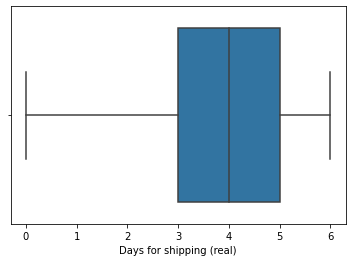

In [3750]:
sns.boxplot(df["Days for shipping (real)"])

### Days for shipment (scheduled)

<AxesSubplot:xlabel='Days for shipment (scheduled)'>

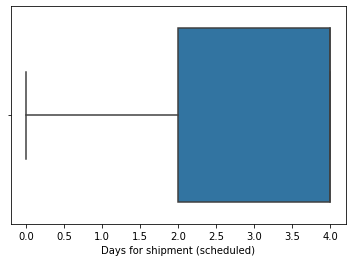

In [3751]:
sns.boxplot(df["Days for shipment (scheduled)"])

### Benefit per order

<AxesSubplot:xlabel='Benefit per order'>

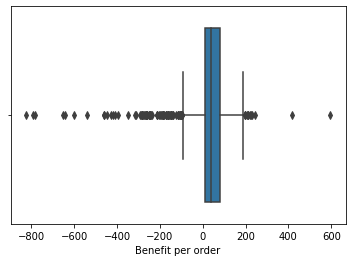

In [3752]:
sns.boxplot(df["Benefit per order"])

In [3753]:
q1 = df["Benefit per order"].quantile(0.25)
q2 = df["Benefit per order"].quantile(0.50)
q3 = df["Benefit per order"].quantile(0.75)

iqr = q3 - q1

uppertail = q3 + 1.5 * iqr
lowertail = q1 - 1.5 * iqr

print("iqr:", iqr)
print("uppertail:", uppertail)
print("lowertail:", lowertail)

iqr: 69.925001145
uppertail: 186.63250255999998
lowertail: -93.06750201999999


In [3754]:
df["Benefit per order"].loc[df["Benefit per order"] > uppertail]

126    199.479996
148    212.639999
152    595.349976
154    213.589996
161    195.279999
174    415.799988
305    242.479996
310    230.380005
313    218.479996
705    207.479996
909    224.979996
915    195.729996
Name: Benefit per order, dtype: float64

In [3755]:
df["Benefit per order"].loc[df["Benefit per order"] < lowertail]

1     -249.089996
2     -247.779999
15    -259.579987
16    -246.360001
33     -97.339996
          ...    
938   -824.859985
939   -393.459992
966   -311.799988
979   -409.130005
994   -184.690002
Name: Benefit per order, Length: 83, dtype: float64

### Sales per customer

<AxesSubplot:xlabel='Sales per customer'>

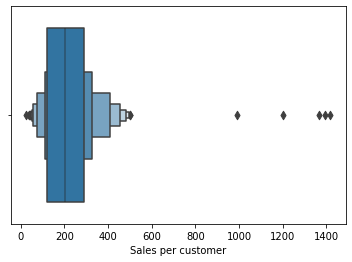

In [3756]:
sns.boxenplot(df["Sales per customer"])

In [3757]:
q1 = df["Sales per customer"].quantile(0.25)
q2 = df["Sales per customer"].quantile(0.50)
q3 = df["Sales per customer"].quantile(0.75)

iqr = q3 - q1

uppertail = q3 + 1.5 * iqr
lowertail = q1 - 1.5 * iqr

print("iqr:", iqr)
print("uppertail:", uppertail)
print("lowertail:", lowertail)

iqr: 167.0600128
uppertail: 538.5400314000001
lowertail: -129.70001980000004


In [3758]:
df["Sales per customer"].loc[df["Sales per customer"] > uppertail]

152    1417.50000
155    1395.00000
160    1365.00000
172    1200.00000
174     989.98999
Name: Sales per customer, dtype: float64

In [3759]:
df["Sales per customer"].loc[df["Sales per customer"] < lowertail]

Series([], Name: Sales per customer, dtype: float64)

In [3760]:
df.loc[(df["Sales per customer"] > uppertail), "Sales per customer"] = uppertail

<AxesSubplot:xlabel='Sales per customer'>

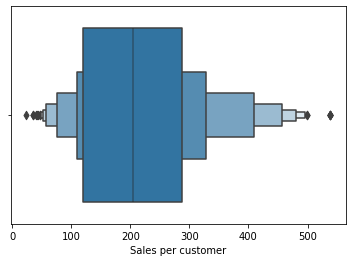

In [3761]:
sns.boxenplot(df["Sales per customer"])

### Late_delivery_risk 

<AxesSubplot:xlabel='Late_delivery_risk'>

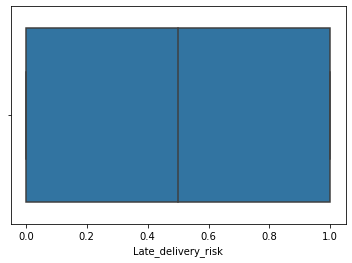

In [3762]:
sns.boxplot(df["Late_delivery_risk"])

### Category Id

<AxesSubplot:xlabel='Category Id'>

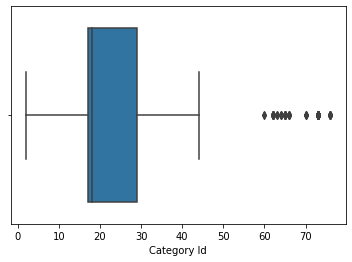

In [3763]:
sns.boxplot(df["Category Id"])

### Order Item Discount

#### handling outliers

In [3764]:
q1= df["Order Item Discount"].quantile(0.25)
q2= df["Order Item Discount"].quantile(0.50)
q3= df["Order Item Discount"].quantile(0.75)

median= df["Order Item Discount"].median()

iqr= q3-q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print("Q1--> ", q1)
print("Q2--> ", q2)
print("Q3--> ", q3)

print("Median--> ", median)
print("Upper_tail--> ", upper_tail)
print("Lower_tail--> ", lower_tail)

Q1-->  8.0
Q2-->  16.89999962
Q3-->  35.99000168
Median-->  16.89999962
Upper_tail-->  77.9750042
Lower_tail-->  -33.985002519999995


In [3765]:
# upper_tail outliers

df[["Order Item Discount"]].loc[df["Order Item Discount"] > upper_tail]

,Order Item Discount
13,81.940002
31,81.940002
129,112.489998
152,82.500000
155,105.000000
160,135.000000
169,81.370003
170,81.370003
172,300.000000
173,113.010002


In [3766]:
df.loc[(df["Order Item Discount"] > upper_tail), "Order Item Discount"] = upper_tail

In [3767]:
df[["Order Item Discount"]].loc[df["Order Item Discount"] > upper_tail]

,Order Item Discount


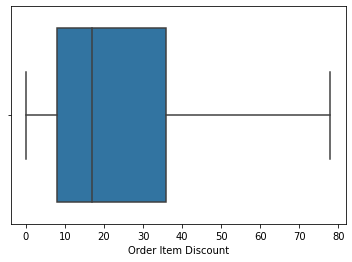

In [3768]:
sns.boxplot(df["Order Item Discount"])
plt.show()

### order date (DateOrders)

In [3769]:
df["order date (DateOrders)"]

0      1/31/2018 22:56
1      1/13/2018 12:27
2      1/13/2018 12:06
3      1/13/2018 11:45
4      1/13/2018 11:24
            ...       
995     7/23/2017 2:53
996     9/5/2015 16:38
997    9/22/2015 11:53
998      8/1/2015 7:03
999     7/24/2015 5:19
Name: order date (DateOrders), Length: 1000, dtype: object

In [3770]:
# In this example, we first define the date format to match the given date string ("%m/%d/%Y %H:%M" represents 
# the format "month/day/year hour:minute"). Then, we use the strptime() function to convert the date string into
# a datetime object. Finally, we use the mktime() function from the time module to convert the datetime object
# to a Unix timestamp.

In [3771]:
from datetime import datetime
import time

date_format = "%m/%d/%Y %H:%M"
for i in df["order date (DateOrders)"]:
    date_object = datetime.strptime(i, date_format)
    timestamp = int(time.mktime(date_object.timetuple()))
    df["order date (DateOrders)"]=timestamp

# Feature Selection

### 1) Linearity

In [3772]:
df.corr()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
Type,1.000000,-0.034838,-0.360250,-0.025861,-0.005483,0.136062,0.112503,0.054146,-0.311834,-0.312621,...,-0.025861,-0.134563,0.283152,0.044054,0.054146,-0.240028,-0.135851,NaN,NaN,0.324838
Days for shipping (real),-0.034838,1.000000,0.118500,-0.016851,-0.056762,0.242901,0.589727,-0.128703,0.057104,-0.004737,...,-0.016851,-0.028245,0.005774,-0.122432,-0.128703,0.037855,-0.066933,NaN,NaN,-0.184640
Days for shipment (scheduled),-0.360250,0.118500,1.000000,-0.058449,0.027543,-0.099827,-0.445881,-0.271889,0.010703,0.391206,...,-0.058449,0.221235,0.154313,-0.274887,-0.271889,0.011186,-0.300851,NaN,NaN,-0.979382
Benefit per order,-0.025861,-0.016851,-0.058449,1.000000,0.104818,-0.015102,0.029266,0.045899,0.011156,0.011740,...,1.000000,-0.001454,-0.000800,0.050101,0.045899,0.009054,0.129278,NaN,NaN,0.064640
Sales per customer,-0.005483,-0.056762,0.027543,0.104818,1.000000,-0.032920,-0.004171,0.219308,-0.158522,0.031585,...,0.104818,-0.010485,0.050391,0.187218,0.219308,-0.215030,0.450116,NaN,NaN,0.010451
Delivery Status,0.136062,0.242901,-0.099827,-0.015102,-0.032920,1.000000,-0.091802,0.012961,-0.031575,-0.067431,...,-0.015102,-0.021635,0.439173,0.020261,0.012961,-0.036820,-0.032606,NaN,NaN,0.098475
Late_delivery_risk,0.112503,0.589727,-0.445881,0.029266,-0.004171,-0.091802,1.000000,0.085499,0.027719,-0.177130,...,0.029266,-0.155344,-0.260536,0.087649,0.085499,0.022468,0.146218,NaN,NaN,0.405821
Category Id,0.054146,-0.128703,-0.271889,0.045899,0.219308,0.012961,0.085499,1.000000,-0.082642,-0.070185,...,0.045899,-0.189062,0.019428,0.994173,1.000000,-0.059478,0.676011,NaN,NaN,0.324905
Category Name,-0.311834,0.057104,0.010703,0.011156,-0.158522,-0.031575,0.027719,-0.082642,1.000000,-0.021089,...,0.011156,0.071718,-0.232722,-0.037271,-0.082642,0.856386,0.093561,NaN,NaN,-0.051521
Customer City,-0.312621,-0.004737,0.391206,0.011740,0.031585,-0.067431,-0.177130,-0.070185,-0.021089,1.000000,...,0.011740,0.161044,-0.068551,-0.080570,-0.070185,-0.029457,-0.075724,NaN,NaN,-0.339130


<AxesSubplot:>

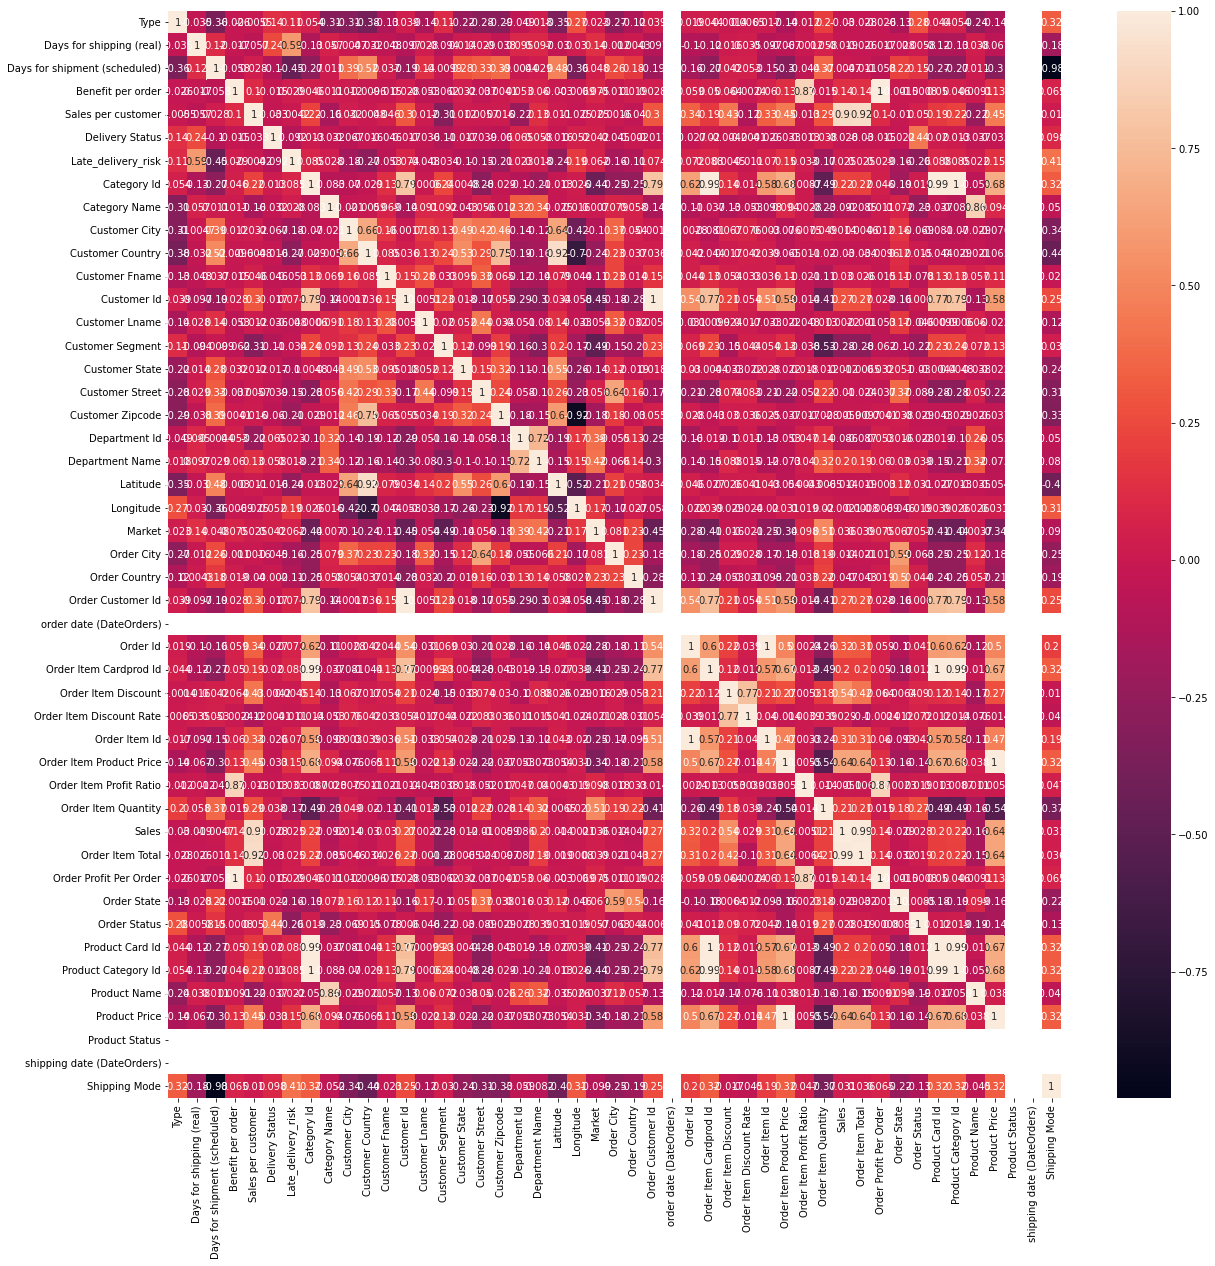

In [3773]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

### 2) No Multicolinearity

In [3774]:
df['Category Name']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Category Name, Length: 1000, dtype: int64

# Model Building

### Train Test Splitting

In [3775]:
x = df.drop("Order Region", axis=1)
y = df["Order Region"]

In [3776]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

## Applying Logistic Regression

In [3777]:
logistic_model = LogisticRegression(multi_class= "ovr")
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [3778]:
model_details.append("Logistic Regression")

In [3779]:
# Training Accuracy
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  14]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  58]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  23]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  30]
 [  0   0  

In [3780]:
# testing Accuracy
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("Multilabel COnfusion Matrix\n",multi_cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  

## Applying KNN Algorithm

### Feature Scaling

### 1) Normalization

In [3781]:
normal_scalar = MinMaxScaler()
array = normal_scalar.fit_transform(x_train)
x_train_normal_df = pd.DataFrame(array, columns=x_train.columns)
x_train_normal_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,0.333333,0.333333,1.0,0.623848,0.507621,0.000000,0.0,0.013514,0.333333,0.000000,...,0.623848,0.157576,0.250,0.014937,0.013514,0.250000,0.029649,0.0,0.0,0.000000
1,0.000000,0.833333,0.5,0.589088,0.140730,0.333333,1.0,0.094595,0.200000,0.000000,...,0.589088,0.284848,0.000,0.124720,0.094595,0.107143,0.056603,0.0,0.0,0.333333
2,0.000000,0.500000,1.0,0.610368,0.173932,0.000000,0.0,0.216216,0.366667,0.092937,...,0.610368,0.615152,0.000,0.283047,0.216216,0.285714,0.076819,0.0,0.0,0.000000
3,0.000000,0.833333,0.5,0.870433,1.000000,0.333333,1.0,0.027027,0.533333,0.000000,...,0.870433,0.100000,0.000,0.026886,0.027027,0.375000,0.663068,0.0,0.0,0.333333
4,0.000000,0.833333,1.0,0.622160,0.352387,0.333333,1.0,0.297297,0.100000,0.308550,...,0.622160,0.360606,0.000,0.356983,0.297297,0.053571,0.022918,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,0.333333,0.5,0.597163,0.202823,0.666667,0.0,0.364865,0.066667,0.000000,...,0.597163,0.100000,0.125,0.450336,0.364865,0.035714,0.016172,0.0,0.0,0.333333
796,1.000000,0.500000,0.5,0.551989,0.119333,0.333333,1.0,0.513514,0.633333,0.000000,...,0.551989,0.657576,0.125,0.648992,0.513514,0.428571,0.006065,0.0,0.0,0.333333
797,0.333333,0.500000,1.0,0.638952,0.338699,0.000000,0.0,0.364865,0.066667,0.000000,...,0.638952,0.048485,0.375,0.450336,0.364865,0.035714,0.016172,0.0,0.0,0.000000
798,1.000000,0.333333,0.5,0.463006,0.315496,0.666667,0.0,0.297297,0.100000,0.000000,...,0.463006,0.109091,0.125,0.356983,0.297297,0.053571,0.022918,0.0,0.0,0.333333


### 2) Standerdization

In [3782]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x_train)
x_train_std_df = pd.DataFrame(array, columns=x_train.columns)
x_train_std_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,0.168785,-1.318990,0.667190,0.429272,0.659557,-1.246376,-0.992528,-1.219272,0.758132,-0.775844,...,0.429272,-0.647837,0.215095,-1.390185,-1.219272,0.521216,-0.528020,0.0,0.0,-0.622663
1,-0.816820,0.760889,-1.263197,0.004212,-1.088559,-0.071935,1.007528,-0.942859,0.076856,-0.775844,...,0.004212,-0.200364,-0.794149,-1.023281,-0.942859,-0.223212,-0.220963,0.0,0.0,1.060209
2,-0.816820,-0.625697,0.667190,0.264437,-0.930363,-1.246376,-0.992528,-0.528238,0.928451,-0.454604,...,0.264437,0.960936,-0.794149,-0.494141,-0.528238,0.707323,0.009330,0.0,0.0,-0.622663
3,-0.816820,0.760889,-1.263197,3.444576,3.005580,-0.071935,1.007528,-1.173203,1.780045,-0.775844,...,3.444576,-0.850266,-0.794149,-1.350250,-1.173203,1.172591,6.687825,0.0,0.0,1.060209
4,-0.816820,0.760889,0.667190,0.408624,-0.080081,-0.071935,1.007528,-0.251824,-0.434100,0.290675,...,0.408624,0.065989,-0.794149,-0.247042,-0.251824,-0.502373,-0.604708,0.0,0.0,-0.622663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.139995,-1.318990,-1.263197,0.102955,-0.792704,1.102507,-0.992528,-0.021480,-0.604419,-0.775844,...,0.102955,-0.850266,-0.289527,0.064951,-0.021480,-0.595426,-0.681549,0.0,0.0,1.060209
796,2.139995,-0.625697,-1.263197,-0.449438,-1.190508,-0.071935,1.007528,0.485279,2.291002,-0.775844,...,-0.449438,1.110093,-0.289527,0.728872,0.485279,1.451752,-0.796695,0.0,0.0,1.060209
797,0.168785,-0.625697,0.667190,0.613962,-0.145302,-1.246376,-0.992528,-0.021480,-0.604419,-0.775844,...,0.613962,-1.031386,0.719717,0.064951,-0.021480,-0.595426,-0.681549,0.0,0.0,-0.622663
798,2.139995,-1.318990,-1.263197,-1.537545,-0.255854,1.102507,-0.992528,-0.251824,-0.434100,-0.775844,...,-1.537545,-0.818303,-0.289527,-0.247042,-0.251824,-0.502373,-0.604708,0.0,0.0,1.060209


### Creating Instance

In [3783]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_std_df, y_train)

KNeighborsClassifier()

In [3784]:
model_details.append("KNeighborsClassifier")

In [3785]:
array = std_scalar.transform(x_test)

x_test_std_df = pd.DataFrame(array, columns=x_test.columns)
x_test_std_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,-0.816820,0.067596,0.667190,0.650494,0.437619,1.102507,-0.992528,-0.574307,-0.774738,1.472840,...,0.650494,1.227289,-0.794149,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,-0.622663
1,2.139995,1.454182,-1.263197,0.647052,-0.111812,-0.071935,1.007528,-0.574307,-0.774738,-0.775844,...,0.647052,-0.690454,-0.289527,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,1.060209
2,-0.816820,-0.625697,0.667190,0.034920,-0.930363,-1.246376,-0.992528,-0.528238,0.928451,0.033682,...,0.034920,2.068965,-0.794149,-0.494141,-0.528238,0.707323,0.009330,0.0,0.0,-0.622663
3,-0.816820,-1.318990,0.667190,0.362208,2.417293,-1.246376,-0.992528,-0.942859,0.076856,0.624765,...,0.362208,-0.370830,1.728961,-1.023281,-0.942859,-0.223212,-0.220963,0.0,0.0,-0.622663
4,0.168785,-1.318990,0.667190,0.031744,-1.162476,-1.246376,-0.992528,-0.251824,-0.434100,0.958855,...,0.031744,-0.679800,0.215095,-0.247042,-0.251824,-0.502373,-0.604708,0.0,0.0,-0.622663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.816820,1.454182,-1.263197,-0.007436,-1.521517,-0.071935,1.007528,-0.574307,-0.774738,-0.775844,...,-0.007436,-0.370830,1.728961,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,1.060209
196,-0.816820,-1.318990,-1.263197,0.187667,-0.786043,1.102507,-0.992528,-0.528238,0.928451,-0.775844,...,0.187667,1.227289,-0.794149,-0.494141,-0.528238,0.707323,0.009330,0.0,0.0,1.060209
197,-0.816820,0.067596,0.667190,-7.503206,0.798325,1.102507,-0.992528,-0.574307,-0.774738,2.513659,...,-7.503206,-0.860920,-0.794149,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,-0.622663
198,1.154390,-1.318990,-2.228391,0.454421,0.297463,-0.071935,1.007528,2.005554,-0.945057,1.292945,...,0.454421,0.225801,1.224339,1.894479,2.005554,-0.781534,1.527421,0.0,0.0,2.743082


In [3786]:
array = std_scalar.transform(x_test)

x_test_std_df = pd.DataFrame(array, columns=x_test.columns)
x_test_std_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,-0.816820,0.067596,0.667190,0.650494,0.437619,1.102507,-0.992528,-0.574307,-0.774738,1.472840,...,0.650494,1.227289,-0.794149,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,-0.622663
1,2.139995,1.454182,-1.263197,0.647052,-0.111812,-0.071935,1.007528,-0.574307,-0.774738,-0.775844,...,0.647052,-0.690454,-0.289527,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,1.060209
2,-0.816820,-0.625697,0.667190,0.034920,-0.930363,-1.246376,-0.992528,-0.528238,0.928451,0.033682,...,0.034920,2.068965,-0.794149,-0.494141,-0.528238,0.707323,0.009330,0.0,0.0,-0.622663
3,-0.816820,-1.318990,0.667190,0.362208,2.417293,-1.246376,-0.992528,-0.942859,0.076856,0.624765,...,0.362208,-0.370830,1.728961,-1.023281,-0.942859,-0.223212,-0.220963,0.0,0.0,-0.622663
4,0.168785,-1.318990,0.667190,0.031744,-1.162476,-1.246376,-0.992528,-0.251824,-0.434100,0.958855,...,0.031744,-0.679800,0.215095,-0.247042,-0.251824,-0.502373,-0.604708,0.0,0.0,-0.622663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.816820,1.454182,-1.263197,-0.007436,-1.521517,-0.071935,1.007528,-0.574307,-0.774738,-0.775844,...,-0.007436,-0.370830,1.728961,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,1.060209
196,-0.816820,-1.318990,-1.263197,0.187667,-0.786043,1.102507,-0.992528,-0.528238,0.928451,-0.775844,...,0.187667,1.227289,-0.794149,-0.494141,-0.528238,0.707323,0.009330,0.0,0.0,1.060209
197,-0.816820,0.067596,0.667190,-7.503206,0.798325,1.102507,-0.992528,-0.574307,-0.774738,2.513659,...,-7.503206,-0.860920,-0.794149,-0.588987,-0.574307,-0.688480,-0.528020,0.0,0.0,-0.622663
198,1.154390,-1.318990,-2.228391,0.454421,0.297463,-0.071935,1.007528,2.005554,-0.945057,1.292945,...,0.454421,0.225801,1.224339,1.894479,2.005554,-0.781534,1.527421,0.0,0.0,2.743082


In [3787]:
# Training Data

y_pred_train = knn_clf.predict(x_train_std_df)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix -->
 [[ 1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  6  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  4  1  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  2  0 55  0  0  0  0  0  0  1  0 14  0  0  0  0  1  0  0  0  0  3]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  6  0  0  0  4  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 1  0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  0  0 40  0  0  0  4  0  9  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0 19  0  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  2  0  0  2  0  0  1 17  1  0  0  0  0  0  0  0  0  4  0  0  3]
 [ 0  0  0  1  0  2  0  0  0  1 34  0  1  0  1  0  0  1  0  0  0  0 21]
 [ 0  1  1  1  1  0  1 11  0  0  0 38  0  7  1  4  0  0  0  0  0  0  0]
 [ 0  2  0 25  0  0  0  0  0  0  1  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0 24  0  0  0  6  0 2

In [3788]:
# Testing Data

y_pred = knn_clf.predict(x_test_std_df)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix -->
 [[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  3  0 11  0  0  1  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  3  0  4  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  3  0  0  1  1  0  0  1  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  1  0  0  1  1  7  0  0  0  0  1  0  0  0  0  0  0  4]
 [ 0  0  0  1  1  0  0  5  0  0  0  6  0  1  0  2  0  0  0  0  0  0  0]
 [ 0  1  0 10  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  7  0  0  0  3  0  

### Hyperparameter Tunning

### GridSearchCV

In [3789]:
knn_clf = KNeighborsClassifier() # Estimator

param_grid = {"n_neighbors" : np.arange(3,30)} # Param_grid

rmscv_knn_clf = RandomizedSearchCV(knn_clf, param_grid, cv=5)  # cv=5

rmscv_knn_clf.fit(x_train_std_df, y_train) 
rmscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [3790]:
model_details.append("RandomizedSearchCV")

In [3791]:
knn_clf = rmscv_knn_clf.best_estimator_

In [3792]:
# Training Data

y_pred_train = knn_clf.predict(x_train_std_df)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix -->
 [[  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   1]
 [  0   0   0   1   0   0   0   0   0   2   1   0   0   0   0   0   0   0
    0   4   0   0   1]
 [  0   1   0  60   0   0   0   0   0   0   2   0   8   0   0   0   0   0
    0   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   3   0   0]
 [  0   0   0   0   0   2   0   0   0   4   0   0   1   0   0   0   0   2
    0   3   0   0   2]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   2   0   0   1]
 [  0   0   0   2   0   0   0  32   0   0   1  11   2   6   0   3   0   0
    0   0   0   0   1]
 [  0   0   0   3   0   0   0   0   7   0   0   0   1   0   0   0   0   4
    0   0   0   0   8]
 [  0   0   0   1   0   1   0   0   1  14   0   0   0   0   0   0   0   1
    0   5   0   0   7]
 [  0   

In [3793]:
# Testing Accuracy

knn_clf = rmscv_knn_clf.best_estimator_

y_pred = knn_clf.predict(x_test_std_df)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

testing_accuracy_list.append(accuracy)

Confusion Matrix -->
 [[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  3  0  0  0  6  0  2  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  1  1  2  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  3  0  0  1  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  1  0  0  0  0  0  0  4  0  1  0  0  0  0  0  0  0  0  0  9]
 [ 0  0  0  1  0  0  0  5  0  0  0  8  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  9  0  0  0  1  0  

## Applying Decision Tree

In [3794]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [3795]:
model_details.append("Decision Tree")

In [3796]:
# Evaluation on Training data
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix=\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train, y_pred_train)
print("accuracy=", accuracy)
print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("clf_report=\n", clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix=
 [[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  58   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  

In [3797]:
# Evaluation on Testing data
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix=\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy=", accuracy)
print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("clf_report=\n", clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix=
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 14  

### Feature Selection Methods

In [3798]:
dt_clf.feature_importances_

array([0.        , 0.00385013, 0.        , 0.00678357, 0.        ,
       0.        , 0.00181183, 0.00370993, 0.        , 0.00494723,
       0.        , 0.00627669, 0.01967284, 0.00181183, 0.        ,
       0.        , 0.00199834, 0.0041472 , 0.        , 0.        ,
       0.00073606, 0.00224813, 0.20151012, 0.00330659, 0.62210112,
       0.01338812, 0.        , 0.01861493, 0.00135887, 0.00135887,
       0.00264009, 0.02454315, 0.        , 0.00571344, 0.        ,
       0.        , 0.00756873, 0.00553207, 0.01960441, 0.00217107,
       0.        , 0.        , 0.00756682, 0.00135887, 0.        ,
       0.        , 0.00366895])

In [3799]:
sum(dt_clf.feature_importances_)

0.9999999999999997

In [3800]:
array = dt_clf.feature_importances_
array

array([0.        , 0.00385013, 0.        , 0.00678357, 0.        ,
       0.        , 0.00181183, 0.00370993, 0.        , 0.00494723,
       0.        , 0.00627669, 0.01967284, 0.00181183, 0.        ,
       0.        , 0.00199834, 0.0041472 , 0.        , 0.        ,
       0.00073606, 0.00224813, 0.20151012, 0.00330659, 0.62210112,
       0.01338812, 0.        , 0.01861493, 0.00135887, 0.00135887,
       0.00264009, 0.02454315, 0.        , 0.00571344, 0.        ,
       0.        , 0.00756873, 0.00553207, 0.01960441, 0.00217107,
       0.        , 0.        , 0.00756682, 0.00135887, 0.        ,
       0.        , 0.00366895])

In [3801]:
pd.Series(array * 100,index = x.columns)

Type                              0.000000
Days for shipping (real)          0.385013
Days for shipment (scheduled)     0.000000
Benefit per order                 0.678357
Sales per customer                0.000000
Delivery Status                   0.000000
Late_delivery_risk                0.181183
Category Id                       0.370993
Category Name                     0.000000
Customer City                     0.494723
Customer Country                  0.000000
Customer Fname                    0.627669
Customer Id                       1.967284
Customer Lname                    0.181183
Customer Segment                  0.000000
Customer State                    0.000000
Customer Street                   0.199834
Customer Zipcode                  0.414720
Department Id                     0.000000
Department Name                   0.000000
Latitude                          0.073606
Longitude                         0.224813
Market                           20.151012
Order City 

<AxesSubplot:>

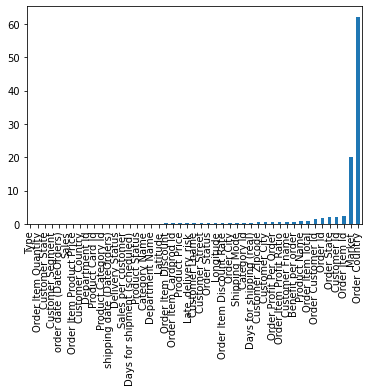

In [3802]:
s1 = pd.Series(array * 100,index = x.columns)
s1.sort_values().plot(kind = 'bar')

### Hyperparameter Tunning

In [3803]:
dt_model = DecisionTreeClassifier(random_state=11)

hyperparametr = {"criterion":['gini','entropy'],
                'max_depth':np.arange(3,8),
                'min_samples_split':np.arange(2,20),
                'min_samples_leaf':np.arange(2,15)}

gscv_dt_clf = RandomizedSearchCV(dt_model,hyperparametr,cv = 5,n_jobs = -1)
gscv_dt_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [3804]:
model_details.append("RandomizedSearchCV")

In [3805]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=11,
                       min_samples_split=18, random_state=11)

In [3806]:
# Training Accuracy

y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix ---->\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy is ---->",accuracy)
print("*"*50)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report ---->\n",clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix ---->
 [[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  58   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0 

In [3807]:
# Testing Accuracy

y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix ---->\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is ---->",accuracy)
print("*"*50)

clf_report = classification_report(y_test,y_pred)
print("Classification Report ---->\n",clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix ---->
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0

### Cost Complexity Prunning

In [3808]:
result = dt_clf.cost_complexity_pruning_path(x_train,y_train)
result

{'ccp_alphas': array([0.        , 0.00117187, 0.0012069 , 0.00120833, 0.00125   ,
        0.00125   , 0.00125   , 0.00125   , 0.00125   , 0.00153409,
        0.00166667, 0.00166667, 0.00166667, 0.001875  , 0.00190476,
        0.00195312, 0.00208333, 0.00214286, 0.00214286, 0.00214286,
        0.00222222, 0.00225   , 0.00230117, 0.00233333, 0.00242857,
        0.00244048, 0.0025    , 0.00256494, 0.0026461 , 0.0028125 ,
        0.00294599, 0.00310931, 0.003375  , 0.0034127 , 0.00354167,
        0.00357143, 0.00361111, 0.00385302, 0.00388889, 0.0046    ,
        0.00469444, 0.0047619 , 0.00499107, 0.00541667, 0.00671429,
        0.00769839, 0.00857143, 0.00930556, 0.0096177 , 0.01087553,
        0.0110119 , 0.01164304, 0.01362766, 0.01452381, 0.01458034,
        0.01708003, 0.02552621, 0.04270109, 0.04315068, 0.047125  ,
        0.05411036, 0.06833305, 0.09980882]),
 'impurities': array([0.        , 0.00234375, 0.00475754, 0.00717421, 0.00842421,
        0.00967421, 0.01092421, 0.01342421

In [3809]:
result = dt_clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00117187, 0.0012069 , 0.00120833, 0.00125   ,
       0.00125   , 0.00125   , 0.00125   , 0.00125   , 0.00153409,
       0.00166667, 0.00166667, 0.00166667, 0.001875  , 0.00190476,
       0.00195312, 0.00208333, 0.00208333, 0.00214286, 0.00214286,
       0.00222222, 0.00225   , 0.00230117, 0.00233333, 0.00242857,
       0.0025    , 0.00256494, 0.0026461 , 0.0028125 , 0.00294599,
       0.00310931, 0.003375  , 0.0034127 , 0.00354167, 0.00357143,
       0.00361111, 0.00385302, 0.00388889, 0.0046    , 0.00469444,
       0.0047619 , 0.00499107, 0.00541667, 0.00671429, 0.00769839,
       0.00857143, 0.00930556, 0.0096177 , 0.01087553, 0.0110119 ,
       0.01164304, 0.01362766, 0.01452381, 0.01458034, 0.01708003,
       0.02552621, 0.04270109, 0.04315068, 0.047125  , 0.05411036,
       0.06833305, 0.09980882])

In [3810]:
for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeClassifier(ccp_alpha=i,random_state=11)
    
    decision_tree_model.fit(x_train,y_train)
    
    training_accuracy = decision_tree_model.score(x_train,y_train)
    print(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test,y_test)
    print(testing_accuracy)

1.0
0.93
0.99875
0.93
0.9975
0.93
0.99625
0.925
0.98875
0.925
0.98875
0.925
0.98875
0.925
0.98875
0.925
0.98875
0.925
0.9875
0.925
0.9825
0.925
0.9825
0.925
0.9825
0.925
0.97875
0.925
0.9775
0.92
0.975
0.92
0.97375
0.92
0.97375
0.92
0.97
0.92
0.97
0.92
0.96875
0.92
0.9675
0.915
0.965
0.91
0.9625
0.91
0.96
0.91
0.95625
0.91
0.95375
0.91
0.9525
0.91
0.95
0.905
0.94875
0.91
0.94875
0.91
0.945
0.91
0.9425
0.91
0.93875
0.91
0.93625
0.905
0.9325
0.905
0.92625
0.905
0.92375
0.905
0.92125
0.905
0.91625
0.905
0.9125
0.905
0.90375
0.91
0.89375
0.905
0.88875
0.9
0.885
0.9
0.8775
0.88
0.86875
0.875
0.865
0.87
0.85375
0.87
0.84375
0.855
0.81875
0.83
0.805
0.815
0.8
0.83
0.7675
0.79
0.7225
0.745
0.685
0.705
0.65625
0.68
0.62125
0.65
0.56875
0.585
0.41125
0.42
0.33375
0.345
0.17
0.17


In [3811]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeClassifier(ccp_alpha=i,random_state=11)
    
    decision_tree_model.fit(x_train,y_train)
    
    training_accuracy = decision_tree_model.score(x_train,y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test,y_test)
    test_accuracy_list.append(testing_accuracy)
    
train_accuracy_list

[1.0,
 0.99875,
 0.9975,
 0.99625,
 0.98875,
 0.98875,
 0.98875,
 0.98875,
 0.98875,
 0.9875,
 0.9825,
 0.9825,
 0.9825,
 0.97875,
 0.9775,
 0.975,
 0.97375,
 0.97375,
 0.97,
 0.97,
 0.96875,
 0.9675,
 0.965,
 0.9625,
 0.96,
 0.95625,
 0.95375,
 0.9525,
 0.95,
 0.94875,
 0.94875,
 0.945,
 0.9425,
 0.93875,
 0.93625,
 0.9325,
 0.92625,
 0.92375,
 0.92125,
 0.91625,
 0.9125,
 0.90375,
 0.89375,
 0.88875,
 0.885,
 0.8775,
 0.86875,
 0.865,
 0.85375,
 0.84375,
 0.81875,
 0.805,
 0.8,
 0.7675,
 0.7225,
 0.685,
 0.65625,
 0.62125,
 0.56875,
 0.41125,
 0.33375,
 0.17]

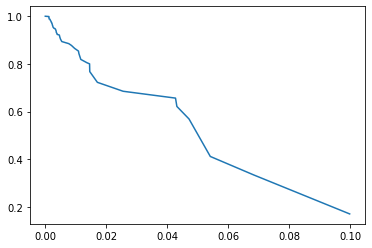

In [3812]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy_list)

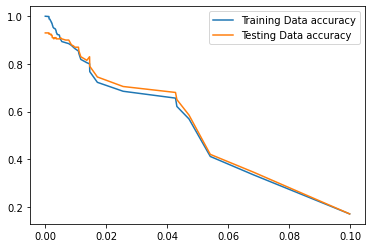

In [3813]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy_list,label = "Training Data accuracy")
ax.plot(ccp_alpha_list,test_accuracy_list,label = "Testing Data accuracy")
ax.legend()

In [3814]:
max(test_accuracy_list)

0.93

In [3815]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

0

In [3816]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

0.0

In [3817]:
decision_tree_model = DecisionTreeClassifier(ccp_alpha=best_ccp,random_state=11)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

In [3818]:
model_details.append("ccp_alpha")

In [3819]:
# Training Accuracy

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix ---->\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy is ---->",accuracy)
print("*"*50)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report ---->\n",clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix ---->
 [[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  58   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0 

In [3820]:
# Testing Accuracy

y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix ---->\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is ---->",accuracy)
print("*"*50)

clf_report = classification_report(y_test,y_pred)
print("Classification Report ---->\n",clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix ---->
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

## Applying Random Forest Classifier

In [3821]:
rf_clf_model = RandomForestClassifier()
rf_clf_model.fit(x_train, y_train)

RandomForestClassifier()

In [3822]:
model_details.append("Random Forest")

In [3823]:
#prediction for training data
y_pred_train = rf_clf_model.predict(x_train)
y_pred_train

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix=\n",cnf_matrix)
print()

accuracy = accuracy_score(y_train, y_pred_train)
print("accuracy=", accuracy)
print()

clf_report = classification_report(y_train, y_pred_train)
print("clf_report=\n", clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix=
 [[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  58   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  

In [3824]:
#prediction for testing data
y_pred_test = rf_clf_model.predict(x_test)
y_pred_train

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix=\n",cnf_matrix)
print()

accuracy = accuracy_score(y_test, y_pred_test)
print("accuracy=", accuracy)
print()

clf_report = classification_report(y_test, y_pred_test)
print("clf_report=\n", clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix=
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  1  0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  

<AxesSubplot:>

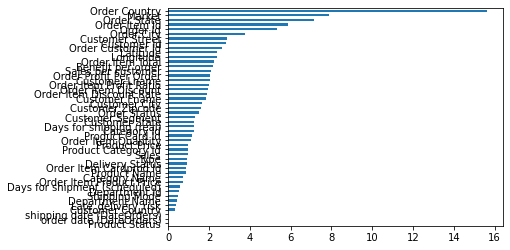

In [3825]:
array = rf_clf_model.feature_importances_
s1 = pd.Series(array, index=x.columns)*100
s1.sort_values().plot(kind="barh")

# Hyperparameter Tunning

In [3826]:
hyp_rf_clf_model = RandomForestClassifier(random_state=1, n_jobs=-1)

parameter = {
    "n_estimators": np.arange(10, 200),
    "criterion": ["gini", "entropy"],
    "max_depth": np.arange(3, 8),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": np.arange(2, 15),
    "max_features": ["sqrt", "log2"]
}

rmscv_rf_clf_model = RandomizedSearchCV(hyp_rf_clf_model, parameter, cv=5, error_score='raise')
rmscv_rf_clf_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 

In [3827]:
model_details.append("RandomizedSearchCV")

In [3828]:
#prediction for training data
y_pred_train = rmscv_rf_clf_model.predict(x_train)
y_pred_train

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix=\n",cnf_matrix)
print()

accuracy = accuracy_score(y_train, y_pred_train)
print("accuracy=", accuracy)
print()

clf_report = classification_report(y_train, y_pred_train)
print("clf_report=\n", clf_report)

training_accuracy_list.append(accuracy)

Confusion Matrix=
 [[  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0
    0   4   0   0   1]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   5   0   0]
 [  0   0   0   0   0   7   0   0   0   5   0   0   0   0   0   0   0   0
    0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    2   0   0   3   0]
 [  0   0   0   0   0   0   0  55   0   0   0   2   0   0   0   0   0   0
    0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  20   0   2   0   0   0   0   0   0   1
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28   0   0   0   0   0   0   0   0
    0   1   0   0   1]
 [  0   0  

In [3829]:
#prediction for testing data
y_pred_test = rmscv_rf_clf_model.predict(x_test)
y_pred_train

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix=\n",cnf_matrix)
print()

accuracy = accuracy_score(y_test, y_pred_test)
print("accuracy=", accuracy)
print()

clf_report = classification_report(y_test, y_pred_test)
print("clf_report=\n", clf_report)

testing_accuracy_list .append(accuracy)

Confusion Matrix=
 [[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  1  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0 11  

## Applying Adaboost Algorithm

In [3830]:
adb_clf = AdaBoostClassifier(random_state=11)
adb_clf

AdaBoostClassifier(random_state=11)

In [3831]:
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(random_state=11)

In [3832]:
model_details.append("Adaboost")

In [3833]:
# Model Evaluation Training data

y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix is ----->\n",cnf_matrix)
print("*"*100)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy is  ----->",accuracy)
print("*"*100)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report is ----->\n",clf_report)
print("*"*100)

training_accuracy_list.append(accuracy)

Confusion Matrix is ----->
 [[  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  76   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  58   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  23]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [

In [3834]:
# Model Evaluation Testing data

y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is ----->\n",cnf_matrix)
print("*"*100)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is  ----->",accuracy)
print("*"*100)

clf_report = classification_report(y_test,y_pred)
print("Classification Report is ----->\n",clf_report)
print("*"*100)

testing_accuracy_list .append(accuracy)

Confusion Matrix is ----->
 [[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 1

### Feature Importance

<AxesSubplot:>

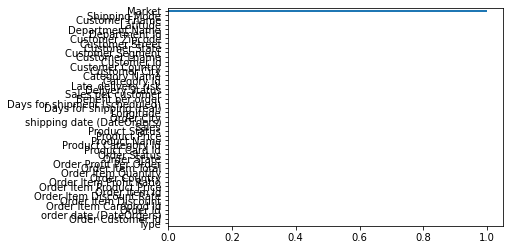

In [3835]:
s1 = pd.Series(adb_clf.feature_importances_, index=x.columns)
s1.sort_values().plot(kind= 'barh')

### Hyperparameter Tunning

In [3836]:
# adb_clf = AdaBoostClassifier(random_state=30)

# param_grid = {
#                'n_estimators':np.arange(10,200,2),
#                 'learning_rate':np.arange(0,2,0.001)
#                 }

# rscv_adb_clf = RandomizedSearchCV(adb_clf,param_grid,cv=7,n_jobs = -1)
# rscv_adb_clf.fit(x_train,y_train)
# rscv_adb_clf.best_estimator_

In [3837]:
# adb_clf = rscv_adb_clf.best_estimator_
# adb_clf.fit(x_train,y_train)

In [3838]:
# model_details.append("RandomizedSearchCV")

In [3839]:
# # Model Evaluation Training data

# y_pred_train = adb_clf.predict(x_train)

# cnf_matrix = confusion_matrix(y_train,y_pred_train)
# print("Confusion Matrix is ----->\n",cnf_matrix)
# print("*"*100)

# accuracy = accuracy_score(y_train,y_pred_train)
# print("Accuracy is  ----->",accuracy)
# print("*"*100)

# clf_report = classification_report(y_train,y_pred_train)
# print("Classification Report is ----->\n",clf_report)
# print("*"*100)

# training_accuracy_list.append(accuracy)

In [3840]:
# # Model Evaluation Testing data

# y_pred = adb_clf.predict(x_test)

# cnf_matrix = confusion_matrix(y_test,y_pred)
# print("Confusion Matrix is ----->\n",cnf_matrix)
# print("*"*100)

# accuracy = accuracy_score(y_test,y_pred)
# print("Accuracy is  ----->",accuracy)
# print("*"*100)

# clf_report = classification_report(y_test,y_pred)
# print("Classification Report is ----->\n",clf_report)
# print("*"*100)

# testing_accuracy_list .append(accuracy)

In [3841]:
# Feature Importance

# s1 = pd.Series(adb_clf.feature_importances_, index=x.columns)
# s1.sort_values().plot(kind= 'barh')

In [3842]:
df3 = pd.DataFrame({"Model": model_details, "training accuracy":training_accuracy_list, "testing accuracy":testing_accuracy_list})
df3

,Model,training accuracy,testing accuracy
0,Logistic Regression,0.17000,0.170
1,KNeighborsClassifier,0.17000,0.170
2,RandomizedSearchCV,0.17000,0.170
3,Decision Tree,1.00000,0.925
4,RandomizedSearchCV,1.00000,0.925
5,ccp_alpha,1.00000,0.930
6,Random Forest,1.00000,0.820
7,RandomizedSearchCV,0.80875,0.690
8,Adaboost,0.38500,0.385


In [3866]:
dt_clf

DecisionTreeClassifier()

# Creating Pickle

In [3868]:
with open("Decision Tree.pkl", "wb") as f:
    pickle.dump(dt_clf, f)

# Creating JSON

In [3844]:
column_names = x.columns
column_names

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order State',
       'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'S

In [3845]:
df['Delivery Status']

0      0
1      1
2      2
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    0
Name: Delivery Status, Length: 1000, dtype: int64

In [3846]:
json_data = {"Type":Type_value,
             "Customer_Country":Customer_Country_value,
             "Delivery_Status":Delivery_Status_value,
             "Customer_Segment":Customer_Segment_values,
             "Customer_State":Customer_State_values,
             "Department_Name":Department_Name_values,
             "Market":Market_values,
             "Order_Status":Order_Status_value,
             "Shipping_Mode":Shipping_Mode_value,
             "Category_Name":Category_Name_value,
             "Customer_City":Customer_City_value,
             "Customer_Fname":Customer_Fname_value,
             "Customer_Lname":Customer_Lname_value,
             "Customer_Street":Customer_Street_value,
             "Order_City":Order_City_value,
             "Order_Country":Order_Country_value,
             "Order_State":Order_State_value,
             "Product_Name":Product_Name_value,
             "columns":list(column_names)}
json_data

{'Type': {'DEBIT': 0, 'TRANSFER': 1, 'CASH': 2, 'PAYMENT': 3},
 'Customer_Country': {'Puerto Rico': 0, 'EE. UU.': 1},
 'Delivery_Status': {'Advance shipping': 0,
  'Late delivery': 1,
  'Shipping on time': 2,
  'Shipping canceled': 3},
 'Customer_Segment': {'Consumer': 0, 'Home Office': 1, 'Corporate': 2},
 'Customer_State': {'PR': 0,
  'CA': 1,
  'NY': 2,
  'FL': 3,
  'MA': 4,
  'IL': 5,
  'MT': 6,
  'PA': 7,
  'MI': 8,
  'TX': 9,
  'DE': 10,
  'GA': 11,
  'MD': 12,
  'OH': 13,
  'HI': 14,
  'NJ': 15,
  'WI': 16,
  'AZ': 17,
  'CO': 18,
  'MN': 19,
  'NC': 20,
  'NM': 21,
  'OR': 22,
  'SC': 23,
  'VA': 24,
  'UT': 25,
  'WA': 26,
  'KY': 27,
  'WV': 28,
  'RI': 29,
  'CT': 30,
  'LA': 31,
  'TN': 32,
  'DC': 33,
  'ND': 34,
  'MO': 35,
  'IN': 36,
  'ID': 37,
  'NV': 38,
  'KS': 39,
  'AR': 40,
  'OK': 41,
  'AL': 42,
  'IA': 43,
  '95758': 44,
  '91732': 45},
 'Department_Name': {'Fitness': 0,
  'Apparel': 1,
  'Golf': 2,
  'Footwear': 3,
  'Outdoors': 4,
  'Fan Shop': 5,
  'Technol

In [3847]:
json_data['Delivery_Status'][Delivery_Status]

0

In [3848]:
json_data['Delivery_Status'][Delivery_Status]

0

In [3849]:
json_data['Category_Name'][Category_Name]

0

In [3851]:
# label_encoder = LabelEncoder()

# # Apply label encoding to the desired columns
# encoded_column1 = label_encoder.fit_transform(encoded_catagory_name)
# encoded_column2 = label_encoder.fit_transform(encoded_customer_city)
# encoded_column3 = label_encoder.fit_transform(encoded_customer_fname)
# encoded_column4 = label_encoder.fit_transform(encoded_customer_lname)
# encoded_column5 = label_encoder.fit_transform(encoded_customer_street)
# encoded_column6 = label_encoder.fit_transform(encoded_order_city)
# encoded_column7 = label_encoder.fit_transform(encoded_order_country)
# encoded_column8 = label_encoder.fit_transform(encoded_order_state)
# encoded_column9 = label_encoder.fit_transform(encoded_product_name)

In [3852]:
# encoded_data = {
#     "Category Name": encoded_catagory_name.tolist(),
#     "Customer City": encoded_customer_city.tolist(),
#     "Customer Fname": encoded_customer_fname.tolist(),
#     "Customer Lname": encoded_customer_lname.tolist(),
#     "Customer Street": encoded_customer_street.tolist(),
#     "Order City": encoded_order_city.tolist(),
#     "Order Country": encoded_order_country.tolist(),
#     "Order State": encoded_order_state.tolist(),
#     "Product Name": encoded_product_name.tolist()}
# encoded_data

In [3853]:
with open ("project_data.json","w") as f:
    json.dump(json_data,f)

In [3854]:
json_data['Product_Name']

{'Smart watch ': 0,
 'Perfect Fitness Perfect Rip Deck': 1,
 "Under Armour Girls' Toddler Spine Surge Runni": 2,
 "Nike Men's Dri-FIT Victory Golf Polo": 3,
 "Under Armour Men's Compression EV SL Slide": 4,
 "Under Armour Women's Micro G Skulpt Running S": 5,
 "Nike Men's Free 5.0+ Running Shoe": 6,
 "Glove It Women's Mod Oval 3-Zip Carry All Gol": 7,
 'Bridgestone e6 Straight Distance NFL San Dieg': 8,
 "Columbia Men's PFG Anchor Tough T-Shirt": 9,
 'Titleist Pro V1x Golf Balls': 10,
 'Bridgestone e6 Straight Distance NFL Tennesse': 11,
 'Polar FT4 Heart Rate Monitor': 12,
 'ENO Atlas Hammock Straps': 13,
 "adidas Men's F10 Messi TRX FG Soccer Cleat": 14,
 "Brooks Women's Ghost 6 Running Shoe": 15,
 "Nike Men's CJ Elite 2 TD Football Cleat": 16,
 "Diamondback Women's Serene Classic Comfort Bi": 17,
 'Industrial consumer electronics': 18,
 'Web Camera': 19,
 'Dell Laptop': 20,
 'SOLE E25 Elliptical': 21,
 'Elevation Training Mask 2.0': 22,
 "adidas Men's Germany Black Crest Away Tee": 

In [3855]:
json_data['Customer_Segment'][Customer_Segment]

0

# User Input Testing

In [3856]:
Type = "DEBIT"
Days_for_shipping_real = 3
Days_for_shipment_scheduled = 4
Benefit_per_order = 91.25
Sales_per_customer = 314.640015
Delivery_Status = "Advance shipping"
Late_delivery_risk = 0
Category_Id = 73
Category_Name = "Sporting Goods"
Customer_City = "Caguas"
Customer_Country = "Puerto Rico"
Customer_Fname = "Cally"
Customer_Id = 20755
Customer_Lname = "Holloway"
Customer_Segment= "Consumer"
Customer_State = "PR"
Customer_Street = "5365 Noble Nectar Island"
Customer_Zipcode = 725.0
Department_Id = 2
Department_Name = "Fitness"
Latitude = 18.251453
Longitude = -66.037056
Market = "Pacific Asia"
Order_City = "Bekasi"
Order_Country = "Indonesia"
Order_Customer_Id = 20755
order_date_DateOrders = 1453209840
Order_Id = 77202
Order_Item_Cardprod_Id = 1360
Order_Item_Discount = 13.11
Order_Item_Discount_Rate = 0.04
Order_Item_Id = 180517
Order_Item_Product_Pric = 327.75
Order_Item_Profit_Ratio = 0.29
Order_Item_Quantity = 1
Sales = 327.75
Order_Item_Total = 314.640015
Order_Profit_Per_Order = 91.25
Order_State = "Java Occidental"
Order_Status = "COMPLETE"
Product_Card_Id = 1360
Product_Category_Id = 73
Product_Name = "Smart watch "
Product_Price = 327.75
Product_Status = 0
shipping_date_DateOrders =1452864240
Shipping_Mode = "Standard Class"

In [3857]:
test_array = np.zeros(len(column_names))
test_array[0] = json_data["Type"][Type]
test_array[1] = Days_for_shipping_real
test_array[2] = Days_for_shipment_scheduled
test_array[3] = Benefit_per_order
test_array[4] = Sales_per_customer
test_array[5] = json_data["Delivery_Status"][Delivery_Status]
test_array[6] = Late_delivery_risk
test_array[7] = Category_Id
test_array[8] = json_data["Category_Name"][Category_Name]
test_array[9] = json_data["Customer_City"][Customer_City]
test_array[10] = json_data["Customer_Country"][Customer_Country]
test_array[11] = json_data["Customer_Fname"][Customer_Fname]
test_array[12] = Customer_Id
test_array[13] = json_data["Customer_Lname"][Customer_Lname]
test_array[14] = json_data["Customer_Segment"][Customer_Segment]
test_array[15] = json_data["Customer_State"][Customer_State]
test_array[16] = json_data["Customer_Street"][Customer_Street]
test_array[17] = Customer_Zipcode
test_array[18] = Department_Id
test_array[19] = json_data["Department_Name"][Department_Name]
test_array[20] = Latitude
test_array[21] = Longitude
test_array[22] = json_data["Market"][Market]
test_array[23] = json_data["Order_City"][Order_City]
test_array[24] = json_data["Order_Country"][Order_Country]
test_array[25] = Order_Customer_Id
test_array[26] = order_date_DateOrders
test_array[27] = Order_Id
test_array[28] = Order_Item_Cardprod_Id 
test_array[29] = Order_Item_Discount 
test_array[30] = Order_Item_Discount_Rate 
test_array[31] = Order_Item_Id 
test_array[32] = Order_Item_Product_Pric 
test_array[33] = Order_Item_Profit_Ratio 
test_array[34] = Order_Item_Quantity 
test_array[35] = Sales 
test_array[36] = Order_Item_Total  
test_array[37] = Order_Profit_Per_Order 
test_array[38] = json_data["Order_State"][Order_State]
test_array[39] = json_data["Order_Status"][Order_Status]
test_array[40] = Product_Card_Id  
test_array[41] = Product_Category_Id  
test_array[42] = json_data['Product_Name'][Product_Name]
test_array[43] = Product_Price 
test_array[44] = Product_Status 
test_array[45] = shipping_date_DateOrders
test_array[46] = json_data["Shipping_Mode"][Shipping_Mode]
test_array

array([ 0.00000000e+00,  3.00000000e+00,  4.00000000e+00,  9.12500000e+01,
        3.14640015e+02,  0.00000000e+00,  0.00000000e+00,  7.30000000e+01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.07550000e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.25000000e+02,  2.00000000e+00,  0.00000000e+00,
        1.82514530e+01, -6.60370560e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.07550000e+04,  1.45320984e+09,  7.72020000e+04,
        1.36000000e+03,  1.31100000e+01,  4.00000000e-02,  1.80517000e+05,
        3.27750000e+02,  2.90000000e-01,  1.00000000e+00,  3.27750000e+02,
        3.14640015e+02,  9.12500000e+01,  0.00000000e+00,  0.00000000e+00,
        1.36000000e+03,  7.30000000e+01,  0.00000000e+00,  3.27750000e+02,
        0.00000000e+00,  1.45286424e+09,  0.00000000e+00])

In [3858]:
prediction = dt_clf.predict([test_array])[0]
prediction

'Southeast Asia'

In [3859]:
Category_Name_index = json_data['columns']
Category_Name_index

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order State',
 'Order Status',
 'Product Card Id',
 'Product Category Id',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode']

In [3860]:
df1 = pd.read_csv("supply_chain_dataset.csv",encoding='latin-1')
df1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [3861]:
Category_Name_list = df1['Category Name'].unique()
Category_Name_list

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [3862]:
category_dict = {}
for i in range(len(Category_Name_list)):
    #print(i)
    category_dict.update({Category_Name_list[i]:i})
    
print(category_dict)    

{'Sporting Goods': 0, 'Cleats': 1, 'Shop By Sport': 2, "Women's Apparel": 3, 'Electronics': 4, 'Boxing & MMA': 5, 'Cardio Equipment': 6, 'Trade-In': 7, "Kids' Golf Clubs": 8, 'Hunting & Shooting': 9, 'Baseball & Softball': 10, "Men's Footwear": 11, 'Camping & Hiking': 12, 'Consumer Electronics': 13, 'Cameras ': 14, 'Computers': 15, 'Basketball': 16, 'Soccer': 17, "Girls' Apparel": 18, 'Accessories': 19, "Women's Clothing": 20, 'Crafts': 21, "Men's Clothing": 22, 'Tennis & Racquet': 23, 'Fitness Accessories': 24, 'As Seen on  TV!': 25, 'Golf Balls': 26, 'Strength Training': 27, "Children's Clothing": 28, 'Lacrosse': 29, 'Baby ': 30, 'Fishing': 31, 'Books ': 32, 'DVDs': 33, 'CDs ': 34, 'Garden': 35, 'Hockey': 36, 'Pet Supplies': 37, 'Health and Beauty': 38, 'Music': 39, 'Video Games': 40, 'Golf Gloves': 41, 'Golf Bags & Carts': 42, 'Golf Shoes': 43, 'Golf Apparel': 44, "Women's Golf Clubs": 45, "Men's Golf Clubs": 46, 'Toys': 47, 'Water Sports': 48, 'Indoor/Outdoor Games': 49}


In [3863]:
category_dict['Sporting Goods']

0

In [3864]:
category_Name_list

NameError: name 'category_Name_list' is not defined